In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import timezone

# SPRING 2021

# APT Data

In [2]:
#APT Additional Info import
apt_info = pd.read_excel("CS APT Problem.xlsx")
print(len(apt_info))


apt_info = apt_info[apt_info.index < apt_info[apt_info["apt_set"] == "CS201"].index[0]] # omit all info on CS201
apt_info = apt_info[apt_info["semester"]== "sp21"] # only get Spring 2021 semester

#cleaning time zones
apt_info["assign_date"] = [d.replace(tzinfo=timezone('US/Eastern')) for d in apt_info["assign_date"]]
apt_info["due_date"] = [d.replace(tzinfo=timezone('US/Eastern')) for d in apt_info["due_date"]]
apt_info["late_due"] = [d.replace(tzinfo=timezone('US/Eastern')) for d in apt_info["late_due"]]
apt_info["late_due"] = apt_info["late_due"].fillna(apt_info["due_date"])


print(len(apt_info))

#apt_info.head()

504
72


In [3]:
#student formative APT log import
formative = pd.read_csv("cs101sp21-apt-anon.csv").rename(columns = {"apt":"apt_name"})
print(len(formative))
formative.head()

21436


,anonid,timestamp,apt_name,score
0,e93005c93ea1a3f0ccc5204df1a9b4299dce83b1,1611861779,NaN,wrongclass
1,ce333391117f1988ce193c77bff2b907231ae894,1611861786,NaN,wrongclass
2,6c3ee6cc1d1b98cba354b61691596131bab57d1b,1611861793,NaN,wrongclass
3,f9ceb5f633c9254bd38cb0021b7f24ac34e9bf3a,1611861794,laundry,0.05263
4,6c3ee6cc1d1b98cba354b61691596131bab57d1b,1611861805,laundry,0.05263


In [4]:
#student summative APT log import
summative = pd.read_csv("cs101sp21-aptquiz-anon.csv").rename(columns = {"apt":"apt_name"})
print(len(summative))
summative.head()

6055


,anonid,timestamp,apt_name,score
0,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,1614950466,exactlytwovowels,0.26923
1,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,1614951990,rebuildphrase,0.00000
2,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,1614952034,rebuildphrase,0.00000
3,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,1614952053,rebuildphrase,1.00000
4,97e039e5b4bdbbfa911570778eeb7becb0bc1939,1614952496,exactlytwovowels,1.00000


In [5]:
#read in apt extra info data and clean
apt = {}
apt_quiz = {}

formative["timestamp"] = pd.to_datetime(formative.timestamp,unit='s').dt.tz_localize('utc')

formative = formative[formative["apt_name"].notnull()].copy(deep = True).reset_index(drop = True)


summative["timestamp"] = pd.to_datetime(summative.timestamp,unit='s').dt.tz_localize('utc')

summative = summative[summative["apt_name"].notnull()].copy(deep = True).reset_index(drop = True)
formative.head()

,anonid,timestamp,apt_name,score
0,f9ceb5f633c9254bd38cb0021b7f24ac34e9bf3a,2021-01-28 19:23:14+00:00,laundry,0.05263
1,6c3ee6cc1d1b98cba354b61691596131bab57d1b,2021-01-28 19:23:25+00:00,laundry,0.05263
2,e93005c93ea1a3f0ccc5204df1a9b4299dce83b1,2021-01-28 19:23:27+00:00,laundry,0.05263
3,ecb5d1aeb7802d9f8b845a1d17de461eb7706da0,2021-01-28 19:23:32+00:00,laundry,0.05263
4,ce333391117f1988ce193c77bff2b907231ae894,2021-01-28 19:23:37+00:00,laundry,0.05263


In [6]:
# separate the submissions that were submitted during an apt set's assigned time range vs. extra practice 
extra = {} 
extra_quiz = {} 
for sem in ["sp21"]: 
    if sem not in extra: 
        extra[sem] = pd.DataFrame(columns = formative.columns)
    if sem not in extra_quiz:  
        extra_quiz[sem] = pd.DataFrame(columns = summative.columns)
    
    extra[sem] = formative[~formative["apt_name"].isin(set(apt_info[(apt_info["semester"]== sem) &
                                             (apt_info["type"].isin(["formative",
                                              "summative_practice"]))]["apt_name"]))].copy(deep = True).reset_index(drop = True)
    
    formative = formative[formative["apt_name"].isin(set(apt_info[(apt_info["semester"]== sem) &
                                             (apt_info["type"].isin(["formative",
                                              "summative_practice"]))]["apt_name"]))].copy(deep = True).reset_index(drop = True)

    extra_quiz[sem] = summative[~summative["apt_name"].isin(set(apt_info[(apt_info["semester"]== sem) &
                                             (apt_info["type"] == "summative")]["apt_name"]))].copy(deep = True).reset_index(drop = True)
    summative = summative[summative["apt_name"].isin(set(apt_info[(apt_info["semester"]== sem) &
                                             (apt_info["type"] == "summative")]["apt_name"]))].copy(deep = True).reset_index(drop = True)

In [7]:
#combine sumamtive and formative dataframes
frames=[summative, formative]
sp21=pd.concat(frames)
print(len(sp21))
sp21.head()

23865


,anonid,timestamp,apt_name,score
0,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:21:06+00:00,exactlytwovowels,0.26923
1,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:46:30+00:00,rebuildphrase,0.00000
2,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:47:14+00:00,rebuildphrase,0.00000
3,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:47:33+00:00,rebuildphrase,1.00000
4,97e039e5b4bdbbfa911570778eeb7becb0bc1939,2021-03-05 13:54:56+00:00,exactlytwovowels,1.00000


In [8]:
#df = pd.merge(apt_info, sp21, how = "left", on = "apt_name")
df = sp21.merge(apt_info[(apt_info["semester"]== 'sp21') &
                                             (apt_info["type"].isin(["formative",
                                              "summative_practice", "summative"]))].copy(deep = True).reset_index(drop = True),
                                              how = "left", on = "apt_name")
print(len(df))
df.head()

23865


,anonid,timestamp,apt_name,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other
0,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:21:06+00:00,exactlytwovowels,0.26923,1,sp21,"for loops, string concepts, string methods, if...",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN
1,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:46:30+00:00,rebuildphrase,0.00000,1,sp21,"for loops, string methods, if statements",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN
2,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:47:14+00:00,rebuildphrase,0.00000,1,sp21,"for loops, string methods, if statements",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN
3,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:47:33+00:00,rebuildphrase,1.00000,1,sp21,"for loops, string methods, if statements",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN
4,97e039e5b4bdbbfa911570778eeb7becb0bc1939,2021-03-05 13:54:56+00:00,exactlytwovowels,1.00000,1,sp21,"for loops, string concepts, string methods, if...",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN


In [9]:
df.dtypes

anonid                             object
timestamp             datetime64[ns, UTC]
apt_name                           object
score                              object
apt_set                            object
semester                           object
concept                            object
type                               object
mapping                            object
assign_date    datetime64[ns, US/Eastern]
due_date       datetime64[ns, US/Eastern]
late_due       datetime64[ns, US/Eastern]
required                          float64
notes                              object
other                              object
dtype: object

In [10]:
#find student/apt combinations
grouped=df.groupby(['anonid', 'apt_name', 'apt_set'])['score'].max()
grouped.head()
display(grouped)

anonid                                    apt_name         apt_set
0147aaa50d5b7962185b66aecc1579bbe105b345  acronym          3          1.00000
                                          badges           6          1.00000
                                          bagels           3          1.00000
                                          bogsquare        1          1.00000
                                          bordacount       6          1.00000
                                                                       ...   
ff83831e60f84484ed9526260b65b5bbcb64acbc  totalweight      2          1.00000
                                          trophyshelf      7          1.00000
                                          txtmsg           4          1.00000
                                          vacationplanner  2          1.00000
                                          yahtzee          4          1.00000
Name: score, Length: 7901, dtype: object

In [11]:
#find max score per submission per student
new_df=df.groupby( [ "anonid", "apt_name", "apt_set"])['score'].max().to_frame(name = 'max_score').reset_index()
new_df.head()

,anonid,apt_name,apt_set,max_score
0,0147aaa50d5b7962185b66aecc1579bbe105b345,acronym,3,1.00000
1,0147aaa50d5b7962185b66aecc1579bbe105b345,badges,6,1.00000
2,0147aaa50d5b7962185b66aecc1579bbe105b345,bagels,3,1.00000
3,0147aaa50d5b7962185b66aecc1579bbe105b345,bogsquare,1,1.00000
4,0147aaa50d5b7962185b66aecc1579bbe105b345,bordacount,6,1.00000


In [12]:
#clean column entry
new_df.replace('wrongclass', 0.0)
new_df.replace('nocompile', 0.0)
new_df['max_score'] = pd.to_numeric(new_df['max_score'], errors='coerce')

In [13]:
#check column types
new_df.dtypes

anonid        object
apt_name      object
apt_set        int64
max_score    float64
dtype: object

In [14]:
#add struggling column, where max apt score is less than 100%
new_df['struggling'] = new_df['max_score']<1.00000
print(len(new_df))
new_df.head()

7901


,anonid,apt_name,apt_set,max_score,struggling
0,0147aaa50d5b7962185b66aecc1579bbe105b345,acronym,3,1.0,False
1,0147aaa50d5b7962185b66aecc1579bbe105b345,badges,6,1.0,False
2,0147aaa50d5b7962185b66aecc1579bbe105b345,bagels,3,1.0,False
3,0147aaa50d5b7962185b66aecc1579bbe105b345,bogsquare,1,1.0,False
4,0147aaa50d5b7962185b66aecc1579bbe105b345,bordacount,6,1.0,False


In [15]:
#sort for only struggling students
struggling_students = new_df[new_df['struggling'] == True] 
print(len(struggling_students))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(struggling_students)

306
                                        anonid          apt_name  apt_set  \
84    01a31951bd4b2725120a54efb79b67ebcbd20334     studenthonors        2   
100   0263b6d98005bf9b3f0e17c016003e547e2432f8       codebreaker        1   
104   0263b6d98005bf9b3f0e17c016003e547e2432f8  datalinkingcount        7   
138   0263b6d98005bf9b3f0e17c016003e547e2432f8       trophyshelf        7   
193   02b16695694093c9a18aaa8f25eb01205cfdca1d     whichsubjects        1   
290   0a1fb2eb997b6e976a1dfa73391a7d6fcf06b5a7            badges        6   
295   0a1fb2eb997b6e976a1dfa73391a7d6fcf06b5a7      buygroceries        2   
300   0a1fb2eb997b6e976a1dfa73391a7d6fcf06b5a7  datalinkingcount        7   
304   0a1fb2eb997b6e976a1dfa73391a7d6fcf06b5a7    firstmorewords        1   
333   0a1fb2eb997b6e976a1dfa73391a7d6fcf06b5a7            txtmsg        4   
347   0ad9cbb4a1d83b9f856b8e47952c4e23c07dc66f       codebreaker        1   
407   0df67cd2fd06c35d8cd77fc8f6c1bfe3ea7ce45b       friendscore        

In [16]:
#count number of struggling students
new_df.groupby(['struggling']).count()

,anonid,apt_name,apt_set,max_score
struggling,,,,
False,7595,7595,7595,6852
True,306,306,306,306


In [17]:
struggling_students.groupby(['apt_set']).count()

,anonid,apt_name,max_score,struggling
apt_set,,,,
1,83,83,83,83
2,44,44,44,44
3,16,16,16,16
4,30,30,30,30
5,18,18,18,18
6,28,28,28,28
7,47,47,47,47
8,40,40,40,40


In [18]:
#number of struggles per student
struggling_count=struggling_students.groupby(['anonid']).count()
struggling_count.sort_values(by='apt_name', ascending=False)
print(len(struggling_count))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(struggling_count)


108
                                          apt_name  apt_set  max_score  \
anonid                                                                   
01a31951bd4b2725120a54efb79b67ebcbd20334         1        1          1   
0263b6d98005bf9b3f0e17c016003e547e2432f8         3        3          3   
02b16695694093c9a18aaa8f25eb01205cfdca1d         1        1          1   
0a1fb2eb997b6e976a1dfa73391a7d6fcf06b5a7         5        5          5   
0ad9cbb4a1d83b9f856b8e47952c4e23c07dc66f         1        1          1   
0df67cd2fd06c35d8cd77fc8f6c1bfe3ea7ce45b         7        7          7   
0e3677dbf95bd1112bc9a036a3ac5831fb4525fe         3        3          3   
0f9c5b00572068ec30a0be6ec61f1e3a2b5404d5         2        2          2   
10283d378c5618f3bbda1906eb2f8ccc2c2bf4b0         6        6          6   
11063ba06aed47b0571d237a0f6a6ec10edf4149         3        3          3   
15334b9ece70e4b81cd418140cc09f201fdaec0b         1        1          1   
165274e7af9eb478c291346efc4ba53c75

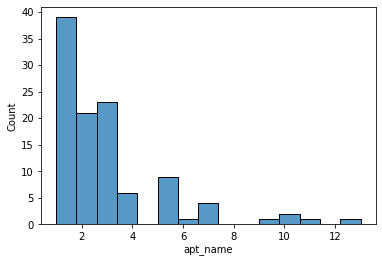

In [19]:
#view number of struggles per student
sns.histplot(data = struggling_count, x = "apt_name")

In [20]:
only_fail=df

only_fail=df
only_fail.replace('wrongclass', 0.0)
only_fail.replace('nocompile', 0.0)
only_fail['score'] = pd.to_numeric(only_fail['score'], errors='coerce')

only_fail = only_fail[only_fail['score'] < 1.000]




#only_fail = only_fail[only_fail['score'] == True] 
only_fail.head()

,anonid,timestamp,apt_name,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other
0,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:21:06+00:00,exactlytwovowels,0.26923,1,sp21,"for loops, string concepts, string methods, if...",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN
1,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:46:30+00:00,rebuildphrase,0.00000,1,sp21,"for loops, string methods, if statements",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN
2,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:47:14+00:00,rebuildphrase,0.00000,1,sp21,"for loops, string methods, if statements",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN
5,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:54:57+00:00,exactlytwovowels,0.42308,1,sp21,"for loops, string concepts, string methods, if...",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN
7,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 14:17:45+00:00,exactlytwovowels,0.34615,1,sp21,"for loops, string concepts, string methods, if...",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN


In [21]:
only_fail.dtypes

anonid                             object
timestamp             datetime64[ns, UTC]
apt_name                           object
score                             float64
apt_set                            object
semester                           object
concept                            object
type                               object
mapping                            object
assign_date    datetime64[ns, US/Eastern]
due_date       datetime64[ns, US/Eastern]
late_due       datetime64[ns, US/Eastern]
required                          float64
notes                              object
other                              object
dtype: object

In [22]:
redefine=df.groupby( [ "anonid", "apt_name", "apt_set"]).count()
redefine = redefine[redefine.columns[~redefine.columns.isin(['score', 'semester', 'concept', 'type', 'mapping', 'assign_date', 'due_date', 'late_due', 'required', 'notes', 'other'])]]
redefine = redefine.rename(columns={'timestamp': 'num_submissions'})
redefine['struggling']=redefine['num_submissions']>=3
redefine.head()

num_submissions  \
anonid                                   apt_name   apt_set                    
0147aaa50d5b7962185b66aecc1579bbe105b345 acronym    3                      1   
                                         badges     6                      3   
                                         bagels     3                      1   
                                         bogsquare  1                      1   
                                         bordacount 6                      4   

                                                             struggling  
anonid                                   apt_name   apt_set              
0147aaa50d5b7962185b66aecc1579bbe105b345 acronym    3             False  
                                         badges     6              True  
                                         bagels     3             False  
                                         bogsquare  1             False  
                                         bordacount 6              True

2.0
58
3.0205037337045946


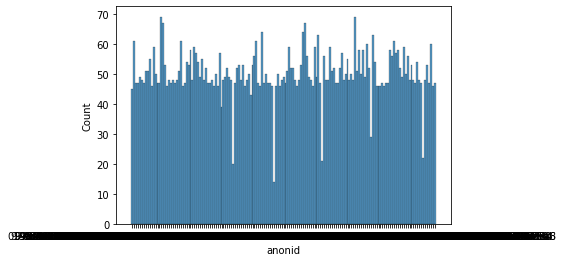

In [23]:
redefine=redefine.sort_values(by=['num_submissions'])
sns.histplot(data = redefine, x = "anonid")
median_submissions=redefine["num_submissions"].median()
max_submissions=redefine['num_submissions'].max()
mean_submissions=redefine['num_submissions'].mean()
print(median_submissions)
print(max_submissions)
print(mean_submissions)

In [24]:
struggles = redefine[redefine['struggling'] == True] 
print(len(struggles))
struggles.head()

2706


num_submissions  \
anonid                                   apt_name     apt_set                    
2658bdac9b801c7759af62d454d640b2217e4f1e grayscale    1                      3   
02cd4ca52896de5a337298df3d9368d254166e2e badges       6                      3   
02b16695694093c9a18aaa8f25eb01205cfdca1d acronym      3                      3   
                                         removemiddle 2                      3   
0263b6d98005bf9b3f0e17c016003e547e2432f8 eatdrink     8                      3   

                                                               struggling  
anonid                                   apt_name     apt_set              
2658bdac9b801c7759af62d454d640b2217e4f1e grayscale    1              True  
02cd4ca52896de5a337298df3d9368d254166e2e badges       6              True  
02b16695694093c9a18aaa8f25eb01205cfdca1d acronym      3              True  
                                         removemiddle 2              True  
0263b6d98005bf9b3f0e17c016003e547e2432f8 eatdrink     8              True

In [25]:
struggles.groupby(['apt_set']).count()

,num_submissions,struggling
apt_set,,
1,551,551
2,474,474
3,350,350
4,333,333
5,302,302
6,199,199
7,251,251
8,246,246


In [26]:
#number per anonid
struggles.groupby(['anonid']).count()

,num_submissions,struggling
anonid,,
0147aaa50d5b7962185b66aecc1579bbe105b345,12,12
01a31951bd4b2725120a54efb79b67ebcbd20334,11,11
0263b6d98005bf9b3f0e17c016003e547e2432f8,26,26
02b16695694093c9a18aaa8f25eb01205cfdca1d,20,20
02cd4ca52896de5a337298df3d9368d254166e2e,15,15
...,...,...
f9ceb5f633c9254bd38cb0021b7f24ac34e9bf3a,18,18
fcfcb3ce6adb49447d3ccaf7e8c2b2d62ff0722e,12,12
fe743360c549d81ccb853a63ba8c6eccd9a86442,19,19


In [27]:
by_apt_set=struggles.groupby( [ "anonid", "apt_set"]).count()
by_apt_set = by_apt_set[by_apt_set.columns[~by_apt_set.columns.isin(['struggling'])]]
by_apt_set = by_apt_set.rename(columns={'num_submissions': 'num_struggles'})
by_apt_set.head()

num_struggles
anonid                                   apt_set               
0147aaa50d5b7962185b66aecc1579bbe105b345 1                    1
                                         2                    2
                                         3                    2
                                         4                    1
                                         5                    2

In [28]:
num_students=struggles.groupby('anonid').count()
num_students = num_students[num_students.columns[~num_students.columns.isin(['struggling'])]]
num_students = num_students.rename(columns={'num_submissions': 'num_struggles'})
num_students = num_students.reset_index()
print(len(num_students))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(num_students)

157
                                       anonid  num_struggles
0    0147aaa50d5b7962185b66aecc1579bbe105b345             12
1    01a31951bd4b2725120a54efb79b67ebcbd20334             11
2    0263b6d98005bf9b3f0e17c016003e547e2432f8             26
3    02b16695694093c9a18aaa8f25eb01205cfdca1d             20
4    02cd4ca52896de5a337298df3d9368d254166e2e             15
5    05e47ff85e56171e487309a4a3569f59c73571a8             22
6    0a1fb2eb997b6e976a1dfa73391a7d6fcf06b5a7             17
7    0ad9cbb4a1d83b9f856b8e47952c4e23c07dc66f             11
8    0df67cd2fd06c35d8cd77fc8f6c1bfe3ea7ce45b             41
9    0e3677dbf95bd1112bc9a036a3ac5831fb4525fe             17
10   0f9c5b00572068ec30a0be6ec61f1e3a2b5404d5             22
11   10283d378c5618f3bbda1906eb2f8ccc2c2bf4b0             23
12   11063ba06aed47b0571d237a0f6a6ec10edf4149             13
13   1163bfb884d1a020a67da9ece4f4b820c47d6db5             19
14   133c699f136b934c9f320920c2defaa7d5047258             18
15   15334b9ece70e4b

In [29]:
#total_struggling=pd.merge(struggling_students, num_students, on="anonid")
struggling_count = struggling_count.reset_index()
struggling_count_anon=struggling_count.iloc[: , :1]
num_students_anon=num_students.iloc[: , :1]

#struggling_count_anon.head()
#num_students_anon.head()

total_struggling = pd.concat([struggling_count_anon, num_students_anon], ignore_index=True)

total_strugglers=total_struggling.drop_duplicates()


#total_struggling=pd.merge(struggling_count, num_students, on="anonid")


In [30]:
print(len(total_struggling))
print(len(total_strugglers))

265
157


# Office Hours Data

In [31]:
#import dataset
oh=pd.read_csv('cs101sp21-no-teacher-data-processed.csv')
print(len(oh))
oh.head()

810


,MDH Info,MDH Info.1,MDH Info.2,MDH Info.3,MDH Info.4,MDH Info.5,MDH Info.6,studentPrompts,studentPrompts.1,studentPrompts.2,...,studentFeedback.1,studentFeedback.2,studentFeedback.3,studentFeedback.4,studentFeedback.5,studentFeedback.6,studentFeedback.7,studentFeedback.8,studentFeedback.9,MDH Info.7
0,Ticket,Ticket,Ticket,Ticket,Ticket,Ticket,Ticket,What are you working on?,What are you working on?,What are you working on?,...,How did your interaction go?,How did your interaction go?,How did your interaction go?,How did your interaction go?,Please rate your experience in this interaction.,Please rate your experience in this interaction.,Please rate your experience in this interaction.,Please rate your experience in this interaction.,Please note any optional additional feedback y...,Stu/Teach ID
1,ticketId,isFollowup,parentId,requestedAt,startedAt,completedAt,studentLeftFeedback,Assignment 6: Recommender,APT8,OTHER,...,I'll be able to finish on my own,I will need more help,I did not make progress,Technical Difficulties/Not Applicable,4 - Great!,3 - Satisfactory,2 - Could use some improvement,1 - Much needed improvement,freeResponse,anonStudent
2,18619,False,NaN,2021-04-23T01:37:26.036Z,2021-04-23T01:38:23.045Z,2021-04-23T01:41:10.595Z,True,True,False,False,...,False,False,False,False,True,False,False,False,False,428ceea907476f26e0ca095ebe328054d3446ca3
3,18618,False,NaN,2021-04-23T01:20:51.288Z,2021-04-23T01:21:20.590Z,2021-04-23T01:27:32.144Z,False,True,False,False,...,False,False,False,False,False,False,False,False,False,e93005c93ea1a3f0ccc5204df1a9b4299dce83b1
4,18617,False,NaN,2021-04-23T01:15:06.092Z,2021-04-23T01:19:10.875Z,2021-04-23T02:50:10.289Z,False,True,False,False,...,False,False,False,False,False,False,False,False,False,85c264d06d88582254027332957a961fb9df9457


In [32]:
display(oh.iloc[1])

MDH Info                                                      ticketId
MDH Info.1                                                  isFollowup
MDH Info.2                                                    parentId
MDH Info.3                                                 requestedAt
MDH Info.4                                                   startedAt
MDH Info.5                                                 completedAt
MDH Info.6                                         studentLeftFeedback
studentPrompts                               Assignment 6: Recommender
studentPrompts.1                                                  APT8
studentPrompts.2                                                 OTHER
studentPrompts.3                                                  APT7
studentPrompts.4                          Assignment 5: Clever Hangman
studentPrompts.5                                 Assignment 4: Hangman
studentPrompts.6                                                  APT5
studen

In [33]:
office_hours=oh.rename(columns=oh.iloc[1]).drop([0, 1])

In [34]:
office_hours.head()

,ticketId,isFollowup,parentId,requestedAt,startedAt,completedAt,studentLeftFeedback,Assignment 6: Recommender,APT8,OTHER,...,I'll be able to finish on my own,I will need more help,I did not make progress,Technical Difficulties/Not Applicable,4 - Great!,3 - Satisfactory,2 - Could use some improvement,1 - Much needed improvement,freeResponse,anonStudent
2,18619,False,NaN,2021-04-23T01:37:26.036Z,2021-04-23T01:38:23.045Z,2021-04-23T01:41:10.595Z,True,True,False,False,...,False,False,False,False,True,False,False,False,False,428ceea907476f26e0ca095ebe328054d3446ca3
3,18618,False,NaN,2021-04-23T01:20:51.288Z,2021-04-23T01:21:20.590Z,2021-04-23T01:27:32.144Z,False,True,False,False,...,False,False,False,False,False,False,False,False,False,e93005c93ea1a3f0ccc5204df1a9b4299dce83b1
4,18617,False,NaN,2021-04-23T01:15:06.092Z,2021-04-23T01:19:10.875Z,2021-04-23T02:50:10.289Z,False,True,False,False,...,False,False,False,False,False,False,False,False,False,85c264d06d88582254027332957a961fb9df9457
5,18616,False,NaN,2021-04-23T01:14:52.275Z,2021-04-23T01:15:23.148Z,2021-04-23T01:20:31.916Z,True,True,False,False,...,True,False,False,False,True,False,False,False,False,428ceea907476f26e0ca095ebe328054d3446ca3
6,18613,False,NaN,2021-04-23T01:01:03.908Z,2021-04-23T01:06:43.629Z,2021-04-23T01:43:33.537Z,False,True,False,False,...,False,False,False,False,False,False,False,False,False,8e8d8c04bd2e4559245eb4c640591447996c5ec8


In [35]:
office_hours.dtypes

ticketId                                                                             object
isFollowup                                                                           object
parentId                                                                             object
requestedAt                                                                          object
startedAt                                                                            object
completedAt                                                                          object
studentLeftFeedback                                                                  object
Assignment 6: Recommender                                                            object
APT8                                                                                 object
OTHER                                                                                object
APT7                                                                            

In [36]:
office_hours['apt_question'] = pd.np.where(office_hours[['APT1', 'APT2', 'APT3', 'APT4', 'APT5', 'APT6', 'APT7', 'APT8', 'OTHER', 'Understanding a past assignment/APT']].eq('True').any(1, skipna=True), True, 
             pd.np.where(office_hours[['APT1', 'APT2', 'APT3', 'APT4', 'APT5', 'APT6', 'APT7', 'APT8', 'OTHER', 'Understanding a past assignment/APT']].eq('False').all(1), None, False))

office_hours.head()
                                           
                                           

,ticketId,isFollowup,parentId,requestedAt,startedAt,completedAt,studentLeftFeedback,Assignment 6: Recommender,APT8,OTHER,...,I will need more help,I did not make progress,Technical Difficulties/Not Applicable,4 - Great!,3 - Satisfactory,2 - Could use some improvement,1 - Much needed improvement,freeResponse,anonStudent,apt_question
2,18619,False,NaN,2021-04-23T01:37:26.036Z,2021-04-23T01:38:23.045Z,2021-04-23T01:41:10.595Z,True,True,False,False,...,False,False,False,True,False,False,False,False,428ceea907476f26e0ca095ebe328054d3446ca3,None
3,18618,False,NaN,2021-04-23T01:20:51.288Z,2021-04-23T01:21:20.590Z,2021-04-23T01:27:32.144Z,False,True,False,False,...,False,False,False,False,False,False,False,False,e93005c93ea1a3f0ccc5204df1a9b4299dce83b1,None
4,18617,False,NaN,2021-04-23T01:15:06.092Z,2021-04-23T01:19:10.875Z,2021-04-23T02:50:10.289Z,False,True,False,False,...,False,False,False,False,False,False,False,False,85c264d06d88582254027332957a961fb9df9457,None
5,18616,False,NaN,2021-04-23T01:14:52.275Z,2021-04-23T01:15:23.148Z,2021-04-23T01:20:31.916Z,True,True,False,False,...,False,False,False,True,False,False,False,False,428ceea907476f26e0ca095ebe328054d3446ca3,None
6,18613,False,NaN,2021-04-23T01:01:03.908Z,2021-04-23T01:06:43.629Z,2021-04-23T01:43:33.537Z,False,True,False,False,...,False,False,False,False,False,False,False,False,8e8d8c04bd2e4559245eb4c640591447996c5ec8,None


In [37]:
office_hour = office_hours[office_hours['apt_question'] == True] 
office_hour.head()

,ticketId,isFollowup,parentId,requestedAt,startedAt,completedAt,studentLeftFeedback,Assignment 6: Recommender,APT8,OTHER,...,I will need more help,I did not make progress,Technical Difficulties/Not Applicable,4 - Great!,3 - Satisfactory,2 - Could use some improvement,1 - Much needed improvement,freeResponse,anonStudent,apt_question
12,18477,True,18463.0,2021-04-22T01:24:11.650Z,2021-04-22T01:28:08.592Z,2021-04-22T01:52:01.637Z,True,False,True,False,...,False,False,False,True,False,False,False,False,8e8d8c04bd2e4559245eb4c640591447996c5ec8,True
13,18476,False,NaN,2021-04-22T01:22:01.672Z,2021-04-22T01:22:53.362Z,2021-04-22T02:09:12.765Z,True,False,True,False,...,False,False,False,True,False,False,False,False,90df9a92b6c0b0caaa1cf49a62c586abcf94d73d,True
18,18463,False,NaN,2021-04-22T00:16:45.859Z,2021-04-22T00:25:25.624Z,2021-04-22T00:52:52.507Z,True,False,True,False,...,True,False,False,True,False,False,False,False,8e8d8c04bd2e4559245eb4c640591447996c5ec8,True
28,18314,False,NaN,2021-04-21T01:54:13.430Z,2021-04-21T01:56:03.629Z,2021-04-21T02:01:05.659Z,True,True,False,False,...,False,False,False,True,False,False,False,False,fe743360c549d81ccb853a63ba8c6eccd9a86442,True
29,18313,True,18284.0,2021-04-21T01:51:08.280Z,2021-04-21T01:53:11.247Z,2021-04-21T02:05:18.385Z,True,False,True,False,...,False,False,False,True,False,False,False,False,3b83b8cb4a827c90118b383b0a589ae3cb98e1fd,True


In [38]:
apt_oh = office_hour[['anonStudent', 'requestedAt', 'startedAt','completedAt','APT1', 'APT2', 'APT3', 'APT4', 'APT5', 'APT6', 'APT7', 'APT8', 'OTHER', 'Understanding a past assignment/APT', 'I will need more help', 'I did not make progress']]
print(len(apt_oh))
apt_oh.head()

190


,anonStudent,requestedAt,startedAt,completedAt,APT1,APT2,APT3,APT4,APT5,APT6,APT7,APT8,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress
12,8e8d8c04bd2e4559245eb4c640591447996c5ec8,2021-04-22T01:24:11.650Z,2021-04-22T01:28:08.592Z,2021-04-22T01:52:01.637Z,False,False,False,False,False,False,False,True,False,False,False,False
13,90df9a92b6c0b0caaa1cf49a62c586abcf94d73d,2021-04-22T01:22:01.672Z,2021-04-22T01:22:53.362Z,2021-04-22T02:09:12.765Z,False,False,False,False,False,False,False,True,False,False,False,False
18,8e8d8c04bd2e4559245eb4c640591447996c5ec8,2021-04-22T00:16:45.859Z,2021-04-22T00:25:25.624Z,2021-04-22T00:52:52.507Z,False,False,False,False,False,False,False,True,False,False,True,False
28,fe743360c549d81ccb853a63ba8c6eccd9a86442,2021-04-21T01:54:13.430Z,2021-04-21T01:56:03.629Z,2021-04-21T02:01:05.659Z,False,False,False,False,False,False,False,False,False,True,False,False
29,3b83b8cb4a827c90118b383b0a589ae3cb98e1fd,2021-04-21T01:51:08.280Z,2021-04-21T01:53:11.247Z,2021-04-21T02:05:18.385Z,False,False,False,False,False,False,False,True,False,False,False,False


In [39]:
apt_oh.loc[apt_oh.anonStudent == '8e8d8c04bd2e4559245eb4c640591447996c5ec8', 'set'] = 'x'

for ind in apt_oh.index:
    if apt_oh['APT1'][ind]=="True":
        apt_oh['set'][ind]="1"
    if apt_oh['APT2'][ind]=="True":
        apt_oh['set'][ind]="2"
    if apt_oh['APT3'][ind]=="True":
        apt_oh['set'][ind]="3"
    if apt_oh['APT4'][ind]=="True":
        apt_oh['set'][ind]="4"
    if apt_oh['APT5'][ind]=="True":
        apt_oh['set'][ind]="5"
    if apt_oh['APT6'][ind]=="True":
        apt_oh['set'][ind]="6"
    if apt_oh['APT7'][ind]=="True":
        apt_oh['set'][ind]="7"
    if apt_oh['APT8'][ind]=="True":
        apt_oh['set'][ind]="8"
    else:
        apt_oh['set'][ind]="0"
  
apt_oh = apt_oh.rename(columns={'set': 'apt_set'})    
apt_oh.head()

/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,anonStudent,requestedAt,startedAt,completedAt,APT1,APT2,APT3,APT4,APT5,APT6,APT7,APT8,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set
12,8e8d8c04bd2e4559245eb4c640591447996c5ec8,2021-04-22T01:24:11.650Z,2021-04-22T01:28:08.592Z,2021-04-22T01:52:01.637Z,False,False,False,False,False,False,False,True,False,False,False,False,8
13,90df9a92b6c0b0caaa1cf49a62c586abcf94d73d,2021-04-22T01:22:01.672Z,2021-04-22T01:22:53.362Z,2021-04-22T02:09:12.765Z,False,False,False,False,False,False,False,True,False,False,False,False,8
18,8e8d8c04bd2e4559245eb4c640591447996c5ec8,2021-04-22T00:16:45.859Z,2021-04-22T00:25:25.624Z,2021-04-22T00:52:52.507Z,False,False,False,False,False,False,False,True,False,False,True,False,8
28,fe743360c549d81ccb853a63ba8c6eccd9a86442,2021-04-21T01:54:13.430Z,2021-04-21T01:56:03.629Z,2021-04-21T02:01:05.659Z,False,False,False,False,False,False,False,False,False,True,False,False,0
29,3b83b8cb4a827c90118b383b0a589ae3cb98e1fd,2021-04-21T01:51:08.280Z,2021-04-21T01:53:11.247Z,2021-04-21T02:05:18.385Z,False,False,False,False,False,False,False,True,False,False,False,False,8


In [40]:
num_oh_students = apt_oh.groupby(['anonStudent']).count()
num_oh_students = num_oh_students.sort_values(by='requestedAt', ascending=False)
mean_visits=num_oh_students["requestedAt"].median()
num_oh_students = num_oh_students['requestedAt']
print(len(num_oh_students))
print(mean_visits)
num_oh_students

52
2.0


anonStudent
bf2274b1f969080479d74d0897adfe6c76718bff    20
f99b3f222b0816673f8a3daa40150d3cb8b27135    17
fe743360c549d81ccb853a63ba8c6eccd9a86442    15
447da97c1b9af1ff36211dddf909e5af2a40e25b    10
428ceea907476f26e0ca095ebe328054d3446ca3     9
f08dc8c15603849c7b70dd06feb0f4195c3be26e     9
3cd19f437146b0715fc193db9853cd3a13ad48bd     8
dd4470f81fb2abfc40dc71fadd25183d706d8293     7
74e14600c490a09b77dcfb6d0a8a6db1654ef54e     6
dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f     5
3b83b8cb4a827c90118b383b0a589ae3cb98e1fd     5
690bdf928c346a22c1c5cc795959f3db677af758     5
91ced723fbe501c4c03cd4fcd3bde22f5aa1343a     4
10283d378c5618f3bbda1906eb2f8ccc2c2bf4b0     4
d7b586f3a4f92cb505db14ceac2ce58421689d9b     4
90df9a92b6c0b0caaa1cf49a62c586abcf94d73d     3
97e039e5b4bdbbfa911570778eeb7becb0bc1939     3
8e8d8c04bd2e4559245eb4c640591447996c5ec8     3
c5e1fb8855f39cd4bea4bbe2d3dd41132d60f8e4     3
cafe2c1633b740ef27ae9e8fed6c48f286f75955     3
85c264d06d88582254027332957a961fb9df9457     3
7

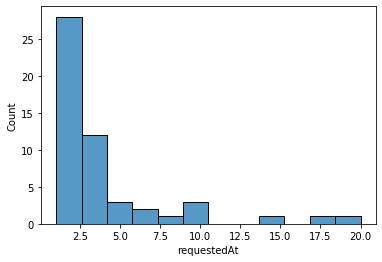

In [41]:
sns.histplot(data = num_oh_students)

In [42]:
apt1 = apt_oh.groupby(['APT1']).count()
apt2 = apt_oh.groupby(['APT2']).count()
apt3 = apt_oh.groupby(['APT3']).count()
apt4 = apt_oh.groupby(['APT4']).count()
apt5 = apt_oh.groupby(['APT5']).count()
apt6 = apt_oh.groupby(['APT6']).count()
apt7 = apt_oh.groupby(['APT7']).count()
apt8 = apt_oh.groupby(['APT8']).count()
other = apt_oh.groupby(['OTHER']).count()

print('APT 1 has '+ apt1.iloc[1][True].astype(str)+ ' students')
print('APT 2 has '+ apt2.iloc[1][True].astype(str)+ ' students')
print('APT 3 has '+ apt3.iloc[1][True].astype(str)+ ' students')
print('APT 4 has '+ apt4.iloc[1][True].astype(str)+ ' students')
print('APT 5 has '+ apt5.iloc[1][True].astype(str)+ ' students')
print('APT 6 has '+ apt6.iloc[1][True].astype(str)+ ' students')
print('APT 7 has '+ apt7.iloc[1][True].astype(str)+ ' students')
print('APT 8 has '+ apt8.iloc[1][True].astype(str)+ ' students')
print('OTHER has '+ other.iloc[1][True].astype(str)+ ' students')

APT 1 has 2 students
APT 2 has 21 students
APT 3 has 22 students
APT 4 has 49 students
APT 5 has 22 students
APT 6 has 9 students
APT 7 has 18 students
APT 8 has 33 students
OTHER has 1 students


In [43]:
oh_students = pd.DataFrame()
oh_students['oh_students']=apt_oh['anonStudent']
apt_students = pd.DataFrame()
apt_students['apt_students']=struggling_students['anonid']
apt_students.head()
print(len(apt_students))

306


# Combining OH and APT

In [44]:
nos=num_oh_students.to_frame(name = 'count').reset_index()
ns=num_students.rename(columns = {"anonid":"anonStudent"})
ns.head()

frames = [nos, ns]

result3 = pd.concat(frames).reset_index()
result3.head()
print(len(result3))
print('52 total OH Students, 157 struggling students, 209 combined')
print(len(result3['anonStudent'])-len(result3['anonStudent'].drop_duplicates()))
#result3.dtypes


209
52 total OH Students, 157 struggling students, 209 combined
52


/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [45]:
overlap=0
for student in ns['anonStudent']:
    for s in nos['anonStudent']:
        if student==s:
            overlap+=1
print(overlap)
print('of struggling students visited OH')
print(' ')
print('Every student who visited office hours for an APT was struggling. Of the struggling students, ~33% of them visited Office Hours.')
print(' ')
print('This shows that number of APT submissions is a good indicator of OH attendance for students')

52
of struggling students visited OH
 
Every student who visited office hours for an APT was struggling. Of the struggling students, ~33% of them visited Office Hours.
 
This shows that number of APT submissions is a good indicator of OH attendance for students


#### Next steps: keep only struggling students and APT OH students from larger datasets. Do this using for loops perhaps to make sure student = student who struggles and apt set=struggling apt set. Then, loop through both of these new datasets to see if there was an APT submission of ==1.000 during an OH session time (could consider extending by 30 mins or so) 

In [46]:
#for s in df['anonid']:
#    for student in num_students['anonid']:
   #     if s==student:
  #          df['struggling']=True
#print(len(df))
#df.head()


In [47]:
#df2 = df[df['struggling'] == True]
#print(len(df2))

In [48]:
#count=0
#for ind in df.index:
#    for i in apt_oh.index:
#        if df['anonid'][ind]==apt_oh['anonStudent'][i] and df['apt_set'][ind]==apt_oh['apt_set'][i]:
   #         count+=1
#
#print(count)
        

In [49]:
df = df.assign(result=df['anonid'].isin(num_students['anonid']).astype(bool))
df.head()

,anonid,timestamp,apt_name,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other,result
0,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:21:06+00:00,exactlytwovowels,0.26923,1,sp21,"for loops, string concepts, string methods, if...",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN,True
1,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:46:30+00:00,rebuildphrase,0.00000,1,sp21,"for loops, string methods, if statements",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN,True
2,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:47:14+00:00,rebuildphrase,0.00000,1,sp21,"for loops, string methods, if statements",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN,True
3,ca2a6ba60dbb5d3d7418675f618f607b9e5e3552,2021-03-05 13:47:33+00:00,rebuildphrase,1.00000,1,sp21,"for loops, string methods, if statements",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN,True
4,97e039e5b4bdbbfa911570778eeb7becb0bc1939,2021-03-05 13:54:56+00:00,exactlytwovowels,1.00000,1,sp21,"for loops, string concepts, string methods, if...",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,2021-03-08 23:59:59-05:00,2021-03-08 23:59:59-05:00,1.0,NaN,NaN,True


In [50]:
df.groupby(['result']).count()

,anonid,timestamp,apt_name,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other
result,,,,,,,,,,,,,,,
True,23865,23865,23865,21726,23865,23865,23865,23865,21479,22540,22540,22540,8087,7336,5107


In [51]:
anonids=df.groupby(['anonid']).count()
print(len(anonids))

157


In [52]:
apt_oh=apt_oh.rename(columns={'anonStudent': 'anonid'})
apt_oh.dtypes

anonid                                 object
requestedAt                            object
startedAt                              object
completedAt                            object
APT1                                   object
APT2                                   object
APT3                                   object
APT4                                   object
APT5                                   object
APT6                                   object
APT7                                   object
APT8                                   object
OTHER                                  object
Understanding a past assignment/APT    object
I will need more help                  object
I did not make progress                object
apt_set                                object
dtype: object

In [53]:
mergedf=pd.merge(df, apt_oh, on=['anonid'])
print(len(mergedf))
mergedf.head()

34846


,anonid,timestamp,apt_name,score,apt_set_x,semester,concept,type,mapping,assign_date,...,APT4,APT5,APT6,APT7,APT8,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set_y
0,97e039e5b4bdbbfa911570778eeb7becb0bc1939,2021-03-05 13:54:56+00:00,exactlytwovowels,1.0,1,sp21,"for loops, string concepts, string methods, if...",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,...,True,False,False,False,False,False,False,False,False,0
1,97e039e5b4bdbbfa911570778eeb7becb0bc1939,2021-03-05 13:54:56+00:00,exactlytwovowels,1.0,1,sp21,"for loops, string concepts, string methods, if...",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,...,True,False,False,False,False,False,False,False,False,0
2,97e039e5b4bdbbfa911570778eeb7becb0bc1939,2021-03-05 13:54:56+00:00,exactlytwovowels,1.0,1,sp21,"for loops, string concepts, string methods, if...",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,...,True,False,False,False,False,False,False,False,False,0
3,97e039e5b4bdbbfa911570778eeb7becb0bc1939,2021-03-05 14:07:22+00:00,rebuildphrase,1.0,1,sp21,"for loops, string methods, if statements",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,...,True,False,False,False,False,False,False,False,False,0
4,97e039e5b4bdbbfa911570778eeb7becb0bc1939,2021-03-05 14:07:22+00:00,rebuildphrase,1.0,1,sp21,"for loops, string methods, if statements",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,...,True,False,False,False,False,False,False,False,False,0


In [54]:
mergedf=mergedf.loc[mergedf['score'] == 1]
print(len(mergedf))
mergedf.head()

10273


,anonid,timestamp,apt_name,score,apt_set_x,semester,concept,type,mapping,assign_date,...,APT4,APT5,APT6,APT7,APT8,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set_y
0,97e039e5b4bdbbfa911570778eeb7becb0bc1939,2021-03-05 13:54:56+00:00,exactlytwovowels,1.0,1,sp21,"for loops, string concepts, string methods, if...",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,...,True,False,False,False,False,False,False,False,False,0
1,97e039e5b4bdbbfa911570778eeb7becb0bc1939,2021-03-05 13:54:56+00:00,exactlytwovowels,1.0,1,sp21,"for loops, string concepts, string methods, if...",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,...,True,False,False,False,False,False,False,False,False,0
2,97e039e5b4bdbbfa911570778eeb7becb0bc1939,2021-03-05 13:54:56+00:00,exactlytwovowels,1.0,1,sp21,"for loops, string concepts, string methods, if...",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,...,True,False,False,False,False,False,False,False,False,0
3,97e039e5b4bdbbfa911570778eeb7becb0bc1939,2021-03-05 14:07:22+00:00,rebuildphrase,1.0,1,sp21,"for loops, string methods, if statements",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,...,True,False,False,False,False,False,False,False,False,0
4,97e039e5b4bdbbfa911570778eeb7becb0bc1939,2021-03-05 14:07:22+00:00,rebuildphrase,1.0,1,sp21,"for loops, string methods, if statements",summative,"whichsubjects, specificwords, codebreaker, sen...",2021-03-05 00:00:00-05:00,...,True,False,False,False,False,False,False,False,False,0


In [55]:
mergedf['startedAt'] = pd.to_datetime(mergedf.startedAt).dt.tz_convert('utc')

In [56]:
mergedf['requestedAt'] = pd.to_datetime(mergedf.requestedAt).dt.tz_convert('utc')

In [57]:
mergedf['completedAt'] = pd.to_datetime(mergedf.completedAt).dt.tz_convert('utc')

In [58]:
mergedf.dtypes

anonid                                                     object
timestamp                                     datetime64[ns, UTC]
apt_name                                                   object
score                                                     float64
apt_set_x                                                  object
semester                                                   object
concept                                                    object
type                                                       object
mapping                                                    object
assign_date                            datetime64[ns, US/Eastern]
due_date                               datetime64[ns, US/Eastern]
late_due                               datetime64[ns, US/Eastern]
required                                                  float64
notes                                                      object
other                                                      object
result    

In [59]:
duringoh=mergedf[(mergedf['timestamp'] >= mergedf['startedAt'])& (mergedf['timestamp'] <= mergedf['completedAt'])]
print(len(duringoh))

72


In [60]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(duringoh)

                                         anonid                 timestamp  \
676    bbb94258f3c6b20fb4234418f07a9943988019e8 2021-04-08 23:58:52+00:00   
2358   bf2274b1f969080479d74d0897adfe6c76718bff 2021-02-22 01:11:05+00:00   
2696   bf2274b1f969080479d74d0897adfe6c76718bff 2021-02-25 02:51:49+00:00   
2994   bf2274b1f969080479d74d0897adfe6c76718bff 2021-03-01 00:36:47+00:00   
3631   bf2274b1f969080479d74d0897adfe6c76718bff 2021-03-08 03:03:46+00:00   
5025   bf2274b1f969080479d74d0897adfe6c76718bff 2021-04-08 00:36:40+00:00   
5343   bf2274b1f969080479d74d0897adfe6c76718bff 2021-04-16 00:40:54+00:00   
5620   bf2274b1f969080479d74d0897adfe6c76718bff 2021-04-19 01:12:08+00:00   
6265   78e2b912b754573b1df4635ff1ecd91f28cf79f8 2021-03-11 16:07:50+00:00   
6294   78e2b912b754573b1df4635ff1ecd91f28cf79f8 2021-03-23 00:32:47+00:00   
6407   78e2b912b754573b1df4635ff1ecd91f28cf79f8 2021-04-15 15:12:32+00:00   
7419   91ced723fbe501c4c03cd4fcd3bde22f5aa1343a 2021-03-12 00:57:52+00:00   

In [61]:
duringoh.groupby(['anonid']).count().sort_values(by='apt_name', ascending=False)

,timestamp,apt_name,score,apt_set_x,semester,concept,type,mapping,assign_date,due_date,...,APT4,APT5,APT6,APT7,APT8,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set_y
anonid,,,,,,,,,,,,,,,,,,,,,
f99b3f222b0816673f8a3daa40150d3cb8b27135,8,8,8,8,8,8,8,4,8,8,...,8,8,8,8,8,8,8,8,8,8
bf2274b1f969080479d74d0897adfe6c76718bff,7,7,7,7,7,7,7,6,7,7,...,7,7,7,7,7,7,7,7,7,7
447da97c1b9af1ff36211dddf909e5af2a40e25b,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
74e14600c490a09b77dcfb6d0a8a6db1654ef54e,5,5,5,5,5,5,5,4,5,5,...,5,5,5,5,5,5,5,5,5,5
690bdf928c346a22c1c5cc795959f3db677af758,4,4,4,4,4,4,4,3,4,4,...,4,4,4,4,4,4,4,4,4,4
1b9aa95158fff8d0ef91ac9dbdb0ad101073b5a7,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3cd19f437146b0715fc193db9853cd3a13ad48bd,3,3,3,3,3,3,3,1,3,3,...,3,3,3,3,3,3,3,3,3,3
78e2b912b754573b1df4635ff1ecd91f28cf79f8,3,3,3,3,3,3,3,1,3,3,...,3,3,3,3,3,3,3,3,3,3
dd4470f81fb2abfc40dc71fadd25183d706d8293,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [62]:
strugglemerge=pd.merge(struggles, df, on=['anonid', 'apt_name'])
strugglemerge.head()

,anonid,apt_name,num_submissions,struggling,timestamp,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other,result
0,2658bdac9b801c7759af62d454d640b2217e4f1e,grayscale,3,True,2021-02-02 22:26:49+00:00,NaN,1,sp21,math,formative,cubic,2021-01-28 00:00:00-05:00,2021-02-04 23:30:00-05:00,2021-02-05 23:30:00-05:00,1.0,NaN,NaN,True
1,2658bdac9b801c7759af62d454d640b2217e4f1e,grayscale,3,True,2021-02-02 22:27:03+00:00,NaN,1,sp21,math,formative,cubic,2021-01-28 00:00:00-05:00,2021-02-04 23:30:00-05:00,2021-02-05 23:30:00-05:00,1.0,NaN,NaN,True
2,2658bdac9b801c7759af62d454d640b2217e4f1e,grayscale,3,True,2021-02-02 22:27:56+00:00,1.0,1,sp21,math,formative,cubic,2021-01-28 00:00:00-05:00,2021-02-04 23:30:00-05:00,2021-02-05 23:30:00-05:00,1.0,NaN,NaN,True
3,02cd4ca52896de5a337298df3d9368d254166e2e,badges,3,True,2021-03-26 19:20:43+00:00,1.0,6,sp21,"sets, for loops, dictionary, list concepts, st...",formative,studenthonors,2021-03-23 00:00:00-04:00,2021-04-01 23:30:00-04:00,2021-04-02 23:30:00-04:00,NaN,sets,NaN,True
4,02cd4ca52896de5a337298df3d9368d254166e2e,badges,3,True,2021-03-26 19:33:11+00:00,NaN,6,sp21,"sets, for loops, dictionary, list concepts, st...",formative,studenthonors,2021-03-23 00:00:00-04:00,2021-04-01 23:30:00-04:00,2021-04-02 23:30:00-04:00,NaN,sets,NaN,True


In [63]:
struggleoh=pd.merge(strugglemerge, apt_oh, on=['anonid'])
struggleoh.head()

,anonid,apt_name,num_submissions,struggling,timestamp,score,apt_set_x,semester,concept,type,...,APT4,APT5,APT6,APT7,APT8,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set_y
0,02cd4ca52896de5a337298df3d9368d254166e2e,badges,3,True,2021-03-26 19:20:43+00:00,1.0,6,sp21,"sets, for loops, dictionary, list concepts, st...",formative,...,False,False,False,False,False,False,False,False,False,0
1,02cd4ca52896de5a337298df3d9368d254166e2e,badges,3,True,2021-03-26 19:33:11+00:00,NaN,6,sp21,"sets, for loops, dictionary, list concepts, st...",formative,...,False,False,False,False,False,False,False,False,False,0
2,02cd4ca52896de5a337298df3d9368d254166e2e,badges,3,True,2021-04-02 01:28:29+00:00,1.0,6,sp21,"sets, for loops, dictionary, list concepts, st...",formative,...,False,False,False,False,False,False,False,False,False,0
3,02cd4ca52896de5a337298df3d9368d254166e2e,bagels,3,True,2021-02-26 16:48:17+00:00,0.0,3,sp21,"for loops, if statements",formative,...,False,False,False,False,False,False,False,False,False,0
4,02cd4ca52896de5a337298df3d9368d254166e2e,bagels,3,True,2021-02-26 16:48:59+00:00,0.0,3,sp21,"for loops, if statements",formative,...,False,False,False,False,False,False,False,False,False,0


In [64]:
struggleoh['startedAt'] = pd.to_datetime(struggleoh.startedAt).dt.tz_convert('utc')
struggleoh['requestedAt'] = pd.to_datetime(struggleoh.requestedAt).dt.tz_convert('utc')
struggleoh['completedAt'] = pd.to_datetime(struggleoh.completedAt).dt.tz_convert('utc')

In [65]:
struggleduringoh=struggleoh[(struggleoh['timestamp'] >= struggleoh['startedAt'])& (struggleoh['timestamp'] <= struggleoh['completedAt'])]
print(len(struggleduringoh))


205


In [66]:
#median score of submissions in total
struggleoh['score'].median()

0.53846

In [67]:
#median score of submissions that occur during OH
struggleduringoh['score'].median()

0.76923

In [68]:
#mean score of submissions that occur during OH
struggleduringoh['score'].mean()

0.6687689729729729

In [69]:
#median number of submissions of someone who goes to office hours and submits an APT during the OH time frame
struggleduringoh['num_submissions'].median()

10.0

In [70]:
#median number of submissions for someone that goes to office hours
struggleoh['num_submissions'].median()

9.0

In [71]:
#only include submissions with a perfect score
strugglepass=struggleduringoh.loc[struggleduringoh['score'] == 1]
print(len(strugglepass))

57


In [72]:
#all rows for APT submissions of 1 that occurre during an OH session
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(strugglepass)

                                         anonid          apt_name  \
261    0263b6d98005bf9b3f0e17c016003e547e2432f8           pikachu   
772    f99b3f222b0816673f8a3daa40150d3cb8b27135        positiveid   
1462   f99b3f222b0816673f8a3daa40150d3cb8b27135           pikachu   
1670   f99b3f222b0816673f8a3daa40150d3cb8b27135         emphasize   
1825   f99b3f222b0816673f8a3daa40150d3cb8b27135      readingscore   
2054   f99b3f222b0816673f8a3daa40150d3cb8b27135            common   
2071   f99b3f222b0816673f8a3daa40150d3cb8b27135            common   
2394   c5e1fb8855f39cd4bea4bbe2d3dd41132d60f8e4        positiveid   
2548   c5e1fb8855f39cd4bea4bbe2d3dd41132d60f8e4          networth   
3002   fe743360c549d81ccb853a63ba8c6eccd9a86442     lastnamefirst   
4536   cafe2c1633b740ef27ae9e8fed6c48f286f75955            txtmsg   
5154   10283d378c5618f3bbda1906eb2f8ccc2c2bf4b0           yahtzee   
5773   dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f       portmanteau   
6163   dfb5941d7d4cb910408e0a236ff

In [73]:
#number of pass submissions during OH per student
strugglepass.groupby(['anonid']).count().sort_values(by='apt_name', ascending=False)


,apt_name,num_submissions,struggling,timestamp,score,apt_set_x,semester,concept,type,mapping,...,APT4,APT5,APT6,APT7,APT8,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set_y
anonid,,,,,,,,,,,,,,,,,,,,,
bf2274b1f969080479d74d0897adfe6c76718bff,7,7,7,7,7,7,7,7,7,6,...,7,7,7,7,7,7,7,7,7,7
f99b3f222b0816673f8a3daa40150d3cb8b27135,6,6,6,6,6,6,6,6,6,3,...,6,6,6,6,6,6,6,6,6,6
447da97c1b9af1ff36211dddf909e5af2a40e25b,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1b9aa95158fff8d0ef91ac9dbdb0ad101073b5a7,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3cd19f437146b0715fc193db9853cd3a13ad48bd,3,3,3,3,3,3,3,3,3,1,...,3,3,3,3,3,3,3,3,3,3
74e14600c490a09b77dcfb6d0a8a6db1654ef54e,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
78e2b912b754573b1df4635ff1ecd91f28cf79f8,3,3,3,3,3,3,3,3,3,1,...,3,3,3,3,3,3,3,3,3,3
dd4470f81fb2abfc40dc71fadd25183d706d8293,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
91ced723fbe501c4c03cd4fcd3bde22f5aa1343a,2,2,2,2,2,2,2,2,2,1,...,2,2,2,2,2,2,2,2,2,2


In [74]:
#number of submissions of individual APTs during OH (median=1)
strugglepass.groupby(['anonid', 'apt_name']).count()

num_submissions  \
anonid                                   apt_name                            
0263b6d98005bf9b3f0e17c016003e547e2432f8 pikachu                         1   
10283d378c5618f3bbda1906eb2f8ccc2c2bf4b0 yahtzee                         1   
1b9aa95158fff8d0ef91ac9dbdb0ad101073b5a7 emphasize                       1   
                                         lastnamefirst                   1   
                                         pancakes                        1   
3cd19f437146b0715fc193db9853cd3a13ad48bd pikachu                         1   
                                         positiveid                      2   
447da97c1b9af1ff36211dddf909e5af2a40e25b emphasize                       1   
                                         networth                        1   
                                         readingscore                    1   
                                         removemiddle                    1   
5e6199d27a9658c70da30b620d290415a5387c2b pangram                         1   
690bdf928c346a22c1c5cc795959f3db677af758 calculator                      1   
                                         pangram                         1   
74e14600c490a09b77dcfb6d0a8a6db1654ef54e badges                          1   
                                         emphasize                       1   
                                         lastnamefirst                   1   
78e2b912b754573b1df4635ff1ecd91f28cf79f8 common                          1   
                                         positiveid                      1   
                                         txtmsg                          1   
7a09255ebca8a3271a13ee8995c5b68abb343c51 bagels                          1   
85c264d06d88582254027332957a961fb9df9457 pangram                         1   
87362139b9ca33a696edc9d75e0c3e203da1279a sandwichbar                     1   
88b9095a6b5bc127716c3a7a12ba91dc34b888f4 removemiddle                    1   
8e8d8c04bd2e4559245eb4c640591447996c5ec8 pangram                         1   
91ced723fbe501c4c03cd4fcd3bde22f5aa1343a morselike                       1   
                                         positiveid                      1   
bbb94258f3c6b20fb4234418f07a9943988019e8 trophyshelf                     1   
bf2274b1f969080479d74d0897adfe6c76718bff acronym                         1   
                                         calculator                      1   
                                         interestingparty                1   
                                         lastnamefirst                   1   
                                         positiveid                      1   
                                         readingscore                    1   
                                         trophyshelf                     1   
c5e1fb8855f39cd4bea4bbe2d3dd41132d60f8e4 networth                        1   
                                         positiveid                      1   
cafe2c1633b740ef27ae9e8fed6c48f286f75955 txtmsg                          1   
d323bfecefd5c2190a6e76d51ae47e838d45133a common                          1   
                                         networth                        1   
d333ac48b45ca5fab58763d45af38c7a5c5c24d6 positiveid                      1   
d7b586f3a4f92cb505db14ceac2ce58421689d9b medaltable                      1   
dd4470f81fb2abfc40dc71fadd25183d706d8293 medaltable                      2   
                                         networth                        1   
dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f portmanteau                     1   
                                         readingscore                    1   
efc1359e3aa9f9a4a4abc26a7fca5261c9b00b15 pikachu                         1   
f08dc8c15603849c7b70dd06feb0f4195c3be26e networth                        1   
f99b3f222b0816673f8a3daa40150d3cb8b27135 common                          2   
                                         emphasize                       1   
   

In [75]:
#number successful APT submissions during OH per APT
strugglepass.groupby(['apt_name']).count().sort_values(by='anonid', ascending=False)

,anonid,num_submissions,struggling,timestamp,score,apt_set_x,semester,concept,type,mapping,...,APT4,APT5,APT6,APT7,APT8,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set_y
apt_name,,,,,,,,,,,,,,,,,,,,,
positiveid,8,8,8,8,8,8,8,8,8,0,...,8,8,8,8,8,8,8,8,8,8
networth,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
common,4,4,4,4,4,4,4,4,4,0,...,4,4,4,4,4,4,4,4,4,4
emphasize,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
lastnamefirst,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
pangram,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
pikachu,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
readingscore,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
medaltable,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [76]:
#number successful APT submissions during OH per set
strugglepass.groupby(['apt_set_x']).count().sort_values(by='anonid', ascending=False)

,anonid,apt_name,num_submissions,struggling,timestamp,score,semester,concept,type,mapping,...,APT4,APT5,APT6,APT7,APT8,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set_y
apt_set_x,,,,,,,,,,,,,,,,,,,,,
8,13,13,13,13,13,13,13,13,13,5,...,13,13,13,13,13,13,13,13,13,13
3,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
4,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
5,10,10,10,10,10,10,10,10,10,5,...,10,10,10,10,10,10,10,10,10,10
2,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
7,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [77]:
#total struggles per APT
struggles.groupby(['apt_name']).count().sort_values(by='struggling', ascending=False)

,num_submissions,struggling
apt_name,,
gravity,127,127
emphasize,114,114
lastnamefirst,96,96
txtmsg,93,93
firstmorewords,83,83
...,...,...
friendscore,7,7
datalinkingcount,5,5
blanket,5,5


In [78]:
#total apt set struggles
struggles.groupby(['apt_set']).count().sort_values(by='struggling', ascending=False)

,num_submissions,struggling
apt_set,,
1,551,551
2,474,474
3,350,350
4,333,333
5,302,302
7,251,251
8,246,246
6,199,199


###### Also, count number of submissions during an OH time that were not of score 1 and were never of score 1. Find max score for each (apt, student) combo during an OH timeslot and filter for those <1.

In [79]:
nopass=struggleduringoh.groupby( [ "anonid", "apt_name", "apt_set_x", "completedAt"])['score'].max().to_frame(name = 'max_score').reset_index()
nopass.head()
print(len(nopass))

70


In [80]:
nopass['not_pass'] = nopass['max_score']<1.00000

In [81]:
nopass=nopass.loc[nopass['not_pass'] == True]
print(len(nopass))

15


In [82]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(nopass)

                                      anonid       apt_name  apt_set_x  \
7   428ceea907476f26e0ca095ebe328054d3446ca3         badges          6   
8   428ceea907476f26e0ca095ebe328054d3446ca3         txtmsg          4   
16  74474c6d9fdc4290810a647a9711514ca51122dc         txtmsg          4   
28  8e8d8c04bd2e4559245eb4c640591447996c5ec8     positiveid          8   
29  8e8d8c04bd2e4559245eb4c640591447996c5ec8     positiveid          8   
30  90df9a92b6c0b0caaa1cf49a62c586abcf94d73d        pangram          8   
34  bbb94258f3c6b20fb4234418f07a9943988019e8    voterigging          7   
52  dd4470f81fb2abfc40dc71fadd25183d706d8293        pangram          8   
53  dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f    portmanteau          2   
55  dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f   readingscore          2   
57  e93005c93ea1a3f0ccc5204df1a9b4299dce83b1        pikachu          4   
60  f99b3f222b0816673f8a3daa40150d3cb8b27135         common          5   
63  f99b3f222b0816673f8a3daa40150d3cb8

In [83]:
ohfail=pd.merge(nopass, df, on=['anonid', 'apt_name'])
ohfail.head()
print(len(ohfail))

191


In [84]:
ohfail=ohfail[(ohfail['timestamp'] >= ohfail['completedAt'])]
print(len(ohfail))

80


In [85]:
ohfail['difference']=ohfail['timestamp']-ohfail['completedAt']
ohfail.head()

,anonid,apt_name,apt_set_x,completedAt,max_score,not_pass,timestamp,score,apt_set,semester,...,type,mapping,assign_date,due_date,late_due,required,notes,other,result,difference
2,428ceea907476f26e0ca095ebe328054d3446ca3,badges,6,2021-03-29 23:22:00.741000+00:00,0.72727,True,2021-03-29 23:23:44+00:00,1.00000,6,sp21,...,formative,studenthonors,2021-03-23 00:00:00-04:00,2021-04-01 23:30:00-04:00,2021-04-02 23:30:00-04:00,NaN,sets,NaN,True,00:01:43.259000
9,428ceea907476f26e0ca095ebe328054d3446ca3,txtmsg,4,2021-03-08 03:04:09.890000+00:00,0.98020,True,2021-03-08 03:05:06+00:00,1.00000,4,sp21,...,formative,firstmorewords,2021-03-02 00:00:00-05:00,2021-03-11 23:30:00-05:00,2021-03-12 23:30:00-05:00,1.0,"challenge, helper function useful",done in lecture 3/11,True,00:00:56.110000
18,74474c6d9fdc4290810a647a9711514ca51122dc,txtmsg,4,2021-03-08 02:36:08.479000+00:00,0.81188,True,2021-03-08 02:36:22+00:00,1.00000,4,sp21,...,formative,firstmorewords,2021-03-02 00:00:00-05:00,2021-03-11 23:30:00-05:00,2021-03-12 23:30:00-05:00,1.0,"challenge, helper function useful",done in lecture 3/11,True,00:00:13.521000
25,8e8d8c04bd2e4559245eb4c640591447996c5ec8,positiveid,8,2021-04-22 00:52:52.507000+00:00,0.46753,True,2021-04-22 01:11:59+00:00,0.09091,8,sp21,...,formative,NaN,2021-04-13 00:00:00-04:00,2021-04-20 23:30:00-04:00,2021-04-21 23:30:00-04:00,NaN,"suggested, think sets/interesection",NaN,True,00:19:06.493000
26,8e8d8c04bd2e4559245eb4c640591447996c5ec8,positiveid,8,2021-04-22 00:52:52.507000+00:00,0.46753,True,2021-04-22 01:14:48+00:00,0.00000,8,sp21,...,formative,NaN,2021-04-13 00:00:00-04:00,2021-04-20 23:30:00-04:00,2021-04-21 23:30:00-04:00,NaN,"suggested, think sets/interesection",NaN,True,00:21:55.493000


In [86]:
ohfail['difference']=ohfail['difference'].astype('timedelta64[m]').astype(int)

ohfail.head()

,anonid,apt_name,apt_set_x,completedAt,max_score,not_pass,timestamp,score,apt_set,semester,...,type,mapping,assign_date,due_date,late_due,required,notes,other,result,difference
2,428ceea907476f26e0ca095ebe328054d3446ca3,badges,6,2021-03-29 23:22:00.741000+00:00,0.72727,True,2021-03-29 23:23:44+00:00,1.00000,6,sp21,...,formative,studenthonors,2021-03-23 00:00:00-04:00,2021-04-01 23:30:00-04:00,2021-04-02 23:30:00-04:00,NaN,sets,NaN,True,1
9,428ceea907476f26e0ca095ebe328054d3446ca3,txtmsg,4,2021-03-08 03:04:09.890000+00:00,0.98020,True,2021-03-08 03:05:06+00:00,1.00000,4,sp21,...,formative,firstmorewords,2021-03-02 00:00:00-05:00,2021-03-11 23:30:00-05:00,2021-03-12 23:30:00-05:00,1.0,"challenge, helper function useful",done in lecture 3/11,True,0
18,74474c6d9fdc4290810a647a9711514ca51122dc,txtmsg,4,2021-03-08 02:36:08.479000+00:00,0.81188,True,2021-03-08 02:36:22+00:00,1.00000,4,sp21,...,formative,firstmorewords,2021-03-02 00:00:00-05:00,2021-03-11 23:30:00-05:00,2021-03-12 23:30:00-05:00,1.0,"challenge, helper function useful",done in lecture 3/11,True,0
25,8e8d8c04bd2e4559245eb4c640591447996c5ec8,positiveid,8,2021-04-22 00:52:52.507000+00:00,0.46753,True,2021-04-22 01:11:59+00:00,0.09091,8,sp21,...,formative,NaN,2021-04-13 00:00:00-04:00,2021-04-20 23:30:00-04:00,2021-04-21 23:30:00-04:00,NaN,"suggested, think sets/interesection",NaN,True,19
26,8e8d8c04bd2e4559245eb4c640591447996c5ec8,positiveid,8,2021-04-22 00:52:52.507000+00:00,0.46753,True,2021-04-22 01:14:48+00:00,0.00000,8,sp21,...,formative,NaN,2021-04-13 00:00:00-04:00,2021-04-20 23:30:00-04:00,2021-04-21 23:30:00-04:00,NaN,"suggested, think sets/interesection",NaN,True,21


In [87]:
conditions = [
    (ohfail['difference'] == 0),
    (ohfail['difference'] > 0) & (ohfail['difference'] <= 30),
    (ohfail['difference'] > 30) & (ohfail['difference'] <= 60),
    (ohfail['difference'] > 60) & (ohfail['difference'] <= 90),
    (ohfail['difference'] > 90) & (ohfail['difference'] <= 120),
    (ohfail['difference'] > 120) & (ohfail['difference'] <= 150),
    (ohfail['difference'] > 150) & (ohfail['difference'] <= 180),
    (ohfail['difference'] > 180) & (ohfail['difference'] <= 1440),
    (ohfail['difference'] > 1440)
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1-30', '31-60', '61-90', '91-120', '121-150', '151-180', '180-1 day', '>1 day']

# create a new column and use np.select to assign values to it using our lists as arguments
ohfail['time_since_oh'] = np.select(conditions, values)

# display updated DataFrame
ohfail.head()

,anonid,apt_name,apt_set_x,completedAt,max_score,not_pass,timestamp,score,apt_set,semester,...,mapping,assign_date,due_date,late_due,required,notes,other,result,difference,time_since_oh
2,428ceea907476f26e0ca095ebe328054d3446ca3,badges,6,2021-03-29 23:22:00.741000+00:00,0.72727,True,2021-03-29 23:23:44+00:00,1.00000,6,sp21,...,studenthonors,2021-03-23 00:00:00-04:00,2021-04-01 23:30:00-04:00,2021-04-02 23:30:00-04:00,NaN,sets,NaN,True,1,1-30
9,428ceea907476f26e0ca095ebe328054d3446ca3,txtmsg,4,2021-03-08 03:04:09.890000+00:00,0.98020,True,2021-03-08 03:05:06+00:00,1.00000,4,sp21,...,firstmorewords,2021-03-02 00:00:00-05:00,2021-03-11 23:30:00-05:00,2021-03-12 23:30:00-05:00,1.0,"challenge, helper function useful",done in lecture 3/11,True,0,0
18,74474c6d9fdc4290810a647a9711514ca51122dc,txtmsg,4,2021-03-08 02:36:08.479000+00:00,0.81188,True,2021-03-08 02:36:22+00:00,1.00000,4,sp21,...,firstmorewords,2021-03-02 00:00:00-05:00,2021-03-11 23:30:00-05:00,2021-03-12 23:30:00-05:00,1.0,"challenge, helper function useful",done in lecture 3/11,True,0,0
25,8e8d8c04bd2e4559245eb4c640591447996c5ec8,positiveid,8,2021-04-22 00:52:52.507000+00:00,0.46753,True,2021-04-22 01:11:59+00:00,0.09091,8,sp21,...,NaN,2021-04-13 00:00:00-04:00,2021-04-20 23:30:00-04:00,2021-04-21 23:30:00-04:00,NaN,"suggested, think sets/interesection",NaN,True,19,1-30
26,8e8d8c04bd2e4559245eb4c640591447996c5ec8,positiveid,8,2021-04-22 00:52:52.507000+00:00,0.46753,True,2021-04-22 01:14:48+00:00,0.00000,8,sp21,...,NaN,2021-04-13 00:00:00-04:00,2021-04-20 23:30:00-04:00,2021-04-21 23:30:00-04:00,NaN,"suggested, think sets/interesection",NaN,True,21,1-30


In [88]:
ohfail.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()


,anonid,apt_name,maximum_score
0,428ceea907476f26e0ca095ebe328054d3446ca3,badges,1.00000
1,428ceea907476f26e0ca095ebe328054d3446ca3,txtmsg,1.00000
2,74474c6d9fdc4290810a647a9711514ca51122dc,txtmsg,1.00000
3,8e8d8c04bd2e4559245eb4c640591447996c5ec8,positiveid,1.00000
4,90df9a92b6c0b0caaa1cf49a62c586abcf94d73d,pangram,0.60000
5,dd4470f81fb2abfc40dc71fadd25183d706d8293,pangram,1.00000
6,dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f,portmanteau,1.00000
7,dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f,readingscore,1.00000
8,e93005c93ea1a3f0ccc5204df1a9b4299dce83b1,pikachu,1.00000
9,f99b3f222b0816673f8a3daa40150d3cb8b27135,common,1.00000


In [89]:
clean_ohfail=ohfail[(ohfail['time_since_oh'] != '0')]


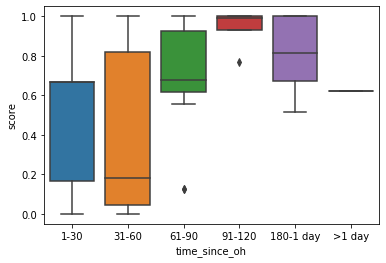

In [310]:
sns.boxplot(data=clean_ohfail, x="time_since_oh", y="score")

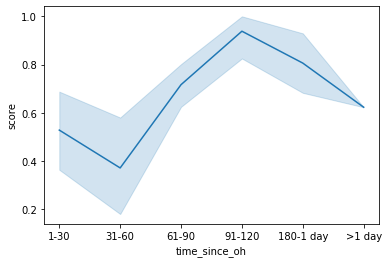

In [91]:
sns.lineplot(data=clean_ohfail, x="time_since_oh", y="score")

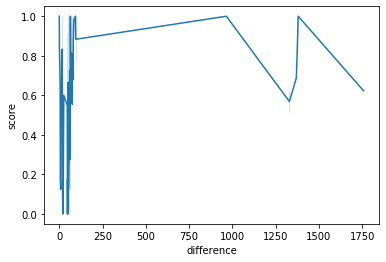

In [92]:
sns.lineplot(data=ohfail, x="difference", y="score")

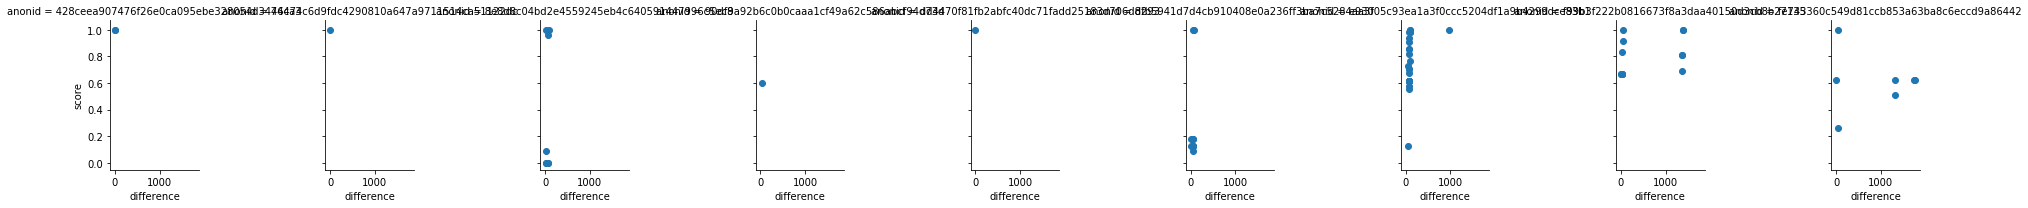

In [93]:
graph = sns.FacetGrid(ohfail, col ="anonid")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "difference", "score")
# show the object
plt.show()

In [94]:
adapted1_ohfail=ohfail[(ohfail['time_since_oh'] != '180-1 day') & (ohfail['time_since_oh'] != '>1 day')]
adapted2_ohfail=ohfail[(ohfail['time_since_oh'] != '180-1 day')]
adapted3_ohfail=ohfail[(ohfail['time_since_oh'] != '180-1 day') & (ohfail['time_since_oh'] != '>1 day') & (ohfail['time_since_oh'] != '151-180') & (ohfail['time_since_oh'] != '121-150') & (ohfail['time_since_oh'] != '91-120')]
adapted4_ohfail=ohfail[(ohfail['time_since_oh'] != '180-1 day') & (ohfail['time_since_oh'] != '>1 day') & (ohfail['time_since_oh'] != '151-180') & (ohfail['time_since_oh'] != '121-150') & (ohfail['time_since_oh'] != '91-120') & (ohfail['time_since_oh'] != '61-90')]
adapted5_ohfail=ohfail[(ohfail['time_since_oh'] != '180-1 day') & (ohfail['time_since_oh'] != '>1 day') & (ohfail['time_since_oh'] != '151-180') & (ohfail['time_since_oh'] != '121-150') & (ohfail['time_since_oh'] != '91-120') & (ohfail['time_since_oh'] != '61-90') & (ohfail['time_since_oh'] != '31-60')]
adapted6_ohfail=ohfail[(ohfail['time_since_oh'] != '180-1 day') & (ohfail['time_since_oh'] != '>1 day') & (ohfail['time_since_oh'] != '151-180') & (ohfail['time_since_oh'] != '121-150') & (ohfail['time_since_oh'] != '91-120') & (ohfail['time_since_oh'] != '61-90') & (ohfail['time_since_oh'] != '31-60') & (ohfail['time_since_oh'] != '1-30')]



In [95]:
adapted1_ohfail.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 180 mins after OH

,anonid,apt_name,maximum_score
0,428ceea907476f26e0ca095ebe328054d3446ca3,badges,1.00000
1,428ceea907476f26e0ca095ebe328054d3446ca3,txtmsg,1.00000
2,74474c6d9fdc4290810a647a9711514ca51122dc,txtmsg,1.00000
3,8e8d8c04bd2e4559245eb4c640591447996c5ec8,positiveid,1.00000
4,90df9a92b6c0b0caaa1cf49a62c586abcf94d73d,pangram,0.60000
5,dd4470f81fb2abfc40dc71fadd25183d706d8293,pangram,1.00000
6,dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f,portmanteau,1.00000
7,dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f,readingscore,1.00000
8,e93005c93ea1a3f0ccc5204df1a9b4299dce83b1,pikachu,1.00000
9,f99b3f222b0816673f8a3daa40150d3cb8b27135,lastnamefirst,1.00000


In [96]:
adapted2_ohfail.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 1 day after OH

,anonid,apt_name,maximum_score
0,428ceea907476f26e0ca095ebe328054d3446ca3,badges,1.00000
1,428ceea907476f26e0ca095ebe328054d3446ca3,txtmsg,1.00000
2,74474c6d9fdc4290810a647a9711514ca51122dc,txtmsg,1.00000
3,8e8d8c04bd2e4559245eb4c640591447996c5ec8,positiveid,1.00000
4,90df9a92b6c0b0caaa1cf49a62c586abcf94d73d,pangram,0.60000
5,dd4470f81fb2abfc40dc71fadd25183d706d8293,pangram,1.00000
6,dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f,portmanteau,1.00000
7,dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f,readingscore,1.00000
8,e93005c93ea1a3f0ccc5204df1a9b4299dce83b1,pikachu,1.00000
9,f99b3f222b0816673f8a3daa40150d3cb8b27135,lastnamefirst,1.00000


In [97]:
adapted3_ohfail.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 90 minutes from OH

,anonid,apt_name,maximum_score
0,428ceea907476f26e0ca095ebe328054d3446ca3,badges,1.00000
1,428ceea907476f26e0ca095ebe328054d3446ca3,txtmsg,1.00000
2,74474c6d9fdc4290810a647a9711514ca51122dc,txtmsg,1.00000
3,8e8d8c04bd2e4559245eb4c640591447996c5ec8,positiveid,1.00000
4,90df9a92b6c0b0caaa1cf49a62c586abcf94d73d,pangram,0.60000
5,dd4470f81fb2abfc40dc71fadd25183d706d8293,pangram,1.00000
6,dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f,portmanteau,1.00000
7,dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f,readingscore,1.00000
8,e93005c93ea1a3f0ccc5204df1a9b4299dce83b1,pikachu,0.98630
9,f99b3f222b0816673f8a3daa40150d3cb8b27135,lastnamefirst,1.00000


In [98]:
adapted4_ohfail.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 60 minutes from OH

,anonid,apt_name,maximum_score
0,428ceea907476f26e0ca095ebe328054d3446ca3,badges,1.00000
1,428ceea907476f26e0ca095ebe328054d3446ca3,txtmsg,1.00000
2,74474c6d9fdc4290810a647a9711514ca51122dc,txtmsg,1.00000
3,8e8d8c04bd2e4559245eb4c640591447996c5ec8,positiveid,1.00000
4,90df9a92b6c0b0caaa1cf49a62c586abcf94d73d,pangram,0.60000
5,dd4470f81fb2abfc40dc71fadd25183d706d8293,pangram,1.00000
6,dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f,portmanteau,0.18182
7,dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f,readingscore,0.12500
8,e93005c93ea1a3f0ccc5204df1a9b4299dce83b1,pikachu,0.72603
9,f99b3f222b0816673f8a3daa40150d3cb8b27135,lastnamefirst,1.00000


In [99]:
adapted5_ohfail.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 30 minutes from OH

,anonid,apt_name,maximum_score
0,428ceea907476f26e0ca095ebe328054d3446ca3,badges,1.00000
1,428ceea907476f26e0ca095ebe328054d3446ca3,txtmsg,1.00000
2,74474c6d9fdc4290810a647a9711514ca51122dc,txtmsg,1.00000
3,8e8d8c04bd2e4559245eb4c640591447996c5ec8,positiveid,1.00000
4,90df9a92b6c0b0caaa1cf49a62c586abcf94d73d,pangram,0.60000
5,dd4470f81fb2abfc40dc71fadd25183d706d8293,pangram,1.00000
6,dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f,portmanteau,0.18182
7,dfb5941d7d4cb910408e0a236ff3ba7c5284aa3f,readingscore,0.12500
8,f99b3f222b0816673f8a3daa40150d3cb8b27135,lastnamefirst,0.83333
9,fe743360c549d81ccb853a63ba8c6eccd9a86442,pikachu,0.62329


# FALL 2020

In [100]:
#APT Additional Info import
apt_info_fa20 = pd.read_excel("CS APT Problem.xlsx")
print(len(apt_info))


apt_info_fa20 = apt_info_fa20[apt_info_fa20.index < apt_info_fa20[apt_info_fa20["apt_set"] == "CS201"].index[0]] # omit all info on CS201
apt_info_fa20 = apt_info_fa20[apt_info_fa20["semester"]== "fa20"] # only get Fall 2020 semester

#cleaning time zones
apt_info_fa20["assign_date"] = [d.replace(tzinfo=timezone('US/Eastern')) for d in apt_info_fa20["assign_date"]]
apt_info_fa20["due_date"] = [d.replace(tzinfo=timezone('US/Eastern')) for d in apt_info_fa20["due_date"]]
apt_info_fa20["late_due"] = [d.replace(tzinfo=timezone('US/Eastern')) for d in apt_info_fa20["late_due"]]
apt_info_fa20["late_due"] = apt_info_fa20["late_due"].fillna(apt_info_fa20["due_date"])


print(len(apt_info_fa20))

#apt_info.head()

72
69


In [101]:
#student formative APT log import
formative_fa20 = pd.read_csv("cs101fa20-apt-anon.csv").rename(columns = {"apt":"apt_name"})
print(len(formative_fa20))
formative_fa20.head()

25346


,anonid,timestamp,apt_name,score
0,de0eed21ba38ff6da2a79d7697f1f55f514a2fb0,1598379705,laundry,nocompile
1,25f41c15e310cbe97e156bc2cc6da55ff09cc286,1598379739,laundry,1.00000
2,de0eed21ba38ff6da2a79d7697f1f55f514a2fb0,1598379747,laundry,nocompile
3,b256dc5313f06be227572a59b2b82863554a2f54,1598379791,NaN,wrongclass
4,8347ca69433fe02fc47a81342fe212614654fbb3,1598379794,laundry,1.00000


In [102]:
#student summative APT log import
summative_fa20 = pd.read_csv("cs101fa20-aptquiz-anon.csv").rename(columns = {"apt":"apt_name"})
print(len(summative_fa20))
summative_fa20.head()

5562


,anonid,timestamp,apt_name,score
0,0a7d9ec15bc173d324248983059d4d863ed0e8c7,1601035539,bookrating,nocompile
1,0a7d9ec15bc173d324248983059d4d863ed0e8c7,1601035558,bookrating,1.00000
2,0a7d9ec15bc173d324248983059d4d863ed0e8c7,1601035859,specificwords,0.48000
3,0a7d9ec15bc173d324248983059d4d863ed0e8c7,1601035896,specificwords,0.48000
4,0a7d9ec15bc173d324248983059d4d863ed0e8c7,1601035940,specificwords,1.00000


In [103]:
#read in apt extra info data and clean
apt = {}
apt_quiz = {}

formative_fa20["timestamp"] = pd.to_datetime(formative_fa20.timestamp,unit='s').dt.tz_localize('utc')

formative_fa20 = formative_fa20[formative_fa20["apt_name"].notnull()].copy(deep = True).reset_index(drop = True)


summative_fa20["timestamp"] = pd.to_datetime(summative_fa20.timestamp,unit='s').dt.tz_localize('utc')

summative_fa20 = summative_fa20[summative_fa20["apt_name"].notnull()].copy(deep = True).reset_index(drop = True)
formative_fa20.head()

,anonid,timestamp,apt_name,score
0,de0eed21ba38ff6da2a79d7697f1f55f514a2fb0,2020-08-25 18:21:45+00:00,laundry,nocompile
1,25f41c15e310cbe97e156bc2cc6da55ff09cc286,2020-08-25 18:22:19+00:00,laundry,1.00000
2,de0eed21ba38ff6da2a79d7697f1f55f514a2fb0,2020-08-25 18:22:27+00:00,laundry,nocompile
3,8347ca69433fe02fc47a81342fe212614654fbb3,2020-08-25 18:23:14+00:00,laundry,1.00000
4,c8ec296ffc2041c34751302303d8268a592eeee7,2020-08-25 18:23:36+00:00,laundry,nocompile


In [104]:
# separate the submissions that were submitted during an apt set's assigned time range vs. extra practice 
extra = {} 
extra_quiz = {} 
for sem in ["fa20"]: 
    if sem not in extra: 
        extra[sem] = pd.DataFrame(columns = formative_fa20.columns)
    if sem not in extra_quiz:  
        extra_quiz[sem] = pd.DataFrame(columns = summative_fa20.columns)
    
    extra[sem] = formative_fa20[~formative_fa20["apt_name"].isin(set(apt_info_fa20[(apt_info_fa20["semester"]== sem) &
                                             (apt_info_fa20["type"].isin(["formative",
                                              "summative_practice"]))]["apt_name"]))].copy(deep = True).reset_index(drop = True)
    
    formative_fa20 = formative_fa20[formative_fa20["apt_name"].isin(set(apt_info_fa20[(apt_info_fa20["semester"]== sem) &
                                             (apt_info_fa20["type"].isin(["formative",
                                              "summative_practice"]))]["apt_name"]))].copy(deep = True).reset_index(drop = True)

    extra_quiz[sem] = summative_fa20[~summative_fa20["apt_name"].isin(set(apt_info_fa20[(apt_info_fa20["semester"]== sem) &
                                             (apt_info_fa20["type"] == "summative")]["apt_name"]))].copy(deep = True).reset_index(drop = True)
    summative_fa20 = summative_fa20[summative_fa20["apt_name"].isin(set(apt_info_fa20[(apt_info_fa20["semester"]== sem) &
                                             (apt_info_fa20["type"] == "summative")]["apt_name"]))].copy(deep = True).reset_index(drop = True)
    

In [105]:
#combine sumamtive and formative dataframes
f=[summative_fa20, formative_fa20]
fa20=pd.concat(f)
print(len(fa20))
fa20.head()

25950


,anonid,timestamp,apt_name,score
0,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:05:39+00:00,bookrating,nocompile
1,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:05:58+00:00,bookrating,1.00000
2,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:10:59+00:00,specificwords,0.48000
3,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:11:36+00:00,specificwords,0.48000
4,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:12:20+00:00,specificwords,1.00000


In [106]:
#df = pd.merge(apt_info, sp21, how = "left", on = "apt_name")
df_fa20 = fa20.merge(apt_info_fa20[(apt_info_fa20["semester"]== 'fa20') &
                                             (apt_info_fa20["type"].isin(["formative",
                                              "summative_practice", "summative"]))].copy(deep = True).reset_index(drop = True),
                                              how = "left", on = "apt_name")
print(len(df_fa20))
df_fa20.head()

25950


,anonid,timestamp,apt_name,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other
0,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:05:39+00:00,bookrating,nocompile,1,fa20,math,summative,"gravity, bogsquare, cone, grayscale, laundry, ...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN
1,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:05:58+00:00,bookrating,1.00000,1,fa20,math,summative,"gravity, bogsquare, cone, grayscale, laundry, ...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN
2,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:10:59+00:00,specificwords,0.48000,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN
3,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:11:36+00:00,specificwords,0.48000,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN
4,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:12:20+00:00,specificwords,1.00000,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN


In [107]:
grouped_fa20=df_fa20.groupby(['anonid', 'apt_name', 'apt_set'])['score'].max()
grouped_fa20.head()
display(grouped_fa20)

anonid                                    apt_name       apt_set
02c4aeea9d4df4bf789a005e0f189e909f390a07  acronym        3             1.00000
                                          anagramfree    6          wrongclass
                                          badges         6             1.00000
                                          bagels         3             1.00000
                                          bogsquare      1             1.00000
                                                                       ...    
fdb55253e0fe6fc04366357b69995a49d0627340  trophyshelf    7             0.30612
                                          txtmsg         4             1.00000
                                          voterigging    7             1.00000
                                          whichsubjects  1             1.00000
                                          yahtzee        4             1.00000
Name: score, Length: 7218, dtype: object

In [108]:
#find max score per submission per student
new_df_fa20=df_fa20.groupby( [ "anonid", "apt_name", "apt_set"])['score'].max().to_frame(name = 'max_score').reset_index()
new_df_fa20.head()

,anonid,apt_name,apt_set,max_score
0,02c4aeea9d4df4bf789a005e0f189e909f390a07,acronym,3,1.00000
1,02c4aeea9d4df4bf789a005e0f189e909f390a07,anagramfree,6,wrongclass
2,02c4aeea9d4df4bf789a005e0f189e909f390a07,badges,6,1.00000
3,02c4aeea9d4df4bf789a005e0f189e909f390a07,bagels,3,1.00000
4,02c4aeea9d4df4bf789a005e0f189e909f390a07,bogsquare,1,1.00000


In [109]:
#clean column entry
new_df_fa20.replace('wrongclass', 0.0)
new_df_fa20.replace('nocompile', 0.0)
new_df_fa20['max_score'] = pd.to_numeric(new_df_fa20['max_score'], errors='coerce')

In [110]:
#check column types
new_df_fa20.dtypes

anonid        object
apt_name      object
apt_set        int64
max_score    float64
dtype: object

In [111]:
#add struggling column, where max apt score is less than 100%
new_df_fa20['struggling'] = new_df_fa20['max_score']<1.00000
print(len(new_df_fa20))
new_df_fa20.head()

7218


,anonid,apt_name,apt_set,max_score,struggling
0,02c4aeea9d4df4bf789a005e0f189e909f390a07,acronym,3,1.0,False
1,02c4aeea9d4df4bf789a005e0f189e909f390a07,anagramfree,6,NaN,False
2,02c4aeea9d4df4bf789a005e0f189e909f390a07,badges,6,1.0,False
3,02c4aeea9d4df4bf789a005e0f189e909f390a07,bagels,3,1.0,False
4,02c4aeea9d4df4bf789a005e0f189e909f390a07,bogsquare,1,1.0,False


In [112]:
#sort for only struggling students
struggling_students_fa20 = new_df_fa20[new_df_fa20['struggling'] == True] 
print(len(struggling_students_fa20))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(struggling_students_fa20)

258
                                        anonid          apt_name  apt_set  \
29    02c4aeea9d4df4bf789a005e0f189e909f390a07           pikachu        4   
69    0684bcb95dbfda587909c05fc1cea8e2cad4b429          notfirst        2   
82    0684bcb95dbfda587909c05fc1cea8e2cad4b429       sortbyfreqs        6   
156   079beb2be2ab0c7423891728ea9ed2b8994ee335     lastnamefirst        3   
161   079beb2be2ab0c7423891728ea9ed2b8994ee335          notfirst        2   
189   07ea200f551279156d1925d5b34bdbd3b4e7a060       cerealsnack        1   
191   07ea200f551279156d1925d5b34bdbd3b4e7a060       codebreaker        1   
278   0a62f5dec71553d55681fa4f56e359e8f0910e17            badges        6   
294   0a62f5dec71553d55681fa4f56e359e8f0910e17         emphasize        3   
309   0a62f5dec71553d55681fa4f56e359e8f0910e17     popularending        2   
314   0a62f5dec71553d55681fa4f56e359e8f0910e17       sandwichbar        5   
345   0a7d9ec15bc173d324248983059d4d863ed0e8c7  datalinkingcount        

In [113]:
#count number of struggling students
new_df_fa20.groupby(['struggling']).count()

,anonid,apt_name,apt_set,max_score
struggling,,,,
False,6960,6960,6960,6108
True,258,258,258,258


In [114]:
struggling_students_fa20.groupby(['apt_set']).count()

,anonid,apt_name,max_score,struggling
apt_set,,,,
1,21,21,21,21
2,33,33,33,33
3,14,14,14,14
4,29,29,29,29
5,37,37,37,37
6,24,24,24,24
7,33,33,33,33
8,67,67,67,67


In [115]:
#number of struggles per student
struggling_count_fa20=struggling_students_fa20.groupby(['anonid']).count()
struggling_count_fa20.sort_values(by='apt_name', ascending=False)
print(len(struggling_count_fa20))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(struggling_count_fa20)


104
                                          apt_name  apt_set  max_score  \
anonid                                                                   
02c4aeea9d4df4bf789a005e0f189e909f390a07         1        1          1   
0684bcb95dbfda587909c05fc1cea8e2cad4b429         2        2          2   
079beb2be2ab0c7423891728ea9ed2b8994ee335         2        2          2   
07ea200f551279156d1925d5b34bdbd3b4e7a060         2        2          2   
0a62f5dec71553d55681fa4f56e359e8f0910e17         4        4          4   
0a7d9ec15bc173d324248983059d4d863ed0e8c7         3        3          3   
0c8c90844fe32762b854dfdbcb1e20267394e74d         2        2          2   
0d8bd6c3d4394b8c9d302058b609ab881c566ef5         3        3          3   
0f3fd1bb735ea0f7c028f6b65fb19498ac9eb294         3        3          3   
1171c30ea999b0d2caf0013907d1a3afa42bed44         1        1          1   
1367ad5789dbc9047cc2dc3df923f701940a3a2f         1        1          1   
166c6086efea9c6c5becf2c83ffa8e2a7a

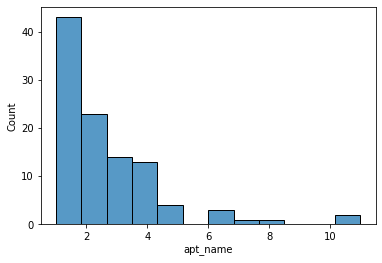

In [116]:
#view number of struggles per student
sns.histplot(data = struggling_count_fa20, x = "apt_name")

In [117]:
only_fail_fa20=df_fa20

only_fail_fa20=df_fa20
only_fail_fa20.replace('wrongclass', 0.0)
only_fail_fa20.replace('nocompile', 0.0)
only_fail_fa20['score'] = pd.to_numeric(only_fail_fa20['score'], errors='coerce')

only_fail_fa20 = only_fail_fa20[only_fail_fa20['score'] < 1.000]




#only_fail = only_fail[only_fail['score'] == True] 
only_fail_fa20.head()

,anonid,timestamp,apt_name,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other
2,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:10:59+00:00,specificwords,0.48,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN
3,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:11:36+00:00,specificwords,0.48,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN
5,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:24:49+00:00,codebreaker,0.00,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN
11,4113ca34fe6662a574696c6763b0d7de5dcb6a0b,2020-09-25 12:49:28+00:00,specificwords,0.48,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN
12,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:49:34+00:00,codebreaker,0.60,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN


In [118]:
only_fail_fa20.dtypes

anonid                             object
timestamp             datetime64[ns, UTC]
apt_name                           object
score                             float64
apt_set                            object
semester                           object
concept                            object
type                               object
mapping                            object
assign_date    datetime64[ns, US/Eastern]
due_date       datetime64[ns, US/Eastern]
late_due       datetime64[ns, US/Eastern]
required                          float64
notes                              object
other                              object
dtype: object

In [119]:
redefine_fa20=df_fa20.groupby( [ "anonid", "apt_name", "apt_set"]).count()
redefine_fa20 = redefine_fa20[redefine_fa20.columns[~redefine_fa20.columns.isin(['score', 'semester', 'concept', 'type', 'mapping', 'assign_date', 'due_date', 'late_due', 'required', 'notes', 'other'])]]
redefine_fa20 = redefine_fa20.rename(columns={'timestamp': 'num_submissions'})
redefine_fa20['struggling']=redefine_fa20['num_submissions']>=3
redefine_fa20.head()

num_submissions  \
anonid                                   apt_name    apt_set                    
02c4aeea9d4df4bf789a005e0f189e909f390a07 acronym     3                      5   
                                         anagramfree 6                      8   
                                         badges      6                      5   
                                         bagels      3                      6   
                                         bogsquare   1                      1   

                                                              struggling  
anonid                                   apt_name    apt_set              
02c4aeea9d4df4bf789a005e0f189e909f390a07 acronym     3              True  
                                         anagramfree 6              True  
                                         badges      6              True  
                                         bagels      3              True  
                                         bogsquare   1             False

2.0
63
3.595178719866999


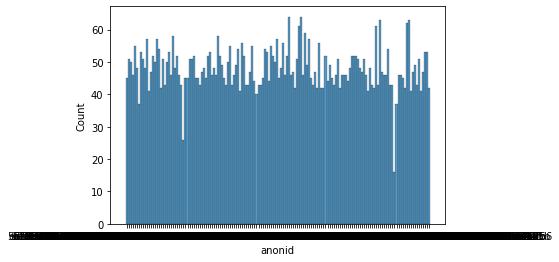

In [120]:
redefine_fa20=redefine_fa20.sort_values(by=['num_submissions'])
sns.histplot(data = redefine_fa20, x = "anonid")
median_submissions_fa20=redefine_fa20["num_submissions"].median()
max_submissions_fa20=redefine_fa20['num_submissions'].max()
mean_submissions_fa20=redefine_fa20['num_submissions'].mean()
print(median_submissions_fa20)
print(max_submissions_fa20)
print(mean_submissions_fa20)

In [121]:
struggles_fa20 = redefine_fa20[redefine_fa20['struggling'] == True] 
print(len(struggles_fa20))
struggles_fa20.head()

2989


,,,num_submissions,struggling
anonid,apt_name,apt_set,,
4d5fcba2ae6e63e4055530d2d49b5f19393cebae,special,4,3,True
4df7be8f229f99400fdfad1e4c5cce0b2a8113e7,medaltable,7,3,True
d9a8f09b93c2489d3f9143a58b48d0ceec9553b0,positiveid,8,3,True
f9185370ee3da187bb84e46a53b54f9813143552,bookrating,1,3,True
42d2a4a596d8ad09c5174bafbf3df4715d45e241,pancakes,3,3,True


In [122]:
#number total struggles per set
struggles_fa20.groupby(['apt_set']).count()

,num_submissions,struggling
apt_set,,
1,540,540
2,428,428
3,400,400
4,398,398
5,381,381
6,252,252
7,284,284
8,306,306


In [123]:
#number unique struggling students
struggles_fa20.groupby(['anonid']).count()

,num_submissions,struggling
anonid,,
02c4aeea9d4df4bf789a005e0f189e909f390a07,30,30
0684bcb95dbfda587909c05fc1cea8e2cad4b429,10,10
070fe7c25c4f7292e0bc8da465e39b29d9505376,17,17
079beb2be2ab0c7423891728ea9ed2b8994ee335,24,24
07ea200f551279156d1925d5b34bdbd3b4e7a060,20,20
...,...,...
fabd612a76f76b6e4503cfc8d29d9e48f8736aa0,21,21
fbca16c857123f753f05ff19cb2b4d4176043953,27,27
fbdfd06bcbacc76736e1e9ccfe8d75000ad994ee,13,13


In [124]:
by_apt_set_fa20=struggles_fa20.groupby( [ "anonid", "apt_set"]).count()
by_apt_set_fa20 = by_apt_set_fa20[by_apt_set_fa20.columns[~by_apt_set_fa20.columns.isin(['struggling'])]]
by_apt_set_fa20 = by_apt_set_fa20.rename(columns={'num_submissions': 'num_struggles'})
by_apt_set_fa20.head()

num_struggles
anonid                                   apt_set               
02c4aeea9d4df4bf789a005e0f189e909f390a07 1                    3
                                         2                    4
                                         3                    5
                                         4                    3
                                         5                    3

In [125]:
num_students_fa20=struggles_fa20.groupby('anonid').count()
num_students_fa20 = num_students_fa20[num_students_fa20.columns[~num_students_fa20.columns.isin(['struggling'])]]
num_students_fa20 = num_students_fa20.rename(columns={'num_submissions': 'num_struggles'})
num_students_fa20 = num_students_fa20.reset_index()
print(len(num_students_fa20))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(num_students_fa20)

150
                                       anonid  num_struggles
0    02c4aeea9d4df4bf789a005e0f189e909f390a07             30
1    0684bcb95dbfda587909c05fc1cea8e2cad4b429             10
2    070fe7c25c4f7292e0bc8da465e39b29d9505376             17
3    079beb2be2ab0c7423891728ea9ed2b8994ee335             24
4    07ea200f551279156d1925d5b34bdbd3b4e7a060             20
5    09ae6b9dd5fce81d893f6be88c25aba4ed5d1877             24
6    0a62f5dec71553d55681fa4f56e359e8f0910e17             24
7    0a7d9ec15bc173d324248983059d4d863ed0e8c7             25
8    0c8c90844fe32762b854dfdbcb1e20267394e74d             13
9    0d8bd6c3d4394b8c9d302058b609ab881c566ef5             23
10   0f3fd1bb735ea0f7c028f6b65fb19498ac9eb294             22
11   1171c30ea999b0d2caf0013907d1a3afa42bed44              9
12   12c27d31cafe84d2e80a4fa3d450eb85c28e219b             21
13   1367ad5789dbc9047cc2dc3df923f701940a3a2f             14
14   165eb2765f1320e1e6c4b85f63e41190f68284f9             19
15   166c6086efea9c6

In [126]:
#total_struggling=pd.merge(struggling_students, num_students, on="anonid")
struggling_count_fa20 = struggling_count_fa20.reset_index()
struggling_count_anon_fa20=struggling_count_fa20.iloc[: , :1]
num_students_anon_fa20=num_students_fa20.iloc[: , :1]

#struggling_count_anon.head()
#num_students_anon.head()

total_struggling_fa20 = pd.concat([struggling_count_anon_fa20, num_students_anon_fa20], ignore_index=True)

total_strugglers_fa20=total_struggling_fa20.drop_duplicates()


#total_struggling=pd.merge(struggling_count, num_students, on="anonid")


In [127]:
print(len(total_struggling_fa20))
print(len(total_strugglers_fa20))

254
150


## Fa20 Office Hours

In [128]:
#import dataset
oh_fa20=pd.read_csv('cs101fa20-no-teacher-data-processed.csv')
print(len(oh_fa20))
oh_fa20.head()

551


,MDH Info,MDH Info.1,MDH Info.2,MDH Info.3,MDH Info.4,MDH Info.5,MDH Info.6,studentPrompts,studentPrompts.1,studentPrompts.2,...,studentFeedback.1,studentFeedback.2,studentFeedback.3,studentFeedback.4,studentFeedback.5,studentFeedback.6,studentFeedback.7,studentFeedback.8,studentFeedback.9,MDH Info.7
0,Ticket,Ticket,Ticket,Ticket,Ticket,Ticket,Ticket,What are you working on? *,What are you working on? *,What are you working on? *,...,How did your interaction go? *,How did your interaction go? *,How did your interaction go? *,Please rate your experience with the interacti...,Please rate your experience with the interacti...,Please rate your experience with the interacti...,Please rate your experience with the interacti...,Please rate your experience with the interacti...,Optional: Any additional feedback you would li...,Stu/Teach ID
1,ticketId,isFollowup,parentId,requestedAt,startedAt,completedAt,studentLeftFeedback,Assignment 6: Recommender,APT8,APT 6,...,I finished!,I will need more help,I did not make progress,3 - Satisfactory,4 - Great!,2 - Could use some improvement,1 - Much needed improvement,OTHER,freeResponse,anonStudent
2,9319,False,NaN,2020-11-13T02:57:58.336Z,2020-11-13T02:59:22.262Z,2020-11-13T03:09:12.243Z,True,True,False,False,...,False,False,False,True,False,False,False,False,False,63e6d7916ec4f246f455807ad1b2109fe978fde4
3,9317,False,NaN,2020-11-13T02:07:36.535Z,2020-11-13T02:12:45.853Z,2020-11-13T03:00:37.846Z,False,True,False,False,...,False,False,False,False,False,False,False,False,False,07ea200f551279156d1925d5b34bdbd3b4e7a060
4,9310,True,9291.0,2020-11-13T01:11:24.008Z,2020-11-13T02:00:02.867Z,2020-11-13T02:37:12.263Z,True,True,False,False,...,True,False,False,False,True,False,False,False,False,de0eed21ba38ff6da2a79d7697f1f55f514a2fb0


In [129]:
display(oh_fa20.iloc[1])

MDH Info                                                      ticketId
MDH Info.1                                                  isFollowup
MDH Info.2                                                    parentId
MDH Info.3                                                 requestedAt
MDH Info.4                                                   startedAt
MDH Info.5                                                 completedAt
MDH Info.6                                         studentLeftFeedback
studentPrompts                               Assignment 6: Recommender
studentPrompts.1                                                  APT8
studentPrompts.2                                                 APT 6
studentPrompts.3                                                  APT7
studentPrompts.4                          Assignment 5: Clever Hangman
studentPrompts.5                                                 APT 5
studentPrompts.6                                                 OTHER
studen

In [130]:
office_hours_fa20=oh_fa20.rename(columns=oh_fa20.iloc[1]).drop([0, 1])

In [131]:
office_hours_fa20.head()

,ticketId,isFollowup,parentId,requestedAt,startedAt,completedAt,studentLeftFeedback,Assignment 6: Recommender,APT8,APT 6,...,I finished!,I will need more help,I did not make progress,3 - Satisfactory,4 - Great!,2 - Could use some improvement,1 - Much needed improvement,OTHER,freeResponse,anonStudent
2,9319,False,NaN,2020-11-13T02:57:58.336Z,2020-11-13T02:59:22.262Z,2020-11-13T03:09:12.243Z,True,True,False,False,...,False,False,False,True,False,False,False,False,False,63e6d7916ec4f246f455807ad1b2109fe978fde4
3,9317,False,NaN,2020-11-13T02:07:36.535Z,2020-11-13T02:12:45.853Z,2020-11-13T03:00:37.846Z,False,True,False,False,...,False,False,False,False,False,False,False,False,False,07ea200f551279156d1925d5b34bdbd3b4e7a060
4,9310,True,9291.0,2020-11-13T01:11:24.008Z,2020-11-13T02:00:02.867Z,2020-11-13T02:37:12.263Z,True,True,False,False,...,True,False,False,False,True,False,False,False,False,de0eed21ba38ff6da2a79d7697f1f55f514a2fb0
5,9309,False,NaN,2020-11-13T01:09:05.697Z,2020-11-13T01:41:45.581Z,2020-11-13T02:06:43.189Z,True,True,False,False,...,True,False,False,False,True,False,False,False,AMAZING,07ea200f551279156d1925d5b34bdbd3b4e7a060
6,9298,False,NaN,2020-11-13T00:20:26.741Z,2020-11-13T00:40:16.991Z,2020-11-13T00:48:55.353Z,True,True,False,False,...,False,True,False,False,False,True,False,False,Came across as short and unwilling to help me ...,07ea200f551279156d1925d5b34bdbd3b4e7a060


In [132]:
office_hours_fa20.dtypes

ticketId                                                                             object
isFollowup                                                                           object
parentId                                                                             object
requestedAt                                                                          object
startedAt                                                                            object
completedAt                                                                          object
studentLeftFeedback                                                                  object
Assignment 6: Recommender                                                            object
APT8                                                                                 object
APT 6                                                                                object
APT7                                                                            

In [133]:
office_hours_fa20['apt_question'] = pd.np.where(office_hours_fa20[['APT 1', 'APT 2', 'APT 3', 'APT 4', 'APT 5', 'APT 6', 'APT7', 'APT8', 'OTHER', 'Understanding a past assignment/APT']].eq('True').any(1, skipna=True), True, 
             pd.np.where(office_hours_fa20[['APT 1', 'APT 2', 'APT 3', 'APT 4', 'APT 5', 'APT 6', 'APT7', 'APT8', 'OTHER', 'Understanding a past assignment/APT']].eq('False').all(1), None, False))

office_hours_fa20.head()
                                           
                                           

,ticketId,isFollowup,parentId,requestedAt,startedAt,completedAt,studentLeftFeedback,Assignment 6: Recommender,APT8,APT 6,...,I will need more help,I did not make progress,3 - Satisfactory,4 - Great!,2 - Could use some improvement,1 - Much needed improvement,OTHER,freeResponse,anonStudent,apt_question
2,9319,False,NaN,2020-11-13T02:57:58.336Z,2020-11-13T02:59:22.262Z,2020-11-13T03:09:12.243Z,True,True,False,False,...,False,False,True,False,False,False,False,False,63e6d7916ec4f246f455807ad1b2109fe978fde4,None
3,9317,False,NaN,2020-11-13T02:07:36.535Z,2020-11-13T02:12:45.853Z,2020-11-13T03:00:37.846Z,False,True,False,False,...,False,False,False,False,False,False,False,False,07ea200f551279156d1925d5b34bdbd3b4e7a060,None
4,9310,True,9291.0,2020-11-13T01:11:24.008Z,2020-11-13T02:00:02.867Z,2020-11-13T02:37:12.263Z,True,True,False,False,...,False,False,False,True,False,False,False,False,de0eed21ba38ff6da2a79d7697f1f55f514a2fb0,None
5,9309,False,NaN,2020-11-13T01:09:05.697Z,2020-11-13T01:41:45.581Z,2020-11-13T02:06:43.189Z,True,True,False,False,...,False,False,False,True,False,False,False,AMAZING,07ea200f551279156d1925d5b34bdbd3b4e7a060,None
6,9298,False,NaN,2020-11-13T00:20:26.741Z,2020-11-13T00:40:16.991Z,2020-11-13T00:48:55.353Z,True,True,False,False,...,True,False,False,False,True,False,False,Came across as short and unwilling to help me ...,07ea200f551279156d1925d5b34bdbd3b4e7a060,None


In [134]:
office_hour_fa20 = office_hours_fa20[office_hours_fa20['apt_question'] == True] 
office_hour_fa20.head()

,ticketId,isFollowup,parentId,requestedAt,startedAt,completedAt,studentLeftFeedback,Assignment 6: Recommender,APT8,APT 6,...,I will need more help,I did not make progress,3 - Satisfactory,4 - Great!,2 - Could use some improvement,1 - Much needed improvement,OTHER,freeResponse,anonStudent,apt_question
18,9136,False,NaN,2020-11-12T00:18:12.637Z,2020-11-12T00:35:59.601Z,2020-11-12T00:41:53.992Z,True,False,True,False,...,False,False,False,True,False,False,False,False,a2bfbec72dadbbeb09898f70adc6f50ec8c49060,True
19,9130,False,NaN,2020-11-11T23:56:09.612Z,2020-11-12T00:01:19.603Z,2020-11-12T01:36:15.648Z,True,False,True,False,...,False,False,False,True,False,False,False,False,de0eed21ba38ff6da2a79d7697f1f55f514a2fb0,True
23,8992,False,NaN,2020-11-11T01:00:23.157Z,2020-11-11T01:07:26.909Z,2020-11-11T01:19:16.975Z,False,False,False,True,...,False,False,False,False,False,False,False,False,78f24ece7a80187b201b9ce4f328ace1b34e52b9,True
24,8901,False,NaN,2020-11-10T16:08:46.391Z,2020-11-10T16:10:48.965Z,2020-11-10T16:41:01.282Z,True,False,True,False,...,False,False,False,True,False,False,False,Really really helpful. Helps me understand the...,d7fc976f7571154d0c82b3e63df360b25cfb386a,True
26,8868,False,NaN,2020-11-10T02:40:53.627Z,2020-11-10T02:48:46.197Z,2020-11-10T03:03:29.705Z,True,False,True,False,...,False,False,False,True,False,False,False,False,d7fc976f7571154d0c82b3e63df360b25cfb386a,True


In [135]:
apt_oh_fa20 = office_hour_fa20[['anonStudent', 'requestedAt', 'startedAt','completedAt','APT 1', 'APT 2', 'APT 3', 'APT 4', 'APT 5', 'APT 6', 'APT7', 'APT8', 'OTHER', 'Understanding a past assignment/APT', 'I will need more help', 'I did not make progress']]
print(len(apt_oh_fa20))
apt_oh_fa20.head()

136


,anonStudent,requestedAt,startedAt,completedAt,APT 1,APT 2,APT 3,APT 4,APT 5,APT 6,APT7,APT8,OTHER,OTHER,OTHER,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress
18,a2bfbec72dadbbeb09898f70adc6f50ec8c49060,2020-11-12T00:18:12.637Z,2020-11-12T00:35:59.601Z,2020-11-12T00:41:53.992Z,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
19,de0eed21ba38ff6da2a79d7697f1f55f514a2fb0,2020-11-11T23:56:09.612Z,2020-11-12T00:01:19.603Z,2020-11-12T01:36:15.648Z,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
23,78f24ece7a80187b201b9ce4f328ace1b34e52b9,2020-11-11T01:00:23.157Z,2020-11-11T01:07:26.909Z,2020-11-11T01:19:16.975Z,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
24,d7fc976f7571154d0c82b3e63df360b25cfb386a,2020-11-10T16:08:46.391Z,2020-11-10T16:10:48.965Z,2020-11-10T16:41:01.282Z,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
26,d7fc976f7571154d0c82b3e63df360b25cfb386a,2020-11-10T02:40:53.627Z,2020-11-10T02:48:46.197Z,2020-11-10T03:03:29.705Z,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [136]:
apt_oh_fa20.loc[apt_oh_fa20.anonStudent == 'a2bfbec72dadbbeb09898f70adc6f50ec8c49060', 'set'] = 'x'

for ind in apt_oh_fa20.index:
    if apt_oh_fa20['APT 1'][ind]=="True":
        apt_oh_fa20['set'][ind]="1"
    if apt_oh_fa20['APT 2'][ind]=="True":
        apt_oh_fa20['set'][ind]="2"
    if apt_oh_fa20['APT 3'][ind]=="True":
        apt_oh_fa20['set'][ind]="3"
    if apt_oh_fa20['APT 4'][ind]=="True":
        apt_oh_fa20['set'][ind]="4"
    if apt_oh_fa20['APT 5'][ind]=="True":
        apt_oh_fa20['set'][ind]="5"
    if apt_oh_fa20['APT 6'][ind]=="True":
        apt_oh_fa20['set'][ind]="6"
    if apt_oh_fa20['APT7'][ind]=="True":
        apt_oh_fa20['set'][ind]="7"
    if apt_oh_fa20['APT8'][ind]=="True":
        apt_oh_fa20['set'][ind]="8"
    else:
        apt_oh_fa20['set'][ind]="0"
  
apt_oh_fa20 = apt_oh_fa20.rename(columns={'set': 'apt_set'})    
apt_oh_fa20.head()

/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,anonStudent,requestedAt,startedAt,completedAt,APT 1,APT 2,APT 3,APT 4,APT 5,APT 6,APT7,APT8,OTHER,OTHER,OTHER,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set
18,a2bfbec72dadbbeb09898f70adc6f50ec8c49060,2020-11-12T00:18:12.637Z,2020-11-12T00:35:59.601Z,2020-11-12T00:41:53.992Z,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,x
19,de0eed21ba38ff6da2a79d7697f1f55f514a2fb0,2020-11-11T23:56:09.612Z,2020-11-12T00:01:19.603Z,2020-11-12T01:36:15.648Z,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN
23,78f24ece7a80187b201b9ce4f328ace1b34e52b9,2020-11-11T01:00:23.157Z,2020-11-11T01:07:26.909Z,2020-11-11T01:19:16.975Z,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,NaN
24,d7fc976f7571154d0c82b3e63df360b25cfb386a,2020-11-10T16:08:46.391Z,2020-11-10T16:10:48.965Z,2020-11-10T16:41:01.282Z,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN
26,d7fc976f7571154d0c82b3e63df360b25cfb386a,2020-11-10T02:40:53.627Z,2020-11-10T02:48:46.197Z,2020-11-10T03:03:29.705Z,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,NaN


In [137]:
num_oh_students_fa20 = apt_oh_fa20.groupby(['anonStudent']).count()
num_oh_students_fa20 = num_oh_students_fa20.sort_values(by='requestedAt', ascending=False)
med_visits_fa20=num_oh_students_fa20["requestedAt"].median()
mean_visits_fa20=num_oh_students_fa20["requestedAt"].mean()
num_oh_students_fa20 = num_oh_students_fa20['requestedAt']
print(len(num_oh_students_fa20))
print(mean_visits_fa20)
num_oh_students_fa20

36
3.7777777777777777


anonStudent
d7fc976f7571154d0c82b3e63df360b25cfb386a    37
07ea200f551279156d1925d5b34bdbd3b4e7a060    19
4d5fcba2ae6e63e4055530d2d49b5f19393cebae    17
4d8b5c5eefb0d1fd72446723ef5f3fd1e3eb2035     5
0a62f5dec71553d55681fa4f56e359e8f0910e17     4
166c6086efea9c6c5becf2c83ffa8e2a7a448282     3
23d95f626e496b617e8f68ac5aa023fc2fc9d7cb     3
a18d1be132aac4ed722b17b2b76d1f122a85c694     3
4864b0e9aa29e64f856b81770546b9bf81fd5cc6     3
0c8c90844fe32762b854dfdbcb1e20267394e74d     3
c95bb199db409f1e9b286179e3ee77e7132d365f     3
57416e73546af5afb9c366d69cd4aa3178c07908     3
71cbb25764937c1a56f78f3e25a71c503c467f11     2
de0eed21ba38ff6da2a79d7697f1f55f514a2fb0     2
df527291ac3cda917e8a9ad7c952186509fd862d     2
eb117028e29ec6eb783a009e5b87b7ab2598d671     2
ec853eb906a52effb4ef376d965a4b8fcf084fd3     2
6ca2f355fe1de81cd5ad48bca00cdb8152fe3b88     2
fa79c67c4933fd24f7ea88832bf89f2fe3dc1934     2
241085f2c69c0839c5a170eb883f32c18e760876     2
fdb55253e0fe6fc04366357b69995a49d0627340     2
e

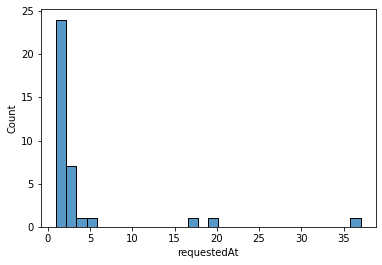

In [138]:
sns.histplot(data = num_oh_students_fa20)

In [139]:
apt1_fa20 = apt_oh_fa20.groupby(['APT 1']).count()
apt2_fa20 = apt_oh_fa20.groupby(['APT 2']).count()
apt3_fa20 = apt_oh_fa20.groupby(['APT 3']).count()
apt4_fa20 = apt_oh_fa20.groupby(['APT 4']).count()
apt5_fa20 = apt_oh_fa20.groupby(['APT 5']).count()
apt6_fa20 = apt_oh_fa20.groupby(['APT 6']).count()
apt7_fa20 = apt_oh_fa20.groupby(['APT7']).count()
apt8_fa20 = apt_oh_fa20.groupby(['APT8']).count()

print('APT 1 has '+ apt1_fa20.iloc[1][True].astype(str)+ ' students')
print('APT 2 has '+ apt2_fa20.iloc[1][True].astype(str)+ ' students')
print('APT 3 has '+ apt3_fa20.iloc[1][True].astype(str)+ ' students')
print('APT 4 has '+ apt4_fa20.iloc[1][True].astype(str)+ ' students')
print('APT 5 has '+ apt5_fa20.iloc[1][True].astype(str)+ ' students')
print('APT 6 has '+ apt6_fa20.iloc[1][True].astype(str)+ ' students')
print('APT 7 has '+ apt7_fa20.iloc[1][True].astype(str)+ ' students')
print('APT 8 has '+ apt8_fa20.iloc[1][True].astype(str)+ ' students')


APT 1 has 2 students
APT 2 has 22 students
APT 3 has 26 students
APT 4 has 20 students
APT 5 has 25 students
APT 6 has 12 students
APT 7 has 10 students
APT 8 has 12 students


In [140]:
oh_students_fa20 = pd.DataFrame()
oh_students_fa20['oh_students']=apt_oh_fa20['anonStudent']
apt_students_fa20 = pd.DataFrame()
apt_students_fa20['apt_students']=struggling_students_fa20['anonid']
apt_students_fa20.head()
print(len(apt_students_fa20))

258


## Fa20 Combining OH and APT

In [141]:
nos_fa20=num_oh_students_fa20.to_frame(name = 'count').reset_index()
ns_fa20=num_students_fa20.rename(columns = {"anonid":"anonStudent"})
ns_fa20.head()

frames_fa20 = [nos_fa20, ns_fa20]

result3_fa20 = pd.concat(frames_fa20).reset_index()
result3_fa20.head()
print(len(result3_fa20))
print('36 total OH Students, 150 struggling students, 186 combined')
print(len(result3_fa20['anonStudent'])-len(result3_fa20['anonStudent'].drop_duplicates()))
#result3.dtypes


186
36 total OH Students, 150 struggling students, 186 combined
36


/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [142]:
overlap_fa20=0
for student in ns_fa20['anonStudent']:
    for s in nos_fa20['anonStudent']:
        if student==s:
            overlap_fa20+=1
print(overlap_fa20)
print('of struggling students visited OH')
print(' ')
print('Every student who visited office hours for an APT was struggling. Of the struggling students, ~33% of them visited Office Hours.')
print(' ')
print('This shows that number of APT submissions is a good indicator of OH attendance for students')

36
of struggling students visited OH
 
Every student who visited office hours for an APT was struggling. Of the struggling students, ~33% of them visited Office Hours.
 
This shows that number of APT submissions is a good indicator of OH attendance for students


In [143]:
df_fa20 = df_fa20.assign(result=df_fa20['anonid'].isin(num_students_fa20['anonid']).astype(bool))
df_fa20.head()

,anonid,timestamp,apt_name,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other,result
0,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:05:39+00:00,bookrating,NaN,1,fa20,math,summative,"gravity, bogsquare, cone, grayscale, laundry, ...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN,True
1,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:05:58+00:00,bookrating,1.00,1,fa20,math,summative,"gravity, bogsquare, cone, grayscale, laundry, ...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN,True
2,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:10:59+00:00,specificwords,0.48,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN,True
3,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:11:36+00:00,specificwords,0.48,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN,True
4,0a7d9ec15bc173d324248983059d4d863ed0e8c7,2020-09-25 12:12:20+00:00,specificwords,1.00,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,2020-09-28 23:59:59-04:00,2020-09-28 23:59:59-04:00,NaN,NaN,NaN,True


In [144]:
df_fa20.groupby(['result']).count()

,anonid,timestamp,apt_name,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other
result,,,,,,,,,,,,,,,
True,25950,25950,25950,23647,25950,25950,23891,25950,11043,24827,24827,24827,7307,11094,4302


In [145]:
anonids_fa20=df_fa20.groupby(['anonid']).count()
print(len(anonids_fa20))

150


In [146]:
apt_oh_fa20=apt_oh_fa20.rename(columns={'anonStudent': 'anonid'})
apt_oh_fa20.dtypes

anonid                                 object
requestedAt                            object
startedAt                              object
completedAt                            object
APT 1                                  object
APT 2                                  object
APT 3                                  object
APT 4                                  object
APT 5                                  object
APT 6                                  object
APT7                                   object
APT8                                   object
OTHER                                  object
OTHER                                  object
OTHER                                  object
OTHER                                  object
Understanding a past assignment/APT    object
I will need more help                  object
I did not make progress                object
apt_set                                object
dtype: object

In [147]:
mergedf_fa20=pd.merge(df_fa20, apt_oh_fa20, on=['anonid'])
print(len(mergedf_fa20))
mergedf_fa20.head()

33401


,anonid,timestamp,apt_name,score,apt_set_x,semester,concept,type,mapping,assign_date,...,APT7,APT8,OTHER,OTHER,OTHER,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set_y
0,0684bcb95dbfda587909c05fc1cea8e2cad4b429,2020-09-25 13:01:24+00:00,bookrating,1.0,1,fa20,math,summative,"gravity, bogsquare, cone, grayscale, laundry, ...",2020-09-25 00:00:00-04:00,...,False,False,Spring 2020 Practice Exam 1,False,False,False,True,False,False,NaN
1,0684bcb95dbfda587909c05fc1cea8e2cad4b429,2020-09-25 13:11:04+00:00,specificwords,1.0,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,...,False,False,Spring 2020 Practice Exam 1,False,False,False,True,False,False,NaN
2,0684bcb95dbfda587909c05fc1cea8e2cad4b429,2020-09-25 13:12:11+00:00,codebreaker,NaN,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,...,False,False,Spring 2020 Practice Exam 1,False,False,False,True,False,False,NaN
3,0684bcb95dbfda587909c05fc1cea8e2cad4b429,2020-09-25 13:12:33+00:00,codebreaker,0.0,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,...,False,False,Spring 2020 Practice Exam 1,False,False,False,True,False,False,NaN
4,0684bcb95dbfda587909c05fc1cea8e2cad4b429,2020-09-25 13:35:37+00:00,codebreaker,0.0,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,...,False,False,Spring 2020 Practice Exam 1,False,False,False,True,False,False,NaN


In [148]:
mergedf_fa20=mergedf_fa20.loc[mergedf_fa20['score'] == 1]
print(len(mergedf_fa20))
mergedf_fa20.head()

8099


,anonid,timestamp,apt_name,score,apt_set_x,semester,concept,type,mapping,assign_date,...,APT7,APT8,OTHER,OTHER,OTHER,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set_y
0,0684bcb95dbfda587909c05fc1cea8e2cad4b429,2020-09-25 13:01:24+00:00,bookrating,1.0,1,fa20,math,summative,"gravity, bogsquare, cone, grayscale, laundry, ...",2020-09-25 00:00:00-04:00,...,False,False,Spring 2020 Practice Exam 1,False,False,False,True,False,False,NaN
1,0684bcb95dbfda587909c05fc1cea8e2cad4b429,2020-09-25 13:11:04+00:00,specificwords,1.0,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,...,False,False,Spring 2020 Practice Exam 1,False,False,False,True,False,False,NaN
7,0684bcb95dbfda587909c05fc1cea8e2cad4b429,2020-09-25 13:42:17+00:00,codebreaker,1.0,1,fa20,"string concepts, string methods, sequence memb...",summative,"sentencelength, portmanteau, removemiddle, cgr...",2020-09-25 00:00:00-04:00,...,False,False,Spring 2020 Practice Exam 1,False,False,False,True,False,False,NaN
8,0684bcb95dbfda587909c05fc1cea8e2cad4b429,2020-08-26 01:09:29+00:00,laundry,1.0,1,fa20,math,formative,bookrating,2020-08-25 00:00:00-04:00,...,False,False,Spring 2020 Practice Exam 1,False,False,False,True,False,False,NaN
9,0684bcb95dbfda587909c05fc1cea8e2cad4b429,2020-08-28 01:56:14+00:00,bogsquare,1.0,1,fa20,math,formative,bookrating,2020-08-25 00:00:00-04:00,...,False,False,Spring 2020 Practice Exam 1,False,False,False,True,False,False,NaN


In [149]:
mergedf_fa20['startedAt'] = pd.to_datetime(mergedf_fa20.startedAt).dt.tz_convert('utc')


In [150]:
mergedf_fa20['requestedAt'] = pd.to_datetime(mergedf_fa20.requestedAt).dt.tz_convert('utc')


In [151]:
mergedf_fa20['completedAt'] = pd.to_datetime(mergedf_fa20.completedAt).dt.tz_convert('utc')


In [152]:
mergedf_fa20.dtypes

anonid                                                     object
timestamp                                     datetime64[ns, UTC]
apt_name                                                   object
score                                                     float64
apt_set_x                                                  object
semester                                                   object
concept                                                    object
type                                                       object
mapping                                                    object
assign_date                            datetime64[ns, US/Eastern]
due_date                               datetime64[ns, US/Eastern]
late_due                               datetime64[ns, US/Eastern]
required                                                  float64
notes                                                      object
other                                                      object
result    

In [153]:
duringoh_fa20=mergedf_fa20[(mergedf_fa20['timestamp'] >= mergedf_fa20['startedAt'])& (mergedf_fa20['timestamp'] <= mergedf_fa20['completedAt'])]
print(len(duringoh_fa20))

90


In [154]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(duringoh_fa20)

                                         anonid                 timestamp  \
1657   df527291ac3cda917e8a9ad7c952186509fd862d 2020-10-04 15:36:08+00:00   
1732   df527291ac3cda917e8a9ad7c952186509fd862d 2020-11-05 00:33:11+00:00   
2406   680563b2250909e80eee32cef1b4b6dc4ec2e32c 2020-09-21 02:34:12+00:00   
2407   680563b2250909e80eee32cef1b4b6dc4ec2e32c 2020-09-21 02:37:43+00:00   
2745   820af69a5cc89ce70966e1a4c97b2ee185c15ee3 2020-10-05 00:25:00+00:00   
3437   c95bb199db409f1e9b286179e3ee77e7132d365f 2020-11-10 00:52:19+00:00   
4698   4864b0e9aa29e64f856b81770546b9bf81fd5cc6 2020-10-05 01:20:34+00:00   
4701   4864b0e9aa29e64f856b81770546b9bf81fd5cc6 2020-10-05 01:21:04+00:00   
4704   4864b0e9aa29e64f856b81770546b9bf81fd5cc6 2020-10-05 01:21:15+00:00   
4772   4864b0e9aa29e64f856b81770546b9bf81fd5cc6 2020-10-12 00:21:37+00:00   
4784   4864b0e9aa29e64f856b81770546b9bf81fd5cc6 2020-10-12 00:36:39+00:00   
4975   4864b0e9aa29e64f856b81770546b9bf81fd5cc6 2020-11-09 01:20:57+00:00   

In [155]:
duringoh_fa20.groupby(['anonid']).count().sort_values(by='apt_name', ascending=False)


,timestamp,apt_name,score,apt_set_x,semester,concept,type,mapping,assign_date,due_date,...,APT7,APT8,OTHER,OTHER,OTHER,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set_y
anonid,,,,,,,,,,,,,,,,,,,,,
d7fc976f7571154d0c82b3e63df360b25cfb386a,32,32,32,32,32,32,32,10,32,32,...,32,32,32,32,32,32,32,32,32,0
4d5fcba2ae6e63e4055530d2d49b5f19393cebae,15,15,15,15,15,15,15,8,15,15,...,15,15,15,15,15,15,15,15,15,0
07ea200f551279156d1925d5b34bdbd3b4e7a060,10,10,10,10,10,10,10,3,10,10,...,10,10,10,10,10,10,10,10,10,0
4864b0e9aa29e64f856b81770546b9bf81fd5cc6,6,6,6,6,6,6,6,0,6,6,...,6,6,6,6,6,6,6,6,6,0
166c6086efea9c6c5becf2c83ffa8e2a7a448282,5,5,5,5,5,5,5,1,5,5,...,5,5,5,5,5,5,5,5,5,0
23d95f626e496b617e8f68ac5aa023fc2fc9d7cb,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0
4d8b5c5eefb0d1fd72446723ef5f3fd1e3eb2035,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0
680563b2250909e80eee32cef1b4b6dc4ec2e32c,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
de0eed21ba38ff6da2a79d7697f1f55f514a2fb0,2,2,2,2,2,2,2,0,2,2,...,2,2,2,2,2,2,2,2,2,0


In [156]:
strugglemerge_fa20=pd.merge(struggles_fa20, df_fa20, on=['anonid', 'apt_name'])
strugglemerge_fa20.head()

,anonid,apt_name,num_submissions,struggling,timestamp,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other,result
0,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,special,3,True,2020-10-05 15:18:27+00:00,1.00000,4,fa20,"for loops, if statements, string methods, sequ...",formative,NaN,2020-09-29 00:00:00-04:00,2020-10-06 23:30:00-04:00,2020-10-07 23:30:00-04:00,NaN,NaN,NaN,True
1,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,special,3,True,2020-10-27 19:39:11+00:00,0.85714,4,fa20,"for loops, if statements, string methods, sequ...",formative,NaN,2020-09-29 00:00:00-04:00,2020-10-06 23:30:00-04:00,2020-10-07 23:30:00-04:00,NaN,NaN,NaN,True
2,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,special,3,True,2020-10-27 19:42:21+00:00,1.00000,4,fa20,"for loops, if statements, string methods, sequ...",formative,NaN,2020-09-29 00:00:00-04:00,2020-10-06 23:30:00-04:00,2020-10-07 23:30:00-04:00,NaN,NaN,NaN,True
3,4df7be8f229f99400fdfad1e4c5cce0b2a8113e7,medaltable,3,True,2020-11-05 16:46:32+00:00,0.00000,7,fa20,"sort, for loops, dictionary, list concepts, st...",formative,NaN,2020-10-22 00:00:00-04:00,2020-11-05 23:30:00-05:00,2020-11-06 23:30:00-05:00,1.0,done in lab 10/23,NaN,True
4,4df7be8f229f99400fdfad1e4c5cce0b2a8113e7,medaltable,3,True,2020-11-05 16:47:31+00:00,0.00000,7,fa20,"sort, for loops, dictionary, list concepts, st...",formative,NaN,2020-10-22 00:00:00-04:00,2020-11-05 23:30:00-05:00,2020-11-06 23:30:00-05:00,1.0,done in lab 10/23,NaN,True


In [157]:
struggleoh_fa20=pd.merge(strugglemerge_fa20, apt_oh_fa20, on=['anonid'])
struggleoh_fa20.head()

,anonid,apt_name,num_submissions,struggling,timestamp,score,apt_set_x,semester,concept,type,...,APT7,APT8,OTHER,OTHER,OTHER,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set_y
0,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,special,3,True,2020-10-05 15:18:27+00:00,1.0,4,fa20,"for loops, if statements, string methods, sequ...",formative,...,True,False,False,False,False,False,False,False,False,NaN
1,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,special,3,True,2020-10-05 15:18:27+00:00,1.0,4,fa20,"for loops, if statements, string methods, sequ...",formative,...,True,False,False,False,False,False,False,False,False,NaN
2,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,special,3,True,2020-10-05 15:18:27+00:00,1.0,4,fa20,"for loops, if statements, string methods, sequ...",formative,...,False,False,False,False,False,False,False,False,False,NaN
3,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,special,3,True,2020-10-05 15:18:27+00:00,1.0,4,fa20,"for loops, if statements, string methods, sequ...",formative,...,False,False,False,False,False,False,False,False,False,NaN
4,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,special,3,True,2020-10-05 15:18:27+00:00,1.0,4,fa20,"for loops, if statements, string methods, sequ...",formative,...,False,False,False,False,False,False,False,False,False,NaN


In [158]:
struggleoh_fa20['startedAt'] = pd.to_datetime(struggleoh_fa20.startedAt).dt.tz_convert('utc')
struggleoh_fa20['requestedAt'] = pd.to_datetime(struggleoh_fa20.requestedAt).dt.tz_convert('utc')
struggleoh_fa20['completedAt'] = pd.to_datetime(struggleoh_fa20.completedAt).dt.tz_convert('utc')

In [159]:
struggleduringoh_fa20=struggleoh_fa20[(struggleoh_fa20['timestamp'] >= struggleoh_fa20['startedAt'])& (struggleoh_fa20['timestamp'] <= struggleoh_fa20['completedAt'])]
print(len(struggleduringoh_fa20))


330


In [160]:
#median score of submissions in total
struggleoh_fa20['score'].median()

0.4

In [161]:
#median score of submissions that occur during OH
struggleduringoh_fa20['score'].median()

0.57143

In [162]:
#mean score of submissions that occur during OH
struggleduringoh_fa20['score'].mean()

0.5201969230769233

In [163]:
#median number of submissions of someone who goes to office hours and submits an APT during the OH time frame
struggleduringoh_fa20['num_submissions'].median()

11.0

In [164]:
#median number of submissions for someone that goes to office hours
struggleoh_fa20['num_submissions'].median()

10.0

In [165]:
#only include submissions with a perfect score
strugglepass_fa20=struggleduringoh_fa20.loc[struggleduringoh_fa20['score'] == 1]
print(len(strugglepass_fa20))

67


In [166]:
#all rows for APT submissions of 1 that occurre during an OH session
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(strugglepass_fa20)

                                         anonid          apt_name  \
583    4d5fcba2ae6e63e4055530d2d49b5f19393cebae            txtmsg   
674    4d5fcba2ae6e63e4055530d2d49b5f19393cebae    sentencelength   
748    4d5fcba2ae6e63e4055530d2d49b5f19393cebae     substringfreq   
2150   4d5fcba2ae6e63e4055530d2d49b5f19393cebae       codebreaker   
2167   4d5fcba2ae6e63e4055530d2d49b5f19393cebae       codebreaker   
2590   4d5fcba2ae6e63e4055530d2d49b5f19393cebae         morselike   
2932   4d5fcba2ae6e63e4055530d2d49b5f19393cebae     specificwords   
3172   4d5fcba2ae6e63e4055530d2d49b5f19393cebae         emphasize   
4175   4d5fcba2ae6e63e4055530d2d49b5f19393cebae     lastnamefirst   
4563   4d5fcba2ae6e63e4055530d2d49b5f19393cebae           yahtzee   
6189   4d8b5c5eefb0d1fd72446723ef5f3fd1e3eb2035     lastnamefirst   
6516   4d8b5c5eefb0d1fd72446723ef5f3fd1e3eb2035    sentencelength   
7025   c95bb199db409f1e9b286179e3ee77e7132d365f        positiveid   
8442   07ea200f551279156d1925d5b34

In [167]:
#number of pass submissions during OH per student
strugglepass_fa20.groupby(['anonid']).count().sort_values(by='apt_name', ascending=False)


,apt_name,num_submissions,struggling,timestamp,score,apt_set_x,semester,concept,type,mapping,...,APT7,APT8,OTHER,OTHER,OTHER,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set_y
anonid,,,,,,,,,,,,,,,,,,,,,
d7fc976f7571154d0c82b3e63df360b25cfb386a,26,26,26,26,26,26,26,26,26,9,...,26,26,26,26,26,26,26,26,26,0
4d5fcba2ae6e63e4055530d2d49b5f19393cebae,10,10,10,10,10,10,10,10,10,6,...,10,10,10,10,10,10,10,10,10,0
07ea200f551279156d1925d5b34bdbd3b4e7a060,5,5,5,5,5,5,5,5,5,2,...,5,5,5,5,5,5,5,5,5,0
23d95f626e496b617e8f68ac5aa023fc2fc9d7cb,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0
166c6086efea9c6c5becf2c83ffa8e2a7a448282,3,3,3,3,3,3,3,3,3,0,...,3,3,3,3,3,3,3,3,3,0
4864b0e9aa29e64f856b81770546b9bf81fd5cc6,3,3,3,3,3,3,3,3,3,0,...,3,3,3,3,3,3,3,3,3,0
680563b2250909e80eee32cef1b4b6dc4ec2e32c,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
de0eed21ba38ff6da2a79d7697f1f55f514a2fb0,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,0
df527291ac3cda917e8a9ad7c952186509fd862d,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,0


In [168]:
#number of submissions of individual APTs during OH (median=1)
strugglepass_fa20.groupby(['anonid', 'apt_name']).count()

num_submissions  \
anonid                                   apt_name                            
07ea200f551279156d1925d5b34bdbd3b4e7a060 emphasize                       1   
                                         morselike                       1   
                                         positiveid                      1   
                                         sentencelength                  1   
                                         txtmsg                          1   
0c8c90844fe32762b854dfdbcb1e20267394e74d totalweight                     1   
166c6086efea9c6c5becf2c83ffa8e2a7a448282 pikachu                         1   
                                         txtmsg                          2   
185f681d8f24ae02f812881f638161fe07f18a63 calculator                      1   
23d95f626e496b617e8f68ac5aa023fc2fc9d7cb acronym                         1   
                                         lastnamefirst                   1   
                                         readingscore                    1   
                                         sentencelength                  1   
241085f2c69c0839c5a170eb883f32c18e760876 carrotboxes                     1   
4864b0e9aa29e64f856b81770546b9bf81fd5cc6 common                          1   
                                         pangram                         1   
                                         txtmsg                          1   
4d5fcba2ae6e63e4055530d2d49b5f19393cebae codebreaker                     2   
                                         emphasize                       1   
                                         lastnamefirst                   1   
                                         morselike                       1   
                                         sentencelength                  1   
                                         specificwords                   1   
                                         substringfreq                   1   
                                         txtmsg                          1   
                                         yahtzee                         1   
4d8b5c5eefb0d1fd72446723ef5f3fd1e3eb2035 lastnamefirst                   1   
                                         sentencelength                  1   
57416e73546af5afb9c366d69cd4aa3178c07908 readingscore                    1   
680563b2250909e80eee32cef1b4b6dc4ec2e32c emphasize                       2   
6ca2f355fe1de81cd5ad48bca00cdb8152fe3b88 sortbyfreqs                     1   
820af69a5cc89ce70966e1a4c97b2ee185c15ee3 txtmsg                          1   
ae9adf56ae38a51c558d9d6dcfe228899b8f3828 networth                        1   
c95bb199db409f1e9b286179e3ee77e7132d365f positiveid                      1   
d7fc976f7571154d0c82b3e63df360b25cfb386a acronym                         1   
                                         bagfitter                       1   
                                         calculator                      3   
                                         carrotboxes                     1   
                                         cgratio                         1   
                                         common                          1   
                                         emphasize                       1   
                                         interestingparty                1   
                                         irvoting                        1   
                                         lastnamefirst                   1   
                                         medaltable                      1   
                                         networth                        1   
                                         pangram                         1   
                                         pikachu                         1   
                                         portmanteau                     1   
                                         positiveid                      1   
   

In [169]:
#number successful APT submissions during OH per APT
strugglepass_fa20.groupby(['apt_name']).count().sort_values(by='anonid', ascending=False)


,anonid,num_submissions,struggling,timestamp,score,apt_set_x,semester,concept,type,mapping,...,APT7,APT8,OTHER,OTHER,OTHER,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set_y
apt_name,,,,,,,,,,,,,,,,,,,,,
txtmsg,8,8,8,8,8,8,8,8,8,0,...,8,8,8,8,8,8,8,8,8,0
sentencelength,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0
emphasize,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,0
positiveid,5,5,5,5,5,5,5,5,5,0,...,5,5,5,5,5,5,5,5,5,0
calculator,4,4,4,4,4,4,4,4,4,0,...,4,4,4,4,4,4,4,4,4,0
lastnamefirst,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0
readingscore,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0
pikachu,3,3,3,3,3,3,3,3,3,0,...,3,3,3,3,3,3,3,3,3,0
acronym,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0


In [170]:
#number successful APT submissions during OH per set
strugglepass_fa20.groupby(['apt_set_x']).count().sort_values(by='anonid', ascending=False)


,anonid,apt_name,num_submissions,struggling,timestamp,score,semester,concept,type,mapping,...,APT7,APT8,OTHER,OTHER,OTHER,OTHER,Understanding a past assignment/APT,I will need more help,I did not make progress,apt_set_y
apt_set_x,,,,,,,,,,,,,,,,,,,,,
4,19,19,19,19,19,19,19,19,19,0,...,19,19,19,19,19,19,19,19,19,0
3,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,0
2,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,0
8,8,8,8,8,8,8,8,8,8,0,...,8,8,8,8,8,8,8,8,8,0
5,7,7,7,7,7,7,7,7,7,0,...,7,7,7,7,7,7,7,7,7,0
1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0
7,4,4,4,4,4,4,4,4,4,0,...,4,4,4,4,4,4,4,4,4,0
6,2,2,2,2,2,2,2,1,2,0,...,2,2,2,2,2,2,2,2,2,0


In [171]:
#total struggles per APT
struggles_fa20.groupby(['apt_name']).count().sort_values(by='struggling', ascending=False)


,num_submissions,struggling
apt_name,,
emphasize,127,127
gravity,121,121
codebreaker,99,99
networth,98,98
txtmsg,96,96
...,...,...
irvoting,15,15
buygroceries,13,13
blanket,9,9


In [172]:
#total apt set struggles
struggles_fa20.groupby(['apt_set']).count().sort_values(by='struggling', ascending=False)


,num_submissions,struggling
apt_set,,
1,540,540
2,428,428
3,400,400
4,398,398
5,381,381
8,306,306
7,284,284
6,252,252


###### Also, count number of submissions during an OH time that were not of score 1 and were never of score 1. Find max score for each (apt, student) combo during an OH timeslot and filter for those <1.

In [173]:
nopass_fa20=struggleduringoh_fa20.groupby( [ "anonid", "apt_name", "apt_set_x", "completedAt"])['score'].max().to_frame(name = 'max_score').reset_index()
nopass_fa20.head()
print(len(nopass_fa20))

84


In [174]:
nopass_fa20['not_pass'] = nopass_fa20['max_score']<1.00000

In [175]:
nopass_fa20=nopass_fa20.loc[nopass_fa20['not_pass'] == True]
print(len(nopass_fa20))

21


In [176]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(nopass_fa20)

                                      anonid          apt_name  apt_set_x  \
1   07ea200f551279156d1925d5b34bdbd3b4e7a060        medaltable          7   
3   07ea200f551279156d1925d5b34bdbd3b4e7a060           pangram          8   
6   07ea200f551279156d1925d5b34bdbd3b4e7a060       sortbyfreqs          6   
18  4864b0e9aa29e64f856b81770546b9bf81fd5cc6          networth          5   
25  4d5fcba2ae6e63e4055530d2d49b5f19393cebae      readingscore          2   
26  4d5fcba2ae6e63e4055530d2d49b5f19393cebae    sentencelength          2   
34  4d8b5c5eefb0d1fd72446723ef5f3fd1e3eb2035       sandwichbar          5   
37  57416e73546af5afb9c366d69cd4aa3178c07908      removemiddle          2   
40  71cbb25764937c1a56f78f3e25a71c503c467f11         emphasize          3   
42  a18d1be132aac4ed722b17b2b76d1f122a85c694         emphasize          3   
43  a2bfbec72dadbbeb09898f70adc6f50ec8c49060  interestingparty          8   
45  c95bb199db409f1e9b286179e3ee77e7132d365f        positiveid          8   

In [177]:
ohfail_fa20=pd.merge(nopass_fa20, df_fa20, on=['anonid', 'apt_name'])
ohfail_fa20.head()
print(len(ohfail_fa20))

372


In [178]:
ohfail_fa20=ohfail_fa20[(ohfail_fa20['timestamp'] >= ohfail_fa20['completedAt'])]
print(len(ohfail_fa20))

185


In [179]:
ohfail_fa20['difference']=ohfail_fa20['timestamp']-ohfail_fa20['completedAt']
ohfail_fa20.head()

,anonid,apt_name,apt_set_x,completedAt,max_score,not_pass,timestamp,score,apt_set,semester,...,type,mapping,assign_date,due_date,late_due,required,notes,other,result,difference
12,07ea200f551279156d1925d5b34bdbd3b4e7a060,medaltable,7,2020-11-06 00:08:53.615000+00:00,0.0,True,2020-11-06 20:54:44+00:00,1.0,7,fa20,...,formative,NaN,2020-10-22 00:00:00-04:00,2020-11-05 23:30:00-05:00,2020-11-06 23:30:00-05:00,1.0,done in lab 10/23,NaN,True,20:45:50.385000
13,07ea200f551279156d1925d5b34bdbd3b4e7a060,medaltable,7,2020-11-06 00:08:53.615000+00:00,0.0,True,2020-11-06 20:58:21+00:00,NaN,7,fa20,...,formative,NaN,2020-10-22 00:00:00-04:00,2020-11-05 23:30:00-05:00,2020-11-06 23:30:00-05:00,1.0,done in lab 10/23,NaN,True,20:49:27.385000
16,07ea200f551279156d1925d5b34bdbd3b4e7a060,pangram,8,2020-11-10 01:02:01.461000+00:00,0.8,True,2020-11-10 04:07:29+00:00,0.2,8,fa20,...,formative,NaN,2020-11-02 00:00:00-05:00,2020-11-10 23:30:00-05:00,2020-11-11 23:30:00-05:00,NaN,NaN,NaN,True,03:05:27.539000
17,07ea200f551279156d1925d5b34bdbd3b4e7a060,pangram,8,2020-11-10 01:02:01.461000+00:00,0.8,True,2020-11-10 04:08:04+00:00,0.2,8,fa20,...,formative,NaN,2020-11-02 00:00:00-05:00,2020-11-10 23:30:00-05:00,2020-11-11 23:30:00-05:00,NaN,NaN,NaN,True,03:06:02.539000
18,07ea200f551279156d1925d5b34bdbd3b4e7a060,pangram,8,2020-11-10 01:02:01.461000+00:00,0.8,True,2020-11-10 04:08:33+00:00,0.8,8,fa20,...,formative,NaN,2020-11-02 00:00:00-05:00,2020-11-10 23:30:00-05:00,2020-11-11 23:30:00-05:00,NaN,NaN,NaN,True,03:06:31.539000


In [180]:
ohfail_fa20['difference']=ohfail_fa20['difference'].astype('timedelta64[m]').astype(int)

ohfail_fa20.head()

,anonid,apt_name,apt_set_x,completedAt,max_score,not_pass,timestamp,score,apt_set,semester,...,type,mapping,assign_date,due_date,late_due,required,notes,other,result,difference
12,07ea200f551279156d1925d5b34bdbd3b4e7a060,medaltable,7,2020-11-06 00:08:53.615000+00:00,0.0,True,2020-11-06 20:54:44+00:00,1.0,7,fa20,...,formative,NaN,2020-10-22 00:00:00-04:00,2020-11-05 23:30:00-05:00,2020-11-06 23:30:00-05:00,1.0,done in lab 10/23,NaN,True,1245
13,07ea200f551279156d1925d5b34bdbd3b4e7a060,medaltable,7,2020-11-06 00:08:53.615000+00:00,0.0,True,2020-11-06 20:58:21+00:00,NaN,7,fa20,...,formative,NaN,2020-10-22 00:00:00-04:00,2020-11-05 23:30:00-05:00,2020-11-06 23:30:00-05:00,1.0,done in lab 10/23,NaN,True,1249
16,07ea200f551279156d1925d5b34bdbd3b4e7a060,pangram,8,2020-11-10 01:02:01.461000+00:00,0.8,True,2020-11-10 04:07:29+00:00,0.2,8,fa20,...,formative,NaN,2020-11-02 00:00:00-05:00,2020-11-10 23:30:00-05:00,2020-11-11 23:30:00-05:00,NaN,NaN,NaN,True,185
17,07ea200f551279156d1925d5b34bdbd3b4e7a060,pangram,8,2020-11-10 01:02:01.461000+00:00,0.8,True,2020-11-10 04:08:04+00:00,0.2,8,fa20,...,formative,NaN,2020-11-02 00:00:00-05:00,2020-11-10 23:30:00-05:00,2020-11-11 23:30:00-05:00,NaN,NaN,NaN,True,186
18,07ea200f551279156d1925d5b34bdbd3b4e7a060,pangram,8,2020-11-10 01:02:01.461000+00:00,0.8,True,2020-11-10 04:08:33+00:00,0.8,8,fa20,...,formative,NaN,2020-11-02 00:00:00-05:00,2020-11-10 23:30:00-05:00,2020-11-11 23:30:00-05:00,NaN,NaN,NaN,True,186


In [181]:
conditions_fa20 = [
    (ohfail_fa20['difference'] == 0),
    (ohfail_fa20['difference'] > 0) & (ohfail_fa20['difference'] <= 30),
    (ohfail_fa20['difference'] > 30) & (ohfail_fa20['difference'] <= 60),
    (ohfail_fa20['difference'] > 60) & (ohfail_fa20['difference'] <= 90),
    (ohfail_fa20['difference'] > 90) & (ohfail_fa20['difference'] <= 120),
    (ohfail_fa20['difference'] > 120) & (ohfail_fa20['difference'] <= 150),
    (ohfail_fa20['difference'] > 150) & (ohfail_fa20['difference'] <= 180),
    (ohfail_fa20['difference'] > 180) & (ohfail_fa20['difference'] <= 1440),
    (ohfail_fa20['difference'] > 1440)
    ]

# create a list of the values we want to assign for each condition
values_fa20 = ['0', '1-30', '31-60', '61-90', '91-120', '121-150', '151-180', '180-1 day', '>1 day']

# create a new column and use np.select to assign values to it using our lists as arguments
ohfail_fa20['time_since_oh'] = np.select(conditions_fa20, values_fa20)

# display updated DataFrame
ohfail_fa20.head()

,anonid,apt_name,apt_set_x,completedAt,max_score,not_pass,timestamp,score,apt_set,semester,...,mapping,assign_date,due_date,late_due,required,notes,other,result,difference,time_since_oh
12,07ea200f551279156d1925d5b34bdbd3b4e7a060,medaltable,7,2020-11-06 00:08:53.615000+00:00,0.0,True,2020-11-06 20:54:44+00:00,1.0,7,fa20,...,NaN,2020-10-22 00:00:00-04:00,2020-11-05 23:30:00-05:00,2020-11-06 23:30:00-05:00,1.0,done in lab 10/23,NaN,True,1245,180-1 day
13,07ea200f551279156d1925d5b34bdbd3b4e7a060,medaltable,7,2020-11-06 00:08:53.615000+00:00,0.0,True,2020-11-06 20:58:21+00:00,NaN,7,fa20,...,NaN,2020-10-22 00:00:00-04:00,2020-11-05 23:30:00-05:00,2020-11-06 23:30:00-05:00,1.0,done in lab 10/23,NaN,True,1249,180-1 day
16,07ea200f551279156d1925d5b34bdbd3b4e7a060,pangram,8,2020-11-10 01:02:01.461000+00:00,0.8,True,2020-11-10 04:07:29+00:00,0.2,8,fa20,...,NaN,2020-11-02 00:00:00-05:00,2020-11-10 23:30:00-05:00,2020-11-11 23:30:00-05:00,NaN,NaN,NaN,True,185,180-1 day
17,07ea200f551279156d1925d5b34bdbd3b4e7a060,pangram,8,2020-11-10 01:02:01.461000+00:00,0.8,True,2020-11-10 04:08:04+00:00,0.2,8,fa20,...,NaN,2020-11-02 00:00:00-05:00,2020-11-10 23:30:00-05:00,2020-11-11 23:30:00-05:00,NaN,NaN,NaN,True,186,180-1 day
18,07ea200f551279156d1925d5b34bdbd3b4e7a060,pangram,8,2020-11-10 01:02:01.461000+00:00,0.8,True,2020-11-10 04:08:33+00:00,0.8,8,fa20,...,NaN,2020-11-02 00:00:00-05:00,2020-11-10 23:30:00-05:00,2020-11-11 23:30:00-05:00,NaN,NaN,NaN,True,186,180-1 day


In [182]:
ohfail_fa20.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()


,anonid,apt_name,maximum_score
0,07ea200f551279156d1925d5b34bdbd3b4e7a060,medaltable,1.00000
1,07ea200f551279156d1925d5b34bdbd3b4e7a060,pangram,1.00000
2,07ea200f551279156d1925d5b34bdbd3b4e7a060,sortbyfreqs,1.00000
3,4864b0e9aa29e64f856b81770546b9bf81fd5cc6,networth,1.00000
4,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,readingscore,1.00000
5,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,sentencelength,1.00000
6,4d8b5c5eefb0d1fd72446723ef5f3fd1e3eb2035,sandwichbar,0.56667
7,57416e73546af5afb9c366d69cd4aa3178c07908,removemiddle,1.00000
8,71cbb25764937c1a56f78f3e25a71c503c467f11,emphasize,1.00000
9,a18d1be132aac4ed722b17b2b76d1f122a85c694,emphasize,1.00000


In [183]:
clean_ohfail_fa20=ohfail_fa20[(ohfail_fa20['time_since_oh'] != '0')]


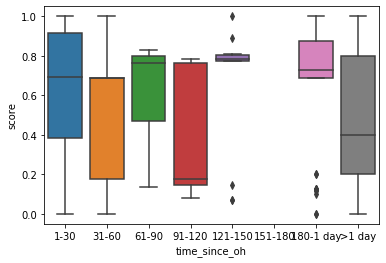

In [308]:
sns.boxplot(data=clean_ohfail_fa20, x="time_since_oh", y="score", order=['1-30', '31-60', '61-90', '91-120', '121-150', '151-180', '180-1 day', '>1 day'])

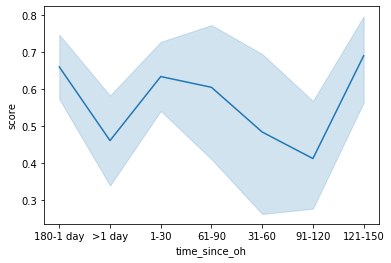

In [185]:
sns.lineplot(data=clean_ohfail_fa20, x="time_since_oh", y="score")

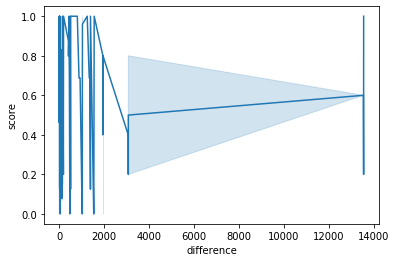

In [186]:
sns.lineplot(data=ohfail_fa20, x="difference", y="score")

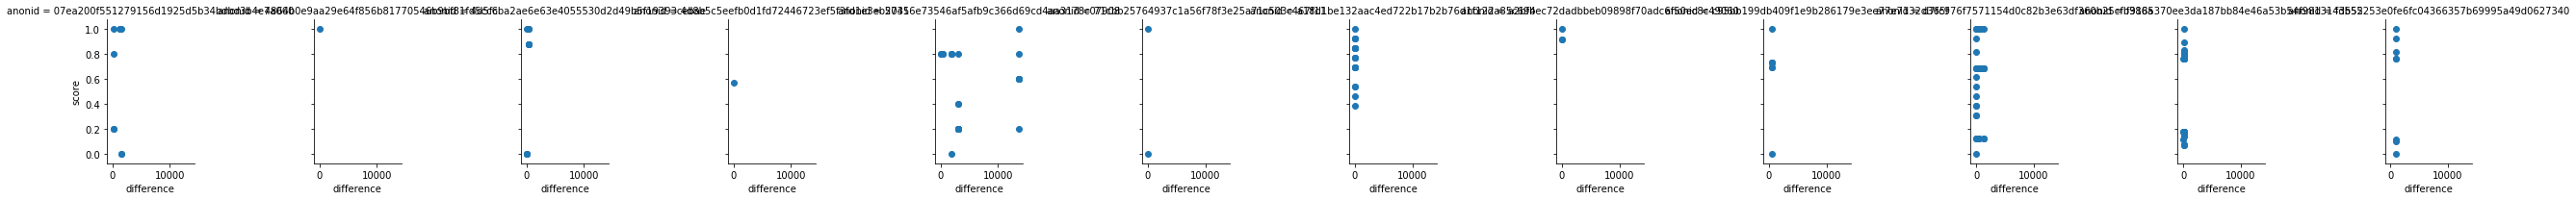

In [187]:
graph = sns.FacetGrid(ohfail_fa20, col ="anonid")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "difference", "score")
# show the object
plt.show()

In [188]:
adapted1_ohfail_fa20=ohfail_fa20[(ohfail_fa20['time_since_oh'] != '180-1 day') & (ohfail_fa20['time_since_oh'] != '>1 day')]
adapted2_ohfail_fa20=ohfail_fa20[(ohfail_fa20['time_since_oh'] != '180-1 day')]
adapted3_ohfail_fa20=ohfail_fa20[(ohfail_fa20['time_since_oh'] != '180-1 day') & (ohfail_fa20['time_since_oh'] != '>1 day') & (ohfail_fa20['time_since_oh'] != '151-180') & (ohfail_fa20['time_since_oh'] != '121-150') & (ohfail_fa20['time_since_oh'] != '91-120')]
adapted4_ohfail_fa20=ohfail_fa20[(ohfail_fa20['time_since_oh'] != '180-1 day') & (ohfail_fa20['time_since_oh'] != '>1 day') & (ohfail_fa20['time_since_oh'] != '151-180') & (ohfail_fa20['time_since_oh'] != '121-150') & (ohfail_fa20['time_since_oh'] != '91-120') & (ohfail_fa20['time_since_oh'] != '61-90')]
adapted5_ohfail_fa20=ohfail_fa20[(ohfail_fa20['time_since_oh'] != '180-1 day') & (ohfail_fa20['time_since_oh'] != '>1 day') & (ohfail_fa20['time_since_oh'] != '151-180') & (ohfail_fa20['time_since_oh'] != '121-150') & (ohfail_fa20['time_since_oh'] != '91-120') & (ohfail_fa20['time_since_oh'] != '61-90') & (ohfail_fa20['time_since_oh'] != '31-60')]
adapted6_ohfail_fa20=ohfail_fa20[(ohfail_fa20['time_since_oh'] != '180-1 day') & (ohfail_fa20['time_since_oh'] != '>1 day') & (ohfail_fa20['time_since_oh'] != '151-180') & (ohfail_fa20['time_since_oh'] != '121-150') & (ohfail_fa20['time_since_oh'] != '91-120') & (ohfail_fa20['time_since_oh'] != '61-90') & (ohfail_fa20['time_since_oh'] != '31-60') & (ohfail_fa20['time_since_oh'] != '1-30')]



In [189]:
adapted1_ohfail_fa20.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 180 mins after OH

,anonid,apt_name,maximum_score
0,4864b0e9aa29e64f856b81770546b9bf81fd5cc6,networth,1.00000
1,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,sentencelength,1.00000
2,4d8b5c5eefb0d1fd72446723ef5f3fd1e3eb2035,sandwichbar,0.56667
3,57416e73546af5afb9c366d69cd4aa3178c07908,removemiddle,0.80000
4,71cbb25764937c1a56f78f3e25a71c503c467f11,emphasize,1.00000
5,a18d1be132aac4ed722b17b2b76d1f122a85c694,emphasize,1.00000
6,a2bfbec72dadbbeb09898f70adc6f50ec8c49060,interestingparty,1.00000
7,d7fc976f7571154d0c82b3e63df360b25cfb386a,common,1.00000
8,d7fc976f7571154d0c82b3e63df360b25cfb386a,emphasize,1.00000
9,d7fc976f7571154d0c82b3e63df360b25cfb386a,family,0.81818


In [190]:
adapted2_ohfail_fa20.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 1 day after OH

,anonid,apt_name,maximum_score
0,07ea200f551279156d1925d5b34bdbd3b4e7a060,sortbyfreqs,1.00000
1,4864b0e9aa29e64f856b81770546b9bf81fd5cc6,networth,1.00000
2,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,sentencelength,1.00000
3,4d8b5c5eefb0d1fd72446723ef5f3fd1e3eb2035,sandwichbar,0.56667
4,57416e73546af5afb9c366d69cd4aa3178c07908,removemiddle,1.00000
5,71cbb25764937c1a56f78f3e25a71c503c467f11,emphasize,1.00000
6,a18d1be132aac4ed722b17b2b76d1f122a85c694,emphasize,1.00000
7,a2bfbec72dadbbeb09898f70adc6f50ec8c49060,interestingparty,1.00000
8,d7fc976f7571154d0c82b3e63df360b25cfb386a,common,1.00000
9,d7fc976f7571154d0c82b3e63df360b25cfb386a,emphasize,1.00000


In [191]:
adapted3_ohfail_fa20.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 90 minutes from OH

,anonid,apt_name,maximum_score
0,4864b0e9aa29e64f856b81770546b9bf81fd5cc6,networth,1.00000
1,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,sentencelength,1.00000
2,4d8b5c5eefb0d1fd72446723ef5f3fd1e3eb2035,sandwichbar,0.56667
3,57416e73546af5afb9c366d69cd4aa3178c07908,removemiddle,0.80000
4,71cbb25764937c1a56f78f3e25a71c503c467f11,emphasize,1.00000
5,a18d1be132aac4ed722b17b2b76d1f122a85c694,emphasize,1.00000
6,a2bfbec72dadbbeb09898f70adc6f50ec8c49060,interestingparty,1.00000
7,d7fc976f7571154d0c82b3e63df360b25cfb386a,common,1.00000
8,d7fc976f7571154d0c82b3e63df360b25cfb386a,emphasize,1.00000
9,d7fc976f7571154d0c82b3e63df360b25cfb386a,family,0.81818


In [192]:
adapted4_ohfail_fa20.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 60 minutes from OH

,anonid,apt_name,maximum_score
0,4864b0e9aa29e64f856b81770546b9bf81fd5cc6,networth,1.00000
1,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,sentencelength,1.00000
2,71cbb25764937c1a56f78f3e25a71c503c467f11,emphasize,1.00000
3,a18d1be132aac4ed722b17b2b76d1f122a85c694,emphasize,1.00000
4,a2bfbec72dadbbeb09898f70adc6f50ec8c49060,interestingparty,1.00000
5,d7fc976f7571154d0c82b3e63df360b25cfb386a,common,1.00000
6,d7fc976f7571154d0c82b3e63df360b25cfb386a,emphasize,1.00000
7,d7fc976f7571154d0c82b3e63df360b25cfb386a,family,0.81818
8,f9185370ee3da187bb84e46a53b54f9813143552,txtmsg,0.17822


In [193]:
adapted5_ohfail_fa20.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 30 minutes from OH

,anonid,apt_name,maximum_score
0,4864b0e9aa29e64f856b81770546b9bf81fd5cc6,networth,1.00000
1,4d5fcba2ae6e63e4055530d2d49b5f19393cebae,sentencelength,1.00000
2,71cbb25764937c1a56f78f3e25a71c503c467f11,emphasize,1.00000
3,a18d1be132aac4ed722b17b2b76d1f122a85c694,emphasize,1.00000
4,a2bfbec72dadbbeb09898f70adc6f50ec8c49060,interestingparty,1.00000
5,d7fc976f7571154d0c82b3e63df360b25cfb386a,common,1.00000
6,d7fc976f7571154d0c82b3e63df360b25cfb386a,emphasize,0.92308


# Spring 2022

In [194]:
#APT Additional Info import
apt_info_sp22 = pd.read_excel("CS APT Problem.xlsx")
print(len(apt_info_sp22))


apt_info_sp22 = apt_info_sp22[apt_info_sp22.index < apt_info_sp22[apt_info_sp22["apt_set"] == "CS201"].index[0]] # omit all info on CS201
apt_info_sp22 = apt_info_sp22[apt_info_sp22["semester"]== "sp22"] # only get Spring 2022 semester

#cleaning time zones
apt_info_sp22["assign_date"] = [d.replace(tzinfo=timezone('US/Eastern')) for d in apt_info_sp22["assign_date"]]
apt_info_sp22["due_date"] = [d.replace(tzinfo=timezone('US/Eastern')) for d in apt_info_sp22["due_date"]]
apt_info_sp22["late_due"] = [d.replace(tzinfo=timezone('US/Eastern')) for d in apt_info_sp22["late_due"]]
apt_info_sp22["late_due"] = apt_info_sp22["late_due"].fillna(apt_info_sp22["due_date"])


print(len(apt_info_sp22))

#apt_info.head()

504
81


In [195]:
#student formative APT log import
formative_sp22 = pd.read_csv("cs101sp22-apt-anon.csv").rename(columns = {"apt":"apt_name"})
print(len(formative_sp22))
formative_sp22.head()

18878


,anonid,timestamp,apt_name,score
0,6fa7f1549926a3e2042ed05ed62e7d20fb9fcd2f,1641856655,NaN,wrongclass
1,6fa7f1549926a3e2042ed05ed62e7d20fb9fcd2f,1641856667,NaN,wrongclass
2,6fa7f1549926a3e2042ed05ed62e7d20fb9fcd2f,1641856741,NaN,wrongclass
3,6fa7f1549926a3e2042ed05ed62e7d20fb9fcd2f,1641856819,NaN,wrongclass
4,6fa7f1549926a3e2042ed05ed62e7d20fb9fcd2f,1641857589,NaN,wrongclass


In [196]:
#student summative APT log import
summative_sp22 = pd.read_csv("cs101sp22-aptquiz-anon.csv").rename(columns = {"apt":"apt_name"})
print(len(summative_sp22))
summative_sp22.head()

3835


,anonid,timestamp,apt_name,score
0,a3c18125d9a6c24261e5a064854f24d58a7fc377,1645710843,totalafter,1.00000
1,a3c18125d9a6c24261e5a064854f24d58a7fc377,1645711514,changephrase,1.00000
2,a3c18125d9a6c24261e5a064854f24d58a7fc377,1645711786,costgroceries,0.75000
3,a3c18125d9a6c24261e5a064854f24d58a7fc377,1645711806,costgroceries,1.00000
4,a3c18125d9a6c24261e5a064854f24d58a7fc377,1645714235,repeatinorder,0.12821


In [197]:
#read in apt extra info data and clean
apt = {}
apt_quiz = {}

formative_sp22["timestamp"] = pd.to_datetime(formative_sp22.timestamp,unit='s').dt.tz_localize('utc')

formative_sp22 = formative_sp22[formative_sp22["apt_name"].notnull()].copy(deep = True).reset_index(drop = True)


summative_sp22["timestamp"] = pd.to_datetime(summative_sp22.timestamp,unit='s').dt.tz_localize('utc')

summative_sp22 = summative_sp22[summative_sp22["apt_name"].notnull()].copy(deep = True).reset_index(drop = True)
formative_sp22.head()

,anonid,timestamp,apt_name,score
0,48a589e89352dea3f616cc9b242e897fbfcd9837,2022-01-11 19:01:20+00:00,introapt,1.00000
1,48a589e89352dea3f616cc9b242e897fbfcd9837,2022-01-11 19:02:25+00:00,introapt,0.00000
2,48a589e89352dea3f616cc9b242e897fbfcd9837,2022-01-11 19:03:45+00:00,introapt,0.00000
3,48a589e89352dea3f616cc9b242e897fbfcd9837,2022-01-11 19:04:27+00:00,introapt,wrongclass
4,48a589e89352dea3f616cc9b242e897fbfcd9837,2022-01-11 19:04:56+00:00,introapt,1.00000


In [198]:
# separate the submissions that were submitted during an apt set's assigned time range vs. extra practice 
extra = {} 
extra_quiz = {} 
for sem in ["sp22"]: 
    if sem not in extra: 
        extra[sem] = pd.DataFrame(columns = formative_sp22.columns)
    if sem not in extra_quiz:  
        extra_quiz[sem] = pd.DataFrame(columns = summative_sp22.columns)
    
    extra[sem] = formative_sp22[~formative_sp22["apt_name"].isin(set(apt_info_sp22[(apt_info_sp22["semester"]== sem) &
                                             (apt_info_sp22["type"].isin(["formative",
                                              "summative_practice"]))]["apt_name"]))].copy(deep = True).reset_index(drop = True)
    
    formative_sp22 = formative_sp22[formative_sp22["apt_name"].isin(set(apt_info_sp22[(apt_info_sp22["semester"]== sem) &
                                             (apt_info_sp22["type"].isin(["formative",
                                              "summative_practice"]))]["apt_name"]))].copy(deep = True).reset_index(drop = True)

    extra_quiz[sem] = summative_sp22[~summative_sp22["apt_name"].isin(set(apt_info_sp22[(apt_info_sp22["semester"]== sem) &
                                             (apt_info_sp22["type"] == "summative")]["apt_name"]))].copy(deep = True).reset_index(drop = True)
    summative_sp22 = summative_sp22[summative_sp22["apt_name"].isin(set(apt_info_sp22[(apt_info_sp22["semester"]== sem) &
                                             (apt_info_sp22["type"] == "summative")]["apt_name"]))].copy(deep = True).reset_index(drop = True)
    

In [199]:
#combine sumamtive and formative dataframes
fr=[summative_sp22, formative_sp22]
sp22=pd.concat(fr)
print(len(sp22))
sp22.head()

21805


,anonid,timestamp,apt_name,score
0,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 13:54:03+00:00,totalafter,1.00000
1,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:05:14+00:00,changephrase,1.00000
2,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:09:46+00:00,costgroceries,0.75000
3,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:10:06+00:00,costgroceries,1.00000
4,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:50:35+00:00,repeatinorder,0.12821


In [200]:
#df = pd.merge(apt_info, sp21, how = "left", on = "apt_name")
df_sp22 = sp22.merge(apt_info_sp22[(apt_info_sp22["semester"]== 'sp22') &
                                             (apt_info_sp22["type"].isin(["formative",
                                              "summative_practice", "summative"]))].copy(deep = True).reset_index(drop = True),
                                              how = "left", on = "apt_name")
print(len(df_sp22))
df_sp22.head()

21805


,anonid,timestamp,apt_name,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other
0,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 13:54:03+00:00,totalafter,1.00000,1,sp22,"string methods, string concepts, for loops",summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN
1,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:05:14+00:00,changephrase,1.00000,1,sp22,"if statements, string methods, string concepts",summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN
2,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:09:46+00:00,costgroceries,0.75000,1,sp22,math,summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN
3,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:10:06+00:00,costgroceries,1.00000,1,sp22,math,summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN
4,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:50:35+00:00,repeatinorder,0.12821,1,sp22,string methods,summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN


In [201]:
grouped_sp22=df_sp22.groupby(['anonid', 'apt_name', 'apt_set'])['score'].max()
grouped_sp22.head()
display(grouped_sp22)

anonid                                    apt_name     apt_set
00abe2c72b514703378a9ac4191f314c6284c8d4  acronym      3            1.00000
                                          badges       6            1.00000
                                          bagels       3            1.00000
                                          bagfitter    5            1.00000
                                          bogsquare    1            1.00000
                                                                    ...    
fdd28f1c5dc65edb59d0e863543c97459d28fad2  trophyshelf  7            1.00000
                                          txtmsg       4          nocompile
                                          wordplay     2            1.00000
                                          yahtzee      4            1.00000
                                          yummyfood    2            1.00000
Name: score, Length: 7624, dtype: object

In [202]:
#find max score per submission per student
new_df_sp22=df_sp22.groupby( [ "anonid", "apt_name", "apt_set"])['score'].max().to_frame(name = 'max_score').reset_index()
new_df_sp22.head()

,anonid,apt_name,apt_set,max_score
0,00abe2c72b514703378a9ac4191f314c6284c8d4,acronym,3,1.00000
1,00abe2c72b514703378a9ac4191f314c6284c8d4,badges,6,1.00000
2,00abe2c72b514703378a9ac4191f314c6284c8d4,bagels,3,1.00000
3,00abe2c72b514703378a9ac4191f314c6284c8d4,bagfitter,5,1.00000
4,00abe2c72b514703378a9ac4191f314c6284c8d4,bogsquare,1,1.00000


In [203]:
#clean column entry
new_df_sp22.replace('wrongclass', 0.0)
new_df_sp22.replace('nocompile', 0.0)
new_df_sp22['max_score'] = pd.to_numeric(new_df_sp22['max_score'], errors='coerce')


In [204]:
#check column types
new_df_sp22.dtypes

anonid        object
apt_name      object
apt_set        int64
max_score    float64
dtype: object

In [205]:
#add struggling column, where max apt score is less than 100%
new_df_sp22['struggling'] = new_df_sp22['max_score']<1.00000
print(len(new_df_sp22))
new_df_sp22.head()

7624


,anonid,apt_name,apt_set,max_score,struggling
0,00abe2c72b514703378a9ac4191f314c6284c8d4,acronym,3,1.0,False
1,00abe2c72b514703378a9ac4191f314c6284c8d4,badges,6,1.0,False
2,00abe2c72b514703378a9ac4191f314c6284c8d4,bagels,3,1.0,False
3,00abe2c72b514703378a9ac4191f314c6284c8d4,bagfitter,5,1.0,False
4,00abe2c72b514703378a9ac4191f314c6284c8d4,bogsquare,1,1.0,False


In [206]:
#sort for only struggling students
struggling_students_sp22 = new_df_sp22[new_df_sp22['struggling'] == True] 
print(len(struggling_students_sp22))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(struggling_students_sp22)

307
                                        anonid          apt_name  apt_set  \
114   0219d29b99994624e30bc1c6c6a40f4cc7f78577         thesaurus        8   
158   039e34d51b30eb570b88c37af04e8d6ec8721c45           pikachu        4   
224   075e08eb6d26f8a2ba5c969dd17141c21f7e9edc         thesaurus        8   
256   09a53430e577e831783f28be7b7df0ffc82000d0            moving        8   
300   0b077deac6dad651415e85ce8901ed5675e4e7f3            family        5   
311   0b077deac6dad651415e85ce8901ed5675e4e7f3       numbercount        2   
319   0b077deac6dad651415e85ce8901ed5675e4e7f3     repeatinorder        1   
340   0bb7031d27d3e89db7c74dec43da990b5ebac1cc        bordacount        6   
357   0bb7031d27d3e89db7c74dec43da990b5ebac1cc       phraseindex        2   
371   0bb7031d27d3e89db7c74dec43da990b5ebac1cc         yummyfood        2   
492   0e43991ce62031202e0b8e833b611faf62846489          networth        5   
533   12a74d6844567af1554dcf7f23e74f40fb0d5dcd       insidecount        

In [207]:
#count number of struggling students
new_df_sp22.groupby(['struggling']).count()

,anonid,apt_name,apt_set,max_score
struggling,,,,
False,7317,7317,7317,6505
True,307,307,307,307


In [208]:
struggling_students_sp22.groupby(['apt_set']).count()

,anonid,apt_name,max_score,struggling
apt_set,,,,
1,47,47,47,47
2,49,49,49,49
3,30,30,30,30
4,30,30,30,30
5,26,26,26,26
6,16,16,16,16
7,40,40,40,40
8,69,69,69,69


In [209]:
#number of struggles per student
struggling_count_sp22=struggling_students_sp22.groupby(['anonid']).count()
struggling_count_sp22.sort_values(by='apt_name', ascending=False)
print(len(struggling_count_sp22))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(struggling_count_sp22)


114
                                          apt_name  apt_set  max_score  \
anonid                                                                   
0219d29b99994624e30bc1c6c6a40f4cc7f78577         1        1          1   
039e34d51b30eb570b88c37af04e8d6ec8721c45         1        1          1   
075e08eb6d26f8a2ba5c969dd17141c21f7e9edc         1        1          1   
09a53430e577e831783f28be7b7df0ffc82000d0         1        1          1   
0b077deac6dad651415e85ce8901ed5675e4e7f3         3        3          3   
0bb7031d27d3e89db7c74dec43da990b5ebac1cc         3        3          3   
0e43991ce62031202e0b8e833b611faf62846489         1        1          1   
12a74d6844567af1554dcf7f23e74f40fb0d5dcd         1        1          1   
1331ee02961b7033e5f9e3b4b1dccd01a95174ff         4        4          4   
1b2bc39c51167b261306ec28006f9a2b62491a18         1        1          1   
1d09caf81a761a9d2b37a482ae048076a8679fad         6        6          6   
1f49b66286844b5959d715b59f3514a574

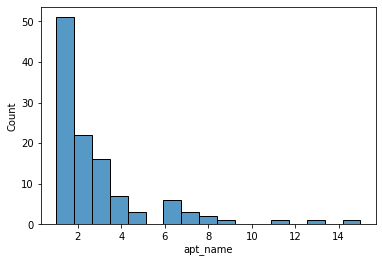

In [210]:
#view number of struggles per student
sns.histplot(data = struggling_count_sp22, x = "apt_name")

In [211]:
only_fail_sp22=df_sp22

only_fail_sp22=df_sp22
only_fail_sp22.replace('wrongclass', 0.0)
only_fail_sp22.replace('nocompile', 0.0)
only_fail_sp22['score'] = pd.to_numeric(only_fail_sp22['score'], errors='coerce')

only_fail_sp22 = only_fail_sp22[only_fail_sp22['score'] < 1.000]




#only_fail = only_fail[only_fail['score'] == True] 
only_fail_sp22.head()

,anonid,timestamp,apt_name,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other
2,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:09:46+00:00,costgroceries,0.75000,1,sp22,math,summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN
4,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:50:35+00:00,repeatinorder,0.12821,1,sp22,string methods,summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN
5,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:51:27+00:00,repeatinorder,0.30769,1,sp22,string methods,summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN
6,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 15:03:41+00:00,repeatinorder,0.61538,1,sp22,string methods,summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN
7,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 15:04:35+00:00,repeatinorder,0.53846,1,sp22,string methods,summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN


In [212]:
only_fail_sp22.dtypes

anonid                             object
timestamp             datetime64[ns, UTC]
apt_name                           object
score                             float64
apt_set                            object
semester                           object
concept                            object
type                               object
mapping                            object
assign_date    datetime64[ns, US/Eastern]
due_date       datetime64[ns, US/Eastern]
late_due       datetime64[ns, US/Eastern]
required                          float64
notes                              object
other                              object
dtype: object

In [213]:
redefine_sp22=df_sp22.groupby( [ "anonid", "apt_name", "apt_set"]).count()
redefine_sp22 = redefine_sp22[redefine_sp22.columns[~redefine_sp22.columns.isin(['score', 'semester', 'concept', 'type', 'mapping', 'assign_date', 'due_date', 'late_due', 'required', 'notes', 'other'])]]
redefine_sp22 = redefine_sp22.rename(columns={'timestamp': 'num_submissions'})
redefine_sp22['struggling']=redefine_sp22['num_submissions']>=3
redefine_sp22.head()

num_submissions  \
anonid                                   apt_name  apt_set                    
00abe2c72b514703378a9ac4191f314c6284c8d4 acronym   3                      1   
                                         badges    6                      3   
                                         bagels    3                      1   
                                         bagfitter 5                      1   
                                         bogsquare 1                      1   

                                                            struggling  
anonid                                   apt_name  apt_set              
00abe2c72b514703378a9ac4191f314c6284c8d4 acronym   3             False  
                                         badges    6              True  
                                         bagels    3             False  
                                         bagfitter 5             False  
                                         bogsquare 1             False

1.0
53
2.86004721930745


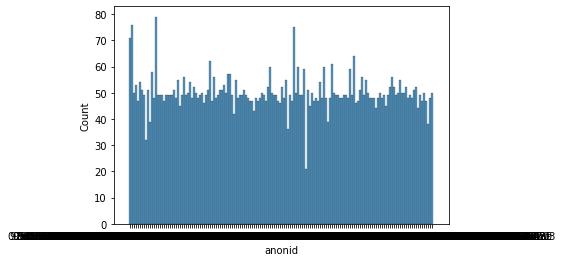

In [214]:
redefine_sp22=redefine_sp22.sort_values(by=['num_submissions'])
sns.histplot(data = redefine_sp22, x = "anonid")
median_submissions_sp22=redefine_sp22["num_submissions"].median()
max_submissions_sp22=redefine_sp22['num_submissions'].max()
mean_submissions_sp22=redefine_sp22['num_submissions'].mean()
print(median_submissions_sp22)
print(max_submissions_sp22)
print(mean_submissions_sp22)

In [215]:
struggles_sp22 = redefine_sp22[redefine_sp22['struggling'] == True] 
print(len(struggles_sp22))
struggles_sp22.head()

2518


,,,num_submissions,struggling
anonid,apt_name,apt_set,,
ccd6338d6ee9d9ab6c89323012b76929b383556e,irvoting,6,3,True
c916a122d3819adb295509f8a54efdb98eadcf8d,calculator,4,3,True
ccd6338d6ee9d9ab6c89323012b76929b383556e,pancakes,3,3,True
29d1cdc2fd1664c3aab8960a4000df82a9bf737e,thesaurus,8,3,True
866cef3a135128a2fba50ab09675afc694227a72,pickyeater,7,3,True


In [216]:
#number total struggles per set
struggles_sp22.groupby(['apt_set']).count()

,num_submissions,struggling
apt_set,,
1,501,501
2,463,463
3,371,371
4,233,233
5,287,287
6,195,195
7,231,231
8,237,237


In [217]:
#number unique struggling students
struggles_sp22.groupby(['anonid']).count()

,num_submissions,struggling
anonid,,
00abe2c72b514703378a9ac4191f314c6284c8d4,16,16
0219d29b99994624e30bc1c6c6a40f4cc7f78577,30,30
039e34d51b30eb570b88c37af04e8d6ec8721c45,19,19
075e08eb6d26f8a2ba5c969dd17141c21f7e9edc,14,14
09a53430e577e831783f28be7b7df0ffc82000d0,19,19
...,...,...
f039d999a1066613860a28b6eb164bb005b8253d,25,25
f5c0767fbc4e3097746e2526c148fd9f5e9bedfa,6,6
f892852e47d7fa6757dea448e5792850f094e055,37,37


In [218]:
by_apt_set_sp22=struggles_sp22.groupby( [ "anonid", "apt_set"]).count()
by_apt_set_sp22 = by_apt_set_sp22[by_apt_set_sp22.columns[~by_apt_set_sp22.columns.isin(['struggling'])]]
by_apt_set_sp22 = by_apt_set_sp22.rename(columns={'num_submissions': 'num_struggles'})
by_apt_set_sp22.head()

num_struggles
anonid                                   apt_set               
00abe2c72b514703378a9ac4191f314c6284c8d4 1                    6
                                         2                    4
                                         3                    1
                                         5                    1
                                         6                    2

In [219]:
num_students_sp22=struggles_sp22.groupby('anonid').count()
num_students_sp22 = num_students_sp22[num_students_sp22.columns[~num_students_sp22.columns.isin(['struggling'])]]
num_students_sp22 = num_students_sp22.rename(columns={'num_submissions': 'num_struggles'})
num_students_sp22 = num_students_sp22.reset_index()
print(len(num_students_sp22))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(num_students_sp22)

152
                                       anonid  num_struggles
0    00abe2c72b514703378a9ac4191f314c6284c8d4             16
1    0219d29b99994624e30bc1c6c6a40f4cc7f78577             30
2    039e34d51b30eb570b88c37af04e8d6ec8721c45             19
3    075e08eb6d26f8a2ba5c969dd17141c21f7e9edc             14
4    09a53430e577e831783f28be7b7df0ffc82000d0             19
5    0b077deac6dad651415e85ce8901ed5675e4e7f3             13
6    0bb7031d27d3e89db7c74dec43da990b5ebac1cc              7
7    0bf6b2e7dd63ba96fc1d498a19973c0018839de2             31
8    0da668a6ec31e12aa9b68fe60144e658c0ad4860             19
9    0e43991ce62031202e0b8e833b611faf62846489             32
10   12a74d6844567af1554dcf7f23e74f40fb0d5dcd             10
11   1331ee02961b7033e5f9e3b4b1dccd01a95174ff             19
12   1474d7363f5582da704cd62f1d1379cb24ad6d38             24
13   17088502e7147552ab8d9be63d05e7dd36dab651             21
14   1b2bc39c51167b261306ec28006f9a2b62491a18             17
15   1d09caf81a761a9

In [220]:
#total_struggling=pd.merge(struggling_students, num_students, on="anonid")
struggling_count_sp22 = struggling_count_sp22.reset_index()
struggling_count_anon_sp22=struggling_count_sp22.iloc[: , :1]
num_students_anon_sp22=num_students_sp22.iloc[: , :1]

#struggling_count_anon.head()
#num_students_anon.head()

total_struggling_sp22 = pd.concat([struggling_count_anon_sp22, num_students_anon_sp22], ignore_index=True)

total_strugglers_sp22=total_struggling_sp22.drop_duplicates()


#total_struggling=pd.merge(struggling_count, num_students, on="anonid")


In [221]:
print(len(total_struggling_sp22))
print(len(total_strugglers_sp22))

266
152


## Sp22 Office Hours

In [222]:
#import dataset
oh_sp22=pd.read_csv('cs101sp22-no-teacher-data-processed.csv')
print(len(oh_sp22))
oh_sp22.head()

460


,MDH Info,MDH Info.1,MDH Info.2,MDH Info.3,MDH Info.4,MDH Info.5,MDH Info.6,studentPrompts,studentPrompts.1,studentPrompts.2,...,studentFeedback.1,studentFeedback.2,studentFeedback.3,studentFeedback.4,studentFeedback.5,studentFeedback.6,studentFeedback.7,studentFeedback.8,studentFeedback.9,MDH Info.7
0,Ticket,Ticket,Ticket,Ticket,Ticket,Ticket,Ticket,What are you working on?,What are you working on?,What are you working on?,...,How did your interaction go?,How did your interaction go?,How did your interaction go?,How did your interaction go?,Please rate your experience in this interaction.,Please rate your experience in this interaction.,Please rate your experience in this interaction.,Please rate your experience in this interaction.,Please note any optional additional feedback y...,Stu/Teach ID
1,ticketId,isFollowup,parentId,requestedAt,startedAt,completedAt,studentLeftFeedback,Assignment 6: Recommender,Exam preparation,Assignment 5: Clever GuessWord,...,I will need more help,I'll be able to finish on my own,I did not make any progress,Technical Difficulties/Not Applicable,4 - Great!,3 - Satisfactory,1 - Much needed improvement,2 - Could use some improvement,freeResponse,anonStudent
2,37361,False,NaN,2022-04-20T01:31:00.574Z,2022-04-20T01:31:12.402Z,2022-04-20T01:49:12.645Z,True,True,False,False,...,False,False,False,False,True,False,False,False,False,d7f94b48fce4c787c7cd34584eafc720dc6fde4b
3,37360,False,NaN,2022-04-20T01:23:45.894Z,2022-04-20T01:24:39.818Z,2022-04-20T01:42:37.370Z,False,True,False,False,...,False,False,False,False,False,False,False,False,False,ba7318c032ed59dce87ed8d211799facf51ded20
4,37359,False,NaN,2022-04-20T01:14:58.416Z,2022-04-20T01:17:07.775Z,2022-04-20T01:23:21.178Z,True,True,False,False,...,True,False,False,False,False,True,False,False,False,ba7318c032ed59dce87ed8d211799facf51ded20


In [223]:
display(oh_sp22.iloc[1])

MDH Info                                                      ticketId
MDH Info.1                                                  isFollowup
MDH Info.2                                                    parentId
MDH Info.3                                                 requestedAt
MDH Info.4                                                   startedAt
MDH Info.5                                                 completedAt
MDH Info.6                                         studentLeftFeedback
studentPrompts                               Assignment 6: Recommender
studentPrompts.1                                      Exam preparation
studentPrompts.2                        Assignment 5: Clever GuessWord
studentPrompts.3                                                 APT 8
studentPrompts.4                                                 APT 6
studentPrompts.5                                                 APT 7
studentPrompts.6                                                 APT 5
studen

In [224]:
office_hours_sp22=oh_sp22.rename(columns=oh_sp22.iloc[1]).drop([0, 1])


In [225]:
office_hours_sp22.head()

,ticketId,isFollowup,parentId,requestedAt,startedAt,completedAt,studentLeftFeedback,Assignment 6: Recommender,Exam preparation,Assignment 5: Clever GuessWord,...,I will need more help,I'll be able to finish on my own,I did not make any progress,Technical Difficulties/Not Applicable,4 - Great!,3 - Satisfactory,1 - Much needed improvement,2 - Could use some improvement,freeResponse,anonStudent
2,37361,False,NaN,2022-04-20T01:31:00.574Z,2022-04-20T01:31:12.402Z,2022-04-20T01:49:12.645Z,True,True,False,False,...,False,False,False,False,True,False,False,False,False,d7f94b48fce4c787c7cd34584eafc720dc6fde4b
3,37360,False,NaN,2022-04-20T01:23:45.894Z,2022-04-20T01:24:39.818Z,2022-04-20T01:42:37.370Z,False,True,False,False,...,False,False,False,False,False,False,False,False,False,ba7318c032ed59dce87ed8d211799facf51ded20
4,37359,False,NaN,2022-04-20T01:14:58.416Z,2022-04-20T01:17:07.775Z,2022-04-20T01:23:21.178Z,True,True,False,False,...,True,False,False,False,False,True,False,False,False,ba7318c032ed59dce87ed8d211799facf51ded20
5,37354,True,37352.0,2022-04-20T00:15:14.887Z,2022-04-20T00:15:57.274Z,2022-04-20T01:07:55.871Z,False,False,False,False,...,False,False,False,False,False,False,False,False,False,b69c39cf0dd6f39e0268980e73d186ddf96e53ff
6,37352,False,NaN,2022-04-20T00:10:00.320Z,2022-04-20T00:13:27.298Z,2022-04-20T00:15:14.887Z,False,True,False,False,...,False,False,False,False,False,False,False,False,False,b69c39cf0dd6f39e0268980e73d186ddf96e53ff


In [226]:
office_hours_sp22.dtypes

ticketId                                                                                         object
isFollowup                                                                                       object
parentId                                                                                         object
requestedAt                                                                                      object
startedAt                                                                                        object
completedAt                                                                                      object
studentLeftFeedback                                                                              object
Assignment 6: Recommender                                                                        object
Exam preparation                                                                                 object
Assignment 5: Clever GuessWord                                  

In [227]:
office_hours_sp22['apt_question'] = pd.np.where(office_hours_sp22[['APT 1', 'APT 2', 'APT 3', 'APT 4', 'APT 5', 'APT 6', 'APT 7', 'APT 8', 'Understanding a past assignment/APT']].eq('True').any(1, skipna=True), True, 
             pd.np.where(office_hours_sp22[['APT 1', 'APT 2', 'APT 3', 'APT 4', 'APT 5', 'APT 6', 'APT 7', 'APT 8', 'Understanding a past assignment/APT']].eq('False').all(1), None, False))

office_hours_sp22.head()
                                           
                                           

,ticketId,isFollowup,parentId,requestedAt,startedAt,completedAt,studentLeftFeedback,Assignment 6: Recommender,Exam preparation,Assignment 5: Clever GuessWord,...,I'll be able to finish on my own,I did not make any progress,Technical Difficulties/Not Applicable,4 - Great!,3 - Satisfactory,1 - Much needed improvement,2 - Could use some improvement,freeResponse,anonStudent,apt_question
2,37361,False,NaN,2022-04-20T01:31:00.574Z,2022-04-20T01:31:12.402Z,2022-04-20T01:49:12.645Z,True,True,False,False,...,False,False,False,True,False,False,False,False,d7f94b48fce4c787c7cd34584eafc720dc6fde4b,None
3,37360,False,NaN,2022-04-20T01:23:45.894Z,2022-04-20T01:24:39.818Z,2022-04-20T01:42:37.370Z,False,True,False,False,...,False,False,False,False,False,False,False,False,ba7318c032ed59dce87ed8d211799facf51ded20,None
4,37359,False,NaN,2022-04-20T01:14:58.416Z,2022-04-20T01:17:07.775Z,2022-04-20T01:23:21.178Z,True,True,False,False,...,False,False,False,False,True,False,False,False,ba7318c032ed59dce87ed8d211799facf51ded20,None
5,37354,True,37352.0,2022-04-20T00:15:14.887Z,2022-04-20T00:15:57.274Z,2022-04-20T01:07:55.871Z,False,False,False,False,...,False,False,False,False,False,False,False,False,b69c39cf0dd6f39e0268980e73d186ddf96e53ff,None
6,37352,False,NaN,2022-04-20T00:10:00.320Z,2022-04-20T00:13:27.298Z,2022-04-20T00:15:14.887Z,False,True,False,False,...,False,False,False,False,False,False,False,False,b69c39cf0dd6f39e0268980e73d186ddf96e53ff,None


In [228]:
office_hour_sp22 = office_hours_sp22[office_hours_sp22['apt_question'] == True] 
office_hour_sp22.head()

,ticketId,isFollowup,parentId,requestedAt,startedAt,completedAt,studentLeftFeedback,Assignment 6: Recommender,Exam preparation,Assignment 5: Clever GuessWord,...,I'll be able to finish on my own,I did not make any progress,Technical Difficulties/Not Applicable,4 - Great!,3 - Satisfactory,1 - Much needed improvement,2 - Could use some improvement,freeResponse,anonStudent,apt_question
10,37170,False,NaN,2022-04-18T23:43:14.621Z,2022-04-18T23:45:30.063Z,2022-04-18T23:57:09.838Z,True,False,True,False,...,False,False,False,True,False,False,False,False,898bded048b6076fa9f7800267f553b9c1fe7e39,True
15,36968,False,NaN,2022-04-18T01:08:07.227Z,2022-04-18T01:31:41.925Z,2022-04-18T01:40:06.133Z,True,False,False,False,...,False,False,False,False,True,False,False,False,76c64b194dbcb0afd87f3f41684e8cfd803a83d9,True
18,36845,False,NaN,2022-04-15T00:28:49.492Z,2022-04-15T00:51:09.677Z,2022-04-15T01:12:37.439Z,True,False,False,False,...,False,True,False,False,True,False,False,False,212fcdf501ff5534d849cc08403575c726ad72da,True
19,36841,True,34323.0,2022-04-14T23:41:33.561Z,2022-04-15T00:43:50.230Z,2022-04-15T00:45:00.079Z,False,False,False,False,...,False,False,False,False,False,False,False,False,227632fa7669ced6a445e02a0f0f73edd0dd205f,True
20,36840,False,NaN,2022-04-14T23:41:16.109Z,2022-04-15T00:36:42.570Z,2022-04-15T00:52:42.619Z,True,False,False,False,...,False,False,False,True,False,False,False,False,a98d7e1a952c7adcd7d865684f7907f939d9031d,True


In [229]:
apt_oh_sp22 = office_hour_sp22[['anonStudent', 'requestedAt', 'startedAt','completedAt','APT 1', 'APT 2', 'APT 3', 'APT 4', 'APT 5', 'APT 6', 'APT 7', 'APT 8', 'Understanding a past assignment/APT', 'I will need more help']]
print(len(apt_oh_sp22))
apt_oh_sp22.head()

136


,anonStudent,requestedAt,startedAt,completedAt,APT 1,APT 2,APT 3,APT 4,APT 5,APT 6,APT 7,APT 8,Understanding a past assignment/APT,I will need more help
10,898bded048b6076fa9f7800267f553b9c1fe7e39,2022-04-18T23:43:14.621Z,2022-04-18T23:45:30.063Z,2022-04-18T23:57:09.838Z,False,False,False,False,False,False,False,False,True,False
15,76c64b194dbcb0afd87f3f41684e8cfd803a83d9,2022-04-18T01:08:07.227Z,2022-04-18T01:31:41.925Z,2022-04-18T01:40:06.133Z,False,False,False,False,False,False,False,True,False,True
18,212fcdf501ff5534d849cc08403575c726ad72da,2022-04-15T00:28:49.492Z,2022-04-15T00:51:09.677Z,2022-04-15T01:12:37.439Z,False,False,False,False,False,False,False,True,False,False
19,227632fa7669ced6a445e02a0f0f73edd0dd205f,2022-04-14T23:41:33.561Z,2022-04-15T00:43:50.230Z,2022-04-15T00:45:00.079Z,False,False,False,False,False,False,False,True,False,False
20,a98d7e1a952c7adcd7d865684f7907f939d9031d,2022-04-14T23:41:16.109Z,2022-04-15T00:36:42.570Z,2022-04-15T00:52:42.619Z,False,False,False,False,False,False,False,True,False,False


In [230]:
apt_oh_sp22.loc[apt_oh_sp22.anonStudent == '898bded048b6076fa9f7800267f553b9c1fe7e39', 'set'] = 'x'

for ind in apt_oh_sp22.index:
    if apt_oh_sp22['APT 1'][ind]=="True":
        apt_oh_sp22['set'][ind]="1"
    if apt_oh_sp22['APT 2'][ind]=="True":
        apt_oh_sp22['set'][ind]="2"
    if apt_oh_sp22['APT 3'][ind]=="True":
        apt_oh_sp22['set'][ind]="3"
    if apt_oh_sp22['APT 4'][ind]=="True":
        apt_oh_sp22['set'][ind]="4"
    if apt_oh_sp22['APT 5'][ind]=="True":
        apt_oh_sp22['set'][ind]="5"
    if apt_oh_sp22['APT 6'][ind]=="True":
        apt_oh_sp22['set'][ind]="6"
    if apt_oh_sp22['APT 7'][ind]=="True":
        apt_oh_sp22['set'][ind]="7"
    if apt_oh_sp22['APT 8'][ind]=="True":
        apt_oh_sp22['set'][ind]="8"
    else:
        apt_oh_sp22['set'][ind]="0"
  
apt_oh_sp22 = apt_oh_sp22.rename(columns={'set': 'apt_set'})    
apt_oh_sp22.head()

/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,anonStudent,requestedAt,startedAt,completedAt,APT 1,APT 2,APT 3,APT 4,APT 5,APT 6,APT 7,APT 8,Understanding a past assignment/APT,I will need more help,apt_set
10,898bded048b6076fa9f7800267f553b9c1fe7e39,2022-04-18T23:43:14.621Z,2022-04-18T23:45:30.063Z,2022-04-18T23:57:09.838Z,False,False,False,False,False,False,False,False,True,False,0
15,76c64b194dbcb0afd87f3f41684e8cfd803a83d9,2022-04-18T01:08:07.227Z,2022-04-18T01:31:41.925Z,2022-04-18T01:40:06.133Z,False,False,False,False,False,False,False,True,False,True,8
18,212fcdf501ff5534d849cc08403575c726ad72da,2022-04-15T00:28:49.492Z,2022-04-15T00:51:09.677Z,2022-04-15T01:12:37.439Z,False,False,False,False,False,False,False,True,False,False,8
19,227632fa7669ced6a445e02a0f0f73edd0dd205f,2022-04-14T23:41:33.561Z,2022-04-15T00:43:50.230Z,2022-04-15T00:45:00.079Z,False,False,False,False,False,False,False,True,False,False,8
20,a98d7e1a952c7adcd7d865684f7907f939d9031d,2022-04-14T23:41:16.109Z,2022-04-15T00:36:42.570Z,2022-04-15T00:52:42.619Z,False,False,False,False,False,False,False,True,False,False,8


In [231]:
num_oh_students_sp22 = apt_oh_sp22.groupby(['anonStudent']).count()
num_oh_students_sp22 = num_oh_students_sp22.sort_values(by='requestedAt', ascending=False)
med_visits_sp22=num_oh_students_sp22["requestedAt"].median()
mean_visits_sp22=num_oh_students_sp22["requestedAt"].mean()
num_oh_students_sp22 = num_oh_students_sp22['requestedAt']
print(len(num_oh_students_sp22))
print(med_visits_sp22)
print(mean_visits_sp22)
num_oh_students_sp22

41
2.0
3.317073170731707


anonStudent
3b3118782fee21f474489931e3dd8189a84d1898    12
898bded048b6076fa9f7800267f553b9c1fe7e39    11
a98d7e1a952c7adcd7d865684f7907f939d9031d    11
312523be582de067dfba618c327a1408ce9c155d    11
d6061aa29f3d69e61a0f645e9012d7957c408a39    10
3fb003e5dabd788c154ba4803a7cf9a944478061     8
57ef158f7dd81af0680eb0367960a2af0c64fed8     8
212fcdf501ff5534d849cc08403575c726ad72da     4
da4e9189e54be4816ddf10c2c55ef26f7a7f2da7     4
39056b9c34a286324d803c6ec11cdae3af4cfca7     4
b69c39cf0dd6f39e0268980e73d186ddf96e53ff     4
6b9b93c21ada7ac62a20bdeb4872831fd76d74d1     3
a98f77361f1d370a7372c8912006d375040d3653     3
6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016     3
5a055552d299b915b90515635e45a5ed9459d561     3
efec57a88c32d348d371ccfbc4336ae396603467     3
e38145b2fd454a2c67ad5844c551f0d3ef20bb6f     3
a543c03b544a8ebefe7f9998afeb9497c0334818     2
b835c8ea2e731a959acddf989e0daf930b68068b     2
ba7318c032ed59dce87ed8d211799facf51ded20     2
0219d29b99994624e30bc1c6c6a40f4cc7f78577     2
d

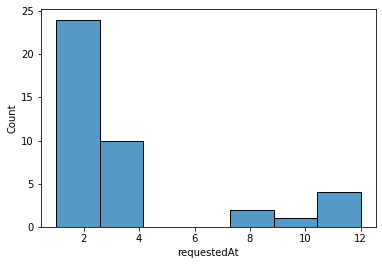

In [232]:
sns.histplot(data = num_oh_students_sp22)

In [233]:
apt1_sp22 = apt_oh_sp22.groupby(['APT 1']).count()
apt2_sp22 = apt_oh_sp22.groupby(['APT 2']).count()
apt3_sp22 = apt_oh_sp22.groupby(['APT 3']).count()
apt4_sp22 = apt_oh_sp22.groupby(['APT 4']).count()
apt5_sp22 = apt_oh_sp22.groupby(['APT 5']).count()
apt6_sp22 = apt_oh_sp22.groupby(['APT 6']).count()
apt7_sp22 = apt_oh_sp22.groupby(['APT 7']).count()
apt8_sp22 = apt_oh_sp22.groupby(['APT 8']).count()

print('APT 1 has '+ apt1_sp22.iloc[1][True].astype(str)+ ' students')
print('APT 2 has '+ apt2_sp22.iloc[1][True].astype(str)+ ' students')
print('APT 3 has '+ apt3_sp22.iloc[1][True].astype(str)+ ' students')
print('APT 4 has '+ apt4_sp22.iloc[1][True].astype(str)+ ' students')
print('APT 5 has '+ apt5_sp22.iloc[1][True].astype(str)+ ' students')
print('APT 6 has '+ apt6_sp22.iloc[1][True].astype(str)+ ' students')
print('APT 7 has '+ apt7_sp22.iloc[1][True].astype(str)+ ' students')
print('APT 8 has '+ apt8_sp22.iloc[1][True].astype(str)+ ' students')


APT 1 has 17 students
APT 2 has 17 students
APT 3 has 17 students
APT 4 has 15 students
APT 5 has 16 students
APT 6 has 9 students
APT 7 has 8 students
APT 8 has 8 students


In [234]:
oh_students_sp22 = pd.DataFrame()
oh_students_sp22['oh_students']=apt_oh_sp22['anonStudent']
apt_students_sp22 = pd.DataFrame()
apt_students_sp22['apt_students']=struggling_students_sp22['anonid']
apt_students_sp22.head()
print(len(apt_students_sp22))

307


## Sp20 Combining OH and APT

In [235]:
nos_sp22=num_oh_students_sp22.to_frame(name = 'count').reset_index()
ns_sp22=num_students_sp22.rename(columns = {"anonid":"anonStudent"})
ns_sp22.head()

frames_sp22 = [nos_sp22, ns_sp22]

result3_sp22 = pd.concat(frames_sp22).reset_index()
result3_sp22.head()
print(len(result3_sp22))
print('41 total OH Students, 152 struggling students, 193 combined')
print(len(result3_sp22['anonStudent'])-len(result3_sp22['anonStudent'].drop_duplicates()))
#result3.dtypes


193
41 total OH Students, 152 struggling students, 193 combined
41


/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [236]:
overlap_sp22=0
for student in ns_sp22['anonStudent']:
    for s in nos_sp22['anonStudent']:
        if student==s:
            overlap_sp22+=1
print(overlap_sp22)
print('of struggling students visited OH')
print(' ')
print('Every student who visited office hours for an APT was struggling. Of the struggling students, ~33% of them visited Office Hours.')
print(' ')
print('This shows that number of APT submissions is a good indicator of OH attendance for students')

41
of struggling students visited OH
 
Every student who visited office hours for an APT was struggling. Of the struggling students, ~33% of them visited Office Hours.
 
This shows that number of APT submissions is a good indicator of OH attendance for students


In [237]:
df_sp22 = df_sp22.assign(result=df_sp22['anonid'].isin(num_students_sp22['anonid']).astype(bool))
df_sp22.head()

,anonid,timestamp,apt_name,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other,result
0,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 13:54:03+00:00,totalafter,1.00000,1,sp22,"string methods, string concepts, for loops",summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN,True
1,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:05:14+00:00,changephrase,1.00000,1,sp22,"if statements, string methods, string concepts",summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN,True
2,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:09:46+00:00,costgroceries,0.75000,1,sp22,math,summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN,True
3,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:10:06+00:00,costgroceries,1.00000,1,sp22,math,summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN,True
4,a3c18125d9a6c24261e5a064854f24d58a7fc377,2022-02-24 14:50:35+00:00,repeatinorder,0.12821,1,sp22,string methods,summative,NaN,2022-02-24 00:00:00-05:00,2022-02-27 23:30:59-05:00,2022-02-27 23:30:59-05:00,1.0,NaN,NaN,True


In [238]:
df_sp22.groupby(['result']).count()

,anonid,timestamp,apt_name,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other
result,,,,,,,,,,,,,,,
True,21805,21805,21805,19584,21805,21805,21805,21805,0,21184,21184,21184,9126,6555,5605


In [239]:
anonids_sp22=df_sp22.groupby(['anonid']).count()
print(len(anonids_sp22))

152


In [240]:
apt_oh_sp22=apt_oh_sp22.rename(columns={'anonStudent': 'anonid'})
apt_oh_sp22.dtypes

anonid                                 object
requestedAt                            object
startedAt                              object
completedAt                            object
APT 1                                  object
APT 2                                  object
APT 3                                  object
APT 4                                  object
APT 5                                  object
APT 6                                  object
APT 7                                  object
APT 8                                  object
Understanding a past assignment/APT    object
I will need more help                  object
apt_set                                object
dtype: object

In [241]:
mergedf_sp22=pd.merge(df_sp22, apt_oh_sp22, on=['anonid'])
print(len(mergedf_sp22))
mergedf_sp22.head()

21299


,anonid,timestamp,apt_name,score,apt_set_x,semester,concept,type,mapping,assign_date,...,APT 2,APT 3,APT 4,APT 5,APT 6,APT 7,APT 8,Understanding a past assignment/APT,I will need more help,apt_set_y
0,eb0874cd3870057d94d8cfbe321b856a36614809,2022-02-24 16:10:52+00:00,totalafter,0.0,1,sp22,"string methods, string concepts, for loops",summative,NaN,2022-02-24 00:00:00-05:00,...,False,False,False,False,False,False,False,True,False,0
1,eb0874cd3870057d94d8cfbe321b856a36614809,2022-02-24 16:11:11+00:00,totalafter,0.0,1,sp22,"string methods, string concepts, for loops",summative,NaN,2022-02-24 00:00:00-05:00,...,False,False,False,False,False,False,False,True,False,0
2,eb0874cd3870057d94d8cfbe321b856a36614809,2022-02-24 16:12:30+00:00,totalafter,0.0,1,sp22,"string methods, string concepts, for loops",summative,NaN,2022-02-24 00:00:00-05:00,...,False,False,False,False,False,False,False,True,False,0
3,eb0874cd3870057d94d8cfbe321b856a36614809,2022-02-24 16:13:15+00:00,totalafter,0.0,1,sp22,"string methods, string concepts, for loops",summative,NaN,2022-02-24 00:00:00-05:00,...,False,False,False,False,False,False,False,True,False,0
4,eb0874cd3870057d94d8cfbe321b856a36614809,2022-02-24 16:13:27+00:00,totalafter,0.0,1,sp22,"string methods, string concepts, for loops",summative,NaN,2022-02-24 00:00:00-05:00,...,False,False,False,False,False,False,False,True,False,0


In [242]:
mergedf_sp22=mergedf_sp22.loc[mergedf_sp22['score'] == 1]
print(len(mergedf_sp22))
mergedf_sp22.head()

6900


,anonid,timestamp,apt_name,score,apt_set_x,semester,concept,type,mapping,assign_date,...,APT 2,APT 3,APT 4,APT 5,APT 6,APT 7,APT 8,Understanding a past assignment/APT,I will need more help,apt_set_y
9,eb0874cd3870057d94d8cfbe321b856a36614809,2022-02-24 16:15:13+00:00,totalafter,1.0,1,sp22,"string methods, string concepts, for loops",summative,NaN,2022-02-24 00:00:00-05:00,...,False,False,False,False,False,False,False,True,False,0
14,eb0874cd3870057d94d8cfbe321b856a36614809,2022-02-24 16:45:21+00:00,changephrase,1.0,1,sp22,"if statements, string methods, string concepts",summative,NaN,2022-02-24 00:00:00-05:00,...,False,False,False,False,False,False,False,True,False,0
16,eb0874cd3870057d94d8cfbe321b856a36614809,2022-02-24 17:06:39+00:00,costgroceries,1.0,1,sp22,math,summative,NaN,2022-02-24 00:00:00-05:00,...,False,False,False,False,False,False,False,True,False,0
23,eb0874cd3870057d94d8cfbe321b856a36614809,2022-04-09 17:35:42+00:00,phraseindex,1.0,2,sp22,"string methods, string concepts, for loops, if...",summative,NaN,2022-04-07 00:00:00-04:00,...,False,False,False,False,False,False,False,True,False,0
24,eb0874cd3870057d94d8cfbe321b856a36614809,2022-04-09 18:02:18+00:00,numbercount,1.0,2,sp22,"list methods, math",summative,NaN,2022-04-07 00:00:00-04:00,...,False,False,False,False,False,False,False,True,False,0


In [243]:
mergedf_sp22['startedAt'] = pd.to_datetime(mergedf_sp22.startedAt).dt.tz_convert('utc')


In [244]:
mergedf_sp22['requestedAt'] = pd.to_datetime(mergedf_sp22.requestedAt).dt.tz_convert('utc')


In [245]:
mergedf_sp22['completedAt'] = pd.to_datetime(mergedf_sp22.completedAt).dt.tz_convert('utc')


In [246]:
mergedf_sp22.dtypes

anonid                                                     object
timestamp                                     datetime64[ns, UTC]
apt_name                                                   object
score                                                     float64
apt_set_x                                                  object
semester                                                   object
concept                                                    object
type                                                       object
mapping                                                    object
assign_date                            datetime64[ns, US/Eastern]
due_date                               datetime64[ns, US/Eastern]
late_due                               datetime64[ns, US/Eastern]
required                                                  float64
notes                                                      object
other                                                      object
result    

In [247]:
duringoh_sp22=mergedf_sp22[(mergedf_sp22['timestamp'] >= mergedf_sp22['startedAt'])& (mergedf_sp22['timestamp'] <= mergedf_sp22['completedAt'])]
print(len(duringoh_sp22))

49


In [248]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(duringoh_sp22)

                                         anonid                 timestamp  \
565    312523be582de067dfba618c327a1408ce9c155d 2022-01-18 00:23:06+00:00   
2865   0da668a6ec31e12aa9b68fe60144e658c0ad4860 2022-04-07 00:03:28+00:00   
3410   7cf9e3ed34ecd6a70d9810d9987b61e8763eea0a 2022-04-14 23:57:53+00:00   
3411   7cf9e3ed34ecd6a70d9810d9987b61e8763eea0a 2022-04-15 00:07:50+00:00   
4258   744e14b91b0eeabed5d32b81fa286356e6e3e749 2022-03-21 00:14:12+00:00   
4261   744e14b91b0eeabed5d32b81fa286356e6e3e749 2022-03-21 00:27:59+00:00   
5117   d6061aa29f3d69e61a0f645e9012d7957c408a39 2022-02-10 01:50:30+00:00   
5127   d6061aa29f3d69e61a0f645e9012d7957c408a39 2022-02-10 02:12:53+00:00   
5186   d6061aa29f3d69e61a0f645e9012d7957c408a39 2022-02-18 00:24:00+00:00   
5215   d6061aa29f3d69e61a0f645e9012d7957c408a39 2022-02-18 03:22:38+00:00   
5225   d6061aa29f3d69e61a0f645e9012d7957c408a39 2022-02-18 03:27:51+00:00   
5275   d6061aa29f3d69e61a0f645e9012d7957c408a39 2022-02-18 04:05:59+00:00   

In [249]:
duringoh_sp22.groupby(['anonid']).count().sort_values(by='apt_name', ascending=False)


,timestamp,apt_name,score,apt_set_x,semester,concept,type,mapping,assign_date,due_date,...,APT 2,APT 3,APT 4,APT 5,APT 6,APT 7,APT 8,Understanding a past assignment/APT,I will need more help,apt_set_y
anonid,,,,,,,,,,,,,,,,,,,,,
d6061aa29f3d69e61a0f645e9012d7957c408a39,7,7,7,7,7,7,7,0,7,7,...,7,7,7,7,7,7,7,7,7,7
3fb003e5dabd788c154ba4803a7cf9a944478061,6,6,6,6,6,6,6,0,6,6,...,6,6,6,6,6,6,6,6,6,6
6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016,5,5,5,5,5,5,5,0,5,5,...,5,5,5,5,5,5,5,5,5,5
a98d7e1a952c7adcd7d865684f7907f939d9031d,5,5,5,5,5,5,5,0,5,5,...,5,5,5,5,5,5,5,5,5,5
3b3118782fee21f474489931e3dd8189a84d1898,4,4,4,4,4,4,4,0,4,4,...,4,4,4,4,4,4,4,4,4,4
a98f77361f1d370a7372c8912006d375040d3653,3,3,3,3,3,3,3,0,3,3,...,3,3,3,3,3,3,3,3,3,3
a02b28902ac8243a92e93a9e9cb68f35b668887d,3,3,3,3,3,3,3,0,3,3,...,3,3,3,3,3,3,3,3,3,3
744e14b91b0eeabed5d32b81fa286356e6e3e749,2,2,2,2,2,2,2,0,2,2,...,2,2,2,2,2,2,2,2,2,2
efec57a88c32d348d371ccfbc4336ae396603467,2,2,2,2,2,2,2,0,2,2,...,2,2,2,2,2,2,2,2,2,2


In [250]:
strugglemerge_sp22=pd.merge(struggles_sp22, df_sp22, on=['anonid', 'apt_name'])
strugglemerge_sp22.head()

,anonid,apt_name,num_submissions,struggling,timestamp,score,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other,result
0,ccd6338d6ee9d9ab6c89323012b76929b383556e,irvoting,3,True,2022-03-29 04:37:03+00:00,0.8,6,sp22,"for loops, string methods, dictionary, list co...",formative,NaN,2022-03-24 00:00:00-04:00,2022-03-31 23:30:59-04:00,2022-04-01 23:30:59-04:00,NaN,NaN,NaN,True
1,ccd6338d6ee9d9ab6c89323012b76929b383556e,irvoting,3,True,2022-03-29 04:40:00+00:00,0.9,6,sp22,"for loops, string methods, dictionary, list co...",formative,NaN,2022-03-24 00:00:00-04:00,2022-03-31 23:30:59-04:00,2022-04-01 23:30:59-04:00,NaN,NaN,NaN,True
2,ccd6338d6ee9d9ab6c89323012b76929b383556e,irvoting,3,True,2022-03-29 04:42:15+00:00,1.0,6,sp22,"for loops, string methods, dictionary, list co...",formative,NaN,2022-03-24 00:00:00-04:00,2022-03-31 23:30:59-04:00,2022-04-01 23:30:59-04:00,NaN,NaN,NaN,True
3,c916a122d3819adb295509f8a54efdb98eadcf8d,calculator,3,True,2022-02-23 19:27:01+00:00,0.8,4,sp22,"while loops, string concepts, if statement",formative,NaN,2022-02-24 00:00:00-05:00,2022-03-03 23:30:59-05:00,2022-03-04 23:30:59-05:00,NaN,NaN,NaN,True
4,c916a122d3819adb295509f8a54efdb98eadcf8d,calculator,3,True,2022-02-23 19:32:17+00:00,0.7,4,sp22,"while loops, string concepts, if statement",formative,NaN,2022-02-24 00:00:00-05:00,2022-03-03 23:30:59-05:00,2022-03-04 23:30:59-05:00,NaN,NaN,NaN,True


In [251]:
struggleoh_sp22=pd.merge(strugglemerge_sp22, apt_oh_sp22, on=['anonid'])
struggleoh_sp22.head()

,anonid,apt_name,num_submissions,struggling,timestamp,score,apt_set_x,semester,concept,type,...,APT 2,APT 3,APT 4,APT 5,APT 6,APT 7,APT 8,Understanding a past assignment/APT,I will need more help,apt_set_y
0,8487791ce4113e729d40afb3c92daa0530863176,txtmsg,3,True,2022-03-04 01:35:50+00:00,0.00990,4,sp22,"for loops, string concatenation, string method...",formative,...,False,False,True,False,False,False,False,False,False,0
1,8487791ce4113e729d40afb3c92daa0530863176,txtmsg,3,True,2022-03-04 01:38:27+00:00,0.14851,4,sp22,"for loops, string concatenation, string method...",formative,...,False,False,True,False,False,False,False,False,False,0
2,8487791ce4113e729d40afb3c92daa0530863176,txtmsg,3,True,2022-03-04 01:48:33+00:00,1.00000,4,sp22,"for loops, string concatenation, string method...",formative,...,False,False,True,False,False,False,False,False,False,0
3,8487791ce4113e729d40afb3c92daa0530863176,sortbyfreqs,3,True,2022-04-01 19:31:45+00:00,0.00000,6,sp22,"sort, dictionary",formative,...,False,False,True,False,False,False,False,False,False,0
4,8487791ce4113e729d40afb3c92daa0530863176,sortbyfreqs,3,True,2022-04-01 19:32:34+00:00,0.00000,6,sp22,"sort, dictionary",formative,...,False,False,True,False,False,False,False,False,False,0


In [252]:
struggleoh_sp22['startedAt'] = pd.to_datetime(struggleoh_sp22.startedAt).dt.tz_convert('utc')
struggleoh_sp22['requestedAt'] = pd.to_datetime(struggleoh_sp22.requestedAt).dt.tz_convert('utc')
struggleoh_sp22['completedAt'] = pd.to_datetime(struggleoh_sp22.completedAt).dt.tz_convert('utc')

In [253]:
struggleduringoh_sp22=struggleoh_sp22[(struggleoh_sp22['timestamp'] >= struggleoh_sp22['startedAt'])& (struggleoh_sp22['timestamp'] <= struggleoh_sp22['completedAt'])]
print(len(struggleduringoh_sp22))


118


In [254]:
#median score of submissions in total
struggleoh_sp22['score'].median()

0.42857

In [255]:
#median score of submissions that occur during OH
struggleduringoh_sp22['score'].median()

0.7058800000000001

In [256]:
#mean score of submissions that occur during OH
struggleduringoh_sp22['score'].mean()

0.5684032380952382

In [257]:
#median number of submissions of someone who goes to office hours and submits an APT during the OH time frame
struggleduringoh_sp22['num_submissions'].median()

7.0

In [258]:
#median number of submissions for someone that goes to office hours
struggleoh_sp22['num_submissions'].median()

7.0

In [259]:
#only include submissions with a perfect score
strugglepass_sp22=struggleduringoh_sp22.loc[struggleduringoh_sp22['score'] == 1]
print(len(strugglepass_sp22))

32


In [260]:
#all rows for APT submissions of 1 that occurre during an OH session
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(strugglepass_sp22)

                                         anonid          apt_name  \
625    efec57a88c32d348d371ccfbc4336ae396603467        calculator   
1367   744e14b91b0eeabed5d32b81fa286356e6e3e749          networth   
2284   6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016         bagfitter   
2353   6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016          networth   
2419   6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016            family   
2428   6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016       sandwichbar   
2434   6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016       sandwichbar   
3463   d6061aa29f3d69e61a0f645e9012d7957c408a39     lastnamefirst   
3672   d6061aa29f3d69e61a0f645e9012d7957c408a39         emphasize   
4514   d6061aa29f3d69e61a0f645e9012d7957c408a39      readingscore   
5001   a98f77361f1d370a7372c8912006d375040d3653       portmanteau   
5058   a98f77361f1d370a7372c8912006d375040d3653      readingscore   
5107   a98f77361f1d370a7372c8912006d375040d3653          pancakes   
6237   3b3118782fee21f474489931e3d

In [261]:
#number of pass submissions during OH per student
strugglepass_sp22.groupby(['anonid']).count().sort_values(by='apt_name', ascending=False)


,apt_name,num_submissions,struggling,timestamp,score,apt_set_x,semester,concept,type,mapping,...,APT 2,APT 3,APT 4,APT 5,APT 6,APT 7,APT 8,Understanding a past assignment/APT,I will need more help,apt_set_y
anonid,,,,,,,,,,,,,,,,,,,,,
6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016,5,5,5,5,5,5,5,5,5,0,...,5,5,5,5,5,5,5,5,5,5
3b3118782fee21f474489931e3dd8189a84d1898,4,4,4,4,4,4,4,4,4,0,...,4,4,4,4,4,4,4,4,4,4
a98d7e1a952c7adcd7d865684f7907f939d9031d,4,4,4,4,4,4,4,4,4,0,...,4,4,4,4,4,4,4,4,4,4
a98f77361f1d370a7372c8912006d375040d3653,3,3,3,3,3,3,3,3,3,0,...,3,3,3,3,3,3,3,3,3,3
d6061aa29f3d69e61a0f645e9012d7957c408a39,3,3,3,3,3,3,3,3,3,0,...,3,3,3,3,3,3,3,3,3,3
212fcdf501ff5534d849cc08403575c726ad72da,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
3fb003e5dabd788c154ba4803a7cf9a944478061,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
57ef158f7dd81af0680eb0367960a2af0c64fed8,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
312523be582de067dfba618c327a1408ce9c155d,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [262]:
#number of submissions of individual APTs during OH (median=1)
strugglepass_sp22.groupby(['anonid', 'apt_name']).count()

num_submissions  \
anonid                                   apt_name                            
212fcdf501ff5534d849cc08403575c726ad72da interestingparty                1   
                                         medaltable                      1   
312523be582de067dfba618c327a1408ce9c155d laundry                         1   
39056b9c34a286324d803c6ec11cdae3af4cfca7 txtmsg                          1   
3b3118782fee21f474489931e3dd8189a84d1898 emphasize                       1   
                                         pancakes                        1   
                                         pikachu                         1   
                                         totalweight                     1   
3fb003e5dabd788c154ba4803a7cf9a944478061 lastnamefirst                   1   
                                         pancakes                        1   
57ef158f7dd81af0680eb0367960a2af0c64fed8 txtmsg                          1   
                                         yahtzee                         1   
6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016 bagfitter                       1   
                                         family                          1   
                                         networth                        1   
                                         sandwichbar                     2   
744e14b91b0eeabed5d32b81fa286356e6e3e749 networth                        1   
a02b28902ac8243a92e93a9e9cb68f35b668887d acronym                         1   
a98d7e1a952c7adcd7d865684f7907f939d9031d common                          1   
                                         medaltable                      1   
                                         positiveid                      1   
                                         voterigging                     1   
a98f77361f1d370a7372c8912006d375040d3653 pancakes                        1   
                                         portmanteau                     1   
                                         readingscore                    1   
ba7318c032ed59dce87ed8d211799facf51ded20 sortbyfreqs                     1   
d6061aa29f3d69e61a0f645e9012d7957c408a39 emphasize                       1   
                                         lastnamefirst                   1   
                                         readingscore                    1   
efec57a88c32d348d371ccfbc4336ae396603467 calculator                      1   
f892852e47d7fa6757dea448e5792850f094e055 lastnamefirst                   1   

                                                           struggling  \
anonid                                   apt_name                       
212fcdf501ff5534d849cc08403575c726ad72da interestingparty           1   
                                         medaltable                 1   
312523be582de067dfba618c327a1408ce9c155d laundry                    1   
39056b9c34a286324d803c6ec11cdae3af4cfca7 txtmsg                     1   
3b3118782fee21f474489931e3dd8189a84d1898 emphasize                  1   
                                         pancakes                   1   
                                         pikachu                    1   
                                         totalweight                1   
3fb003e5dabd788c154ba4803a7cf9a944478061 lastnamefirst              1   
                                         pancakes                   1   
57ef158f7dd81af0680eb0367960a2af0c64fed8 txtmsg                     1   
                                         yahtzee                    1   
6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016 bagfitter                  1   
                                         family                     1   
                                         networth                   1   
                                         sandwichbar                2   
744e14b91b0eeabed5d32b81fa286356e6e3e749 networth                   1   
a02b28902ac8243a92e93a9e9cb68f35b668887d acronym                    1   
a98d7e1a952c7adcd7d86568

In [263]:
#number successful APT submissions during OH per APT
strugglepass_sp22.groupby(['apt_name']).count().sort_values(by='anonid', ascending=False)


,anonid,num_submissions,struggling,timestamp,score,apt_set_x,semester,concept,type,mapping,...,APT 2,APT 3,APT 4,APT 5,APT 6,APT 7,APT 8,Understanding a past assignment/APT,I will need more help,apt_set_y
apt_name,,,,,,,,,,,,,,,,,,,,,
pancakes,3,3,3,3,3,3,3,3,3,0,...,3,3,3,3,3,3,3,3,3,3
lastnamefirst,3,3,3,3,3,3,3,3,3,0,...,3,3,3,3,3,3,3,3,3,3
txtmsg,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
emphasize,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
sandwichbar,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
medaltable,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
networth,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
readingscore,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
portmanteau,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [264]:
#number successful APT submissions during OH per set
strugglepass_sp22.groupby(['apt_set_x']).count().sort_values(by='anonid', ascending=False)


,anonid,apt_name,num_submissions,struggling,timestamp,score,semester,concept,type,mapping,...,APT 2,APT 3,APT 4,APT 5,APT 6,APT 7,APT 8,Understanding a past assignment/APT,I will need more help,apt_set_y
apt_set_x,,,,,,,,,,,,,,,,,,,,,
3,9,9,9,9,9,9,9,9,9,0,...,9,9,9,9,9,9,9,9,9,9
5,7,7,7,7,7,7,7,7,7,0,...,7,7,7,7,7,7,7,7,7,7
4,5,5,5,5,5,5,5,5,5,0,...,5,5,5,5,5,5,5,5,5,5
2,4,4,4,4,4,4,4,4,4,0,...,4,4,4,4,4,4,4,4,4,4
7,3,3,3,3,3,3,3,3,3,0,...,3,3,3,3,3,3,3,3,3,3
8,2,2,2,2,2,2,2,2,2,0,...,2,2,2,2,2,2,2,2,2,2
1,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [265]:
#total struggles per APT
struggles_sp22.groupby(['apt_name']).count().sort_values(by='struggling', ascending=False)


,num_submissions,struggling
apt_name,,
repeatinorder,106,106
gravity,102,102
emphasize,97,97
pancakes,92,92
networth,83,83
...,...,...
datalinkingcount,2,2
popularending,2,2
rebuildphrase,1,1


In [266]:
#total apt set struggles
struggles_sp22.groupby(['apt_set']).count().sort_values(by='struggling', ascending=False)


,num_submissions,struggling
apt_set,,
1,501,501
2,463,463
3,371,371
5,287,287
8,237,237
4,233,233
7,231,231
6,195,195


In [267]:
nopass_sp22=struggleduringoh_sp22.groupby( [ "anonid", "apt_name", "apt_set_x", "completedAt"])['score'].max().to_frame(name = 'max_score').reset_index()
nopass_sp22.head()
print(len(nopass_sp22))

40


In [268]:
nopass_sp22['not_pass'] = nopass_sp22['max_score']<1.00000

In [269]:
nopass_sp22=nopass_sp22.loc[nopass_sp22['not_pass'] == True]
print(len(nopass_sp22))

9


In [270]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(nopass_sp22)

                                      anonid       apt_name  apt_set_x  \
2   212fcdf501ff5534d849cc08403575c726ad72da         moving          8   
4   39056b9c34a286324d803c6ec11cdae3af4cfca7         family          5   
7   3b3118782fee21f474489931e3dd8189a84d1898       pancakes          3   
18  6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016    sandwichbar          5   
22  a02b28902ac8243a92e93a9e9cb68f35b668887d  lastnamefirst          3   
30  ba7318c032ed59dce87ed8d211799facf51ded20       pancakes          3   
35  d7f94b48fce4c787c7cd34584eafc720dc6fde4b     medaltable          7   
36  da4e9189e54be4816ddf10c2c55ef26f7a7f2da7         txtmsg          4   
37  da4e9189e54be4816ddf10c2c55ef26f7a7f2da7         txtmsg          4   

                        completedAt  max_score  not_pass  
2  2022-04-15 01:12:37.439000+00:00    0.90000      True  
4  2022-03-21 01:09:36.817000+00:00    0.27273      True  
7  2022-02-18 00:47:57.894000+00:00    0.64706      True  
18 2022-03-25 01:10:48.

In [271]:
ohfail_sp22=pd.merge(nopass_sp22, df_sp22, on=['anonid', 'apt_name'])
ohfail_sp22.head()
print(len(ohfail_sp22))

153


In [272]:
ohfail_sp22['difference']=ohfail_sp22['timestamp']-ohfail_sp22['completedAt']
ohfail_sp22.head()

,anonid,apt_name,apt_set_x,completedAt,max_score,not_pass,timestamp,score,apt_set,semester,...,type,mapping,assign_date,due_date,late_due,required,notes,other,result,difference
0,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-14 23:59:47+00:00,0.4,8,sp22,...,formative,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-1 days +22:47:09.561000
1,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-15 00:17:19+00:00,0.9,8,sp22,...,formative,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-1 days +23:04:41.561000
2,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-15 00:24:45+00:00,0.4,8,sp22,...,formative,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-1 days +23:12:07.561000
3,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-15 00:25:04+00:00,0.6,8,sp22,...,formative,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-1 days +23:12:26.561000
4,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-15 00:25:41+00:00,NaN,8,sp22,...,formative,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-1 days +23:13:03.561000


In [273]:
ohfail_sp22['difference']=ohfail_sp22['difference'].astype('timedelta64[m]').astype(int)

ohfail_sp22.head()

,anonid,apt_name,apt_set_x,completedAt,max_score,not_pass,timestamp,score,apt_set,semester,...,type,mapping,assign_date,due_date,late_due,required,notes,other,result,difference
0,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-14 23:59:47+00:00,0.4,8,sp22,...,formative,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-73
1,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-15 00:17:19+00:00,0.9,8,sp22,...,formative,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-56
2,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-15 00:24:45+00:00,0.4,8,sp22,...,formative,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-48
3,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-15 00:25:04+00:00,0.6,8,sp22,...,formative,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-48
4,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-15 00:25:41+00:00,NaN,8,sp22,...,formative,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-47


In [274]:
conditions_sp22 = [
    (ohfail_sp22['difference'] == 0),
    (ohfail_sp22['difference'] > 0) & (ohfail_sp22['difference'] <= 30),
    (ohfail_sp22['difference'] > 30) & (ohfail_sp22['difference'] <= 60),
    (ohfail_sp22['difference'] > 60) & (ohfail_sp22['difference'] <= 90),
    (ohfail_sp22['difference'] > 90) & (ohfail_sp22['difference'] <= 120),
    (ohfail_sp22['difference'] > 120) & (ohfail_sp22['difference'] <= 150),
    (ohfail_sp22['difference'] > 150) & (ohfail_sp22['difference'] <= 180),
    (ohfail_sp22['difference'] > 180) & (ohfail_sp22['difference'] <= 1440),
    (ohfail_sp22['difference'] > 1440)
    ]

# create a list of the values we want to assign for each condition
values_sp22 = ['0', '1-30', '31-60', '61-90', '91-120', '121-150', '151-180', '180-1 day', '>1 day']

# create a new column and use np.select to assign values to it using our lists as arguments
ohfail_sp22['time_since_oh'] = np.select(conditions_sp22, values_sp22)

# display updated DataFrame
ohfail_sp22.head()

,anonid,apt_name,apt_set_x,completedAt,max_score,not_pass,timestamp,score,apt_set,semester,...,mapping,assign_date,due_date,late_due,required,notes,other,result,difference,time_since_oh
0,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-14 23:59:47+00:00,0.4,8,sp22,...,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-73,0
1,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-15 00:17:19+00:00,0.9,8,sp22,...,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-56,0
2,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-15 00:24:45+00:00,0.4,8,sp22,...,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-48,0
3,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-15 00:25:04+00:00,0.6,8,sp22,...,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-48,0
4,212fcdf501ff5534d849cc08403575c726ad72da,moving,8,2022-04-15 01:12:37.439000+00:00,0.9,True,2022-04-15 00:25:41+00:00,NaN,8,sp22,...,NaN,2022-04-07 00:00:00-04:00,2022-04-14 23:30:59-04:00,2022-04-15 23:30:59-04:00,NaN,NaN,NaN,True,-47,0


In [275]:
ohfail_sp22.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()


,anonid,apt_name,maximum_score
0,212fcdf501ff5534d849cc08403575c726ad72da,moving,0.90000
1,39056b9c34a286324d803c6ec11cdae3af4cfca7,family,1.00000
2,3b3118782fee21f474489931e3dd8189a84d1898,pancakes,1.00000
3,6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016,sandwichbar,1.00000
4,a02b28902ac8243a92e93a9e9cb68f35b668887d,lastnamefirst,0.41667
5,ba7318c032ed59dce87ed8d211799facf51ded20,pancakes,1.00000
6,d7f94b48fce4c787c7cd34584eafc720dc6fde4b,medaltable,1.00000
7,da4e9189e54be4816ddf10c2c55ef26f7a7f2da7,txtmsg,1.00000


In [276]:
clean_ohfail_sp22=ohfail_sp22[(ohfail_sp22['time_since_oh'] != '0')]


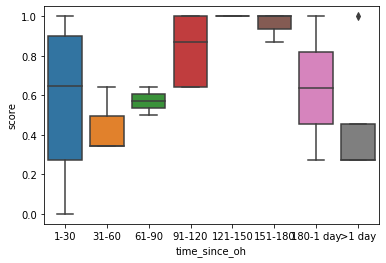

In [303]:
sns.boxplot(data=clean_ohfail_sp22, x="time_since_oh", y="score", order=['1-30', '31-60', '61-90', '91-120', '121-150', '151-180', '180-1 day', '>1 day'])

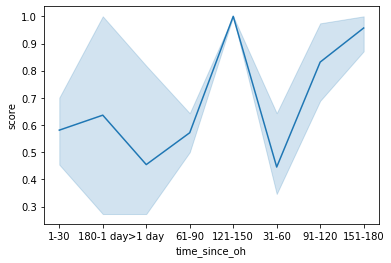

In [306]:
sns.lineplot(data=clean_ohfail_sp22, x="time_since_oh", y="score", sort= False)

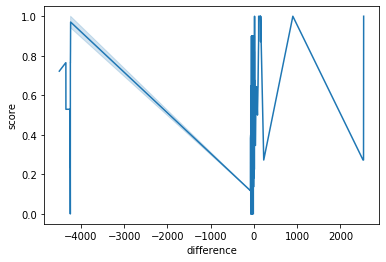

In [279]:
sns.lineplot(data=ohfail_sp22, x="difference", y="score")

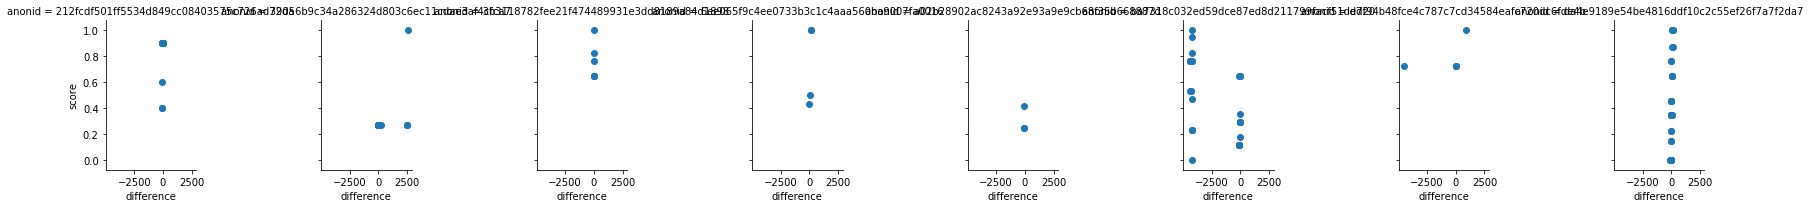

In [280]:
graph = sns.FacetGrid(ohfail_sp22, col ="anonid")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "difference", "score")
# show the object
plt.show()

In [281]:
adapted1_ohfail_sp22=ohfail_sp22[(ohfail_sp22['time_since_oh'] != '180-1 day') & (ohfail_sp22['time_since_oh'] != '>1 day')]
adapted2_ohfail_sp22=ohfail_sp22[(ohfail_sp22['time_since_oh'] != '180-1 day')]
adapted3_ohfail_sp22=ohfail_sp22[(ohfail_sp22['time_since_oh'] != '180-1 day') & (ohfail_sp22['time_since_oh'] != '>1 day') & (ohfail_sp22['time_since_oh'] != '151-180') & (ohfail_sp22['time_since_oh'] != '121-150') & (ohfail_sp22['time_since_oh'] != '91-120')]
adapted4_ohfail_sp22=ohfail_sp22[(ohfail_sp22['time_since_oh'] != '180-1 day') & (ohfail_sp22['time_since_oh'] != '>1 day') & (ohfail_sp22['time_since_oh'] != '151-180') & (ohfail_sp22['time_since_oh'] != '121-150') & (ohfail_sp22['time_since_oh'] != '91-120') & (ohfail_sp22['time_since_oh'] != '61-90')]
adapted5_ohfail_sp22=ohfail_sp22[(ohfail_sp22['time_since_oh'] != '180-1 day') & (ohfail_sp22['time_since_oh'] != '>1 day') & (ohfail_sp22['time_since_oh'] != '151-180') & (ohfail_sp22['time_since_oh'] != '121-150') & (ohfail_sp22['time_since_oh'] != '91-120') & (ohfail_sp22['time_since_oh'] != '61-90') & (ohfail_sp22['time_since_oh'] != '31-60')]
adapted6_ohfail_sp22=ohfail_sp22[(ohfail_sp22['time_since_oh'] != '180-1 day') & (ohfail_sp22['time_since_oh'] != '>1 day') & (ohfail_sp22['time_since_oh'] != '151-180') & (ohfail_sp22['time_since_oh'] != '121-150') & (ohfail_sp22['time_since_oh'] != '91-120') & (ohfail_sp22['time_since_oh'] != '61-90') & (ohfail_sp22['time_since_oh'] != '31-60') & (ohfail_sp22['time_since_oh'] != '1-30')]



In [282]:
adapted1_ohfail_sp22.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 180 mins after OH

,anonid,apt_name,maximum_score
0,212fcdf501ff5534d849cc08403575c726ad72da,moving,0.90000
1,39056b9c34a286324d803c6ec11cdae3af4cfca7,family,0.27273
2,3b3118782fee21f474489931e3dd8189a84d1898,pancakes,1.00000
3,6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016,sandwichbar,1.00000
4,a02b28902ac8243a92e93a9e9cb68f35b668887d,lastnamefirst,0.41667
5,ba7318c032ed59dce87ed8d211799facf51ded20,pancakes,1.00000
6,d7f94b48fce4c787c7cd34584eafc720dc6fde4b,medaltable,0.72222
7,da4e9189e54be4816ddf10c2c55ef26f7a7f2da7,txtmsg,1.00000


In [283]:
adapted2_ohfail_sp22.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 1 day after OH

,anonid,apt_name,maximum_score
0,212fcdf501ff5534d849cc08403575c726ad72da,moving,0.90000
1,39056b9c34a286324d803c6ec11cdae3af4cfca7,family,1.00000
2,3b3118782fee21f474489931e3dd8189a84d1898,pancakes,1.00000
3,6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016,sandwichbar,1.00000
4,a02b28902ac8243a92e93a9e9cb68f35b668887d,lastnamefirst,0.41667
5,ba7318c032ed59dce87ed8d211799facf51ded20,pancakes,1.00000
6,d7f94b48fce4c787c7cd34584eafc720dc6fde4b,medaltable,0.72222
7,da4e9189e54be4816ddf10c2c55ef26f7a7f2da7,txtmsg,1.00000


In [284]:
adapted3_ohfail_sp22.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 90 minutes from OH

,anonid,apt_name,maximum_score
0,212fcdf501ff5534d849cc08403575c726ad72da,moving,0.90000
1,39056b9c34a286324d803c6ec11cdae3af4cfca7,family,0.27273
2,3b3118782fee21f474489931e3dd8189a84d1898,pancakes,1.00000
3,6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016,sandwichbar,0.50000
4,a02b28902ac8243a92e93a9e9cb68f35b668887d,lastnamefirst,0.41667
5,ba7318c032ed59dce87ed8d211799facf51ded20,pancakes,1.00000
6,d7f94b48fce4c787c7cd34584eafc720dc6fde4b,medaltable,0.72222
7,da4e9189e54be4816ddf10c2c55ef26f7a7f2da7,txtmsg,0.76238


In [285]:
adapted4_ohfail_sp22.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 60 minutes from OH

,anonid,apt_name,maximum_score
0,212fcdf501ff5534d849cc08403575c726ad72da,moving,0.90000
1,39056b9c34a286324d803c6ec11cdae3af4cfca7,family,0.27273
2,3b3118782fee21f474489931e3dd8189a84d1898,pancakes,1.00000
3,6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016,sandwichbar,0.43333
4,a02b28902ac8243a92e93a9e9cb68f35b668887d,lastnamefirst,0.41667
5,ba7318c032ed59dce87ed8d211799facf51ded20,pancakes,1.00000
6,d7f94b48fce4c787c7cd34584eafc720dc6fde4b,medaltable,0.72222
7,da4e9189e54be4816ddf10c2c55ef26f7a7f2da7,txtmsg,0.76238


In [286]:
adapted5_ohfail_sp22.groupby( [ "anonid", "apt_name"])['score'].max().to_frame(name = 'maximum_score').reset_index()
#max scores after 30 minutes from OH

,anonid,apt_name,maximum_score
0,212fcdf501ff5534d849cc08403575c726ad72da,moving,0.90000
1,39056b9c34a286324d803c6ec11cdae3af4cfca7,family,0.27273
2,3b3118782fee21f474489931e3dd8189a84d1898,pancakes,1.00000
3,6ee065f9c4ee0733b3c1c4aaa560ba9007fa0016,sandwichbar,0.43333
4,a02b28902ac8243a92e93a9e9cb68f35b668887d,lastnamefirst,0.41667
5,ba7318c032ed59dce87ed8d211799facf51ded20,pancakes,1.00000
6,d7f94b48fce4c787c7cd34584eafc720dc6fde4b,medaltable,0.72222
7,da4e9189e54be4816ddf10c2c55ef26f7a7f2da7,txtmsg,0.76238


# FALL 2021

## Fall 2021 APT Data

In [311]:
#APT Additional Info import
apt_info_fa21 = pd.read_excel("CS APT Problem.xlsx")
print(len(apt_info))


apt_info_fa21 = apt_info_fa21[apt_info_fa21.index < apt_info_fa21[apt_info_fa21["apt_set"] == "CS201"].index[0]] # omit all info on CS201
apt_info_fa21 = apt_info_fa21[apt_info_fa21["semester"]== "fa21"] # only get Fall 2020 semester

#cleaning time zones
apt_info_fa21["assign_date"] = [d.replace(tzinfo=timezone('US/Eastern')) for d in apt_info_fa21["assign_date"]]
apt_info_fa21["due_date"] = [d.replace(tzinfo=timezone('US/Eastern')) for d in apt_info_fa21["due_date"]]
apt_info_fa21["late_due"] = [d.replace(tzinfo=timezone('US/Eastern')) for d in apt_info_fa21["late_due"]]
apt_info_fa21["late_due"] = apt_info_fa21["late_due"].fillna(apt_info_fa21["due_date"])


print(len(apt_info_fa21))

#apt_info.head()

72
77


In [316]:
#student formative APT log import
formative_fa21 = pd.read_csv("cs101fa21-apt-anon.csv").rename(columns = {"apt":"apt_name"})
print(len(formative_fa21))
formative_fa21.head()

27329


,anonid,timestamp,apt_name,score,item
0,00708963e5401c2946cb915948d72d59cd4d5e3e,1629994744,NaN,wrongclass,NaN
1,00708963e5401c2946cb915948d72d59cd4d5e3e,1629994774,intro,1.00000,APT0
2,00708963e5401c2946cb915948d72d59cd4d5e3e,1629994926,intro,0.00000,APT0
3,00708963e5401c2946cb915948d72d59cd4d5e3e,1629994971,intro,0.00000,APT0
4,00708963e5401c2946cb915948d72d59cd4d5e3e,1629995090,intro,wrongclass,APT0


In [317]:
#student summative APT log import
summative_fa21 = pd.read_csv("cs101fa21-aptquiz-anon.csv").rename(columns = {"apt":"apt_name"})
print(len(summative_fa21))
summative_fa21.head()

3163


,anonid,timestamp,apt_name,score,item
0,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,1633696565,bodymassindex,0.00000,APTQuiz1
1,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,1633696583,bodymassindex,1.00000,APTQuiz1
2,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,1633696854,stringsearch,0.85000,APTQuiz1
3,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,1633696918,stringsearch,0.95000,APTQuiz1
4,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,1633696961,stringsearch,1.00000,APTQuiz1


In [318]:
#read in apt extra info data and clean
apt = {}
apt_quiz = {}

formative_fa21["timestamp"] = pd.to_datetime(formative_fa21.timestamp,unit='s').dt.tz_localize('utc')

formative_fa21 = formative_fa21[formative_fa21["apt_name"].notnull()].copy(deep = True).reset_index(drop = True)


summative_fa21["timestamp"] = pd.to_datetime(summative_fa21.timestamp,unit='s').dt.tz_localize('utc')

summative_fa21 = summative_fa21[summative_fa21["apt_name"].notnull()].copy(deep = True).reset_index(drop = True)
formative_fa21.head()

,anonid,timestamp,apt_name,score,item
0,00708963e5401c2946cb915948d72d59cd4d5e3e,2021-08-26 16:19:34+00:00,intro,1.00000,APT0
1,00708963e5401c2946cb915948d72d59cd4d5e3e,2021-08-26 16:22:06+00:00,intro,0.00000,APT0
2,00708963e5401c2946cb915948d72d59cd4d5e3e,2021-08-26 16:22:51+00:00,intro,0.00000,APT0
3,00708963e5401c2946cb915948d72d59cd4d5e3e,2021-08-26 16:24:50+00:00,intro,wrongclass,APT0
4,581f077313ad97c9c20cb21d6ecdb213f4799453,2021-08-26 20:13:56+00:00,intro,1.00000,APT0


In [319]:
# separate the submissions that were submitted during an apt set's assigned time range vs. extra practice 
extra = {} 
extra_quiz = {} 
for sem in ["fa21"]: 
    if sem not in extra: 
        extra[sem] = pd.DataFrame(columns = formative_fa21.columns)
    if sem not in extra_quiz:  
        extra_quiz[sem] = pd.DataFrame(columns = summative_fa21.columns)
    
    extra[sem] = formative_fa21[~formative_fa21["apt_name"].isin(set(apt_info_fa21[(apt_info_fa21["semester"]== sem) &
                                             (apt_info_fa21["type"].isin(["formative",
                                              "summative_practice"]))]["apt_name"]))].copy(deep = True).reset_index(drop = True)
    
    formative_fa21 = formative_fa21[formative_fa21["apt_name"].isin(set(apt_info_fa21[(apt_info_fa21["semester"]== sem) &
                                             (apt_info_fa21["type"].isin(["formative",
                                              "summative_practice"]))]["apt_name"]))].copy(deep = True).reset_index(drop = True)

    extra_quiz[sem] = summative_fa21[~summative_fa21["apt_name"].isin(set(apt_info_fa21[(apt_info_fa21["semester"]== sem) &
                                             (apt_info_fa21["type"] == "summative")]["apt_name"]))].copy(deep = True).reset_index(drop = True)
    summative_fa21 = summative_fa21[summative_fa21["apt_name"].isin(set(apt_info_fa21[(apt_info_fa21["semester"]== sem) &
                                             (apt_info_fa21["type"] == "summative")]["apt_name"]))].copy(deep = True).reset_index(drop = True)
    

In [320]:
#combine sumamtive and formative dataframes
f1=[summative_fa21, formative_fa21]
fa21=pd.concat(f1)
print(len(fa21))
fa21.head()

28969


,anonid,timestamp,apt_name,score,item
0,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,2021-10-08 12:36:05+00:00,bodymassindex,0.00000,APTQuiz1
1,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,2021-10-08 12:36:23+00:00,bodymassindex,1.00000,APTQuiz1
2,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,2021-10-08 12:40:54+00:00,stringsearch,0.85000,APTQuiz1
3,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,2021-10-08 12:41:58+00:00,stringsearch,0.95000,APTQuiz1
4,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,2021-10-08 12:42:41+00:00,stringsearch,1.00000,APTQuiz1


In [321]:
#df = pd.merge(apt_info, sp21, how = "left", on = "apt_name")
df_fa21 = fa21.merge(apt_info_fa21[(apt_info_fa21["semester"]== 'fa21') &
                                             (apt_info_fa21["type"].isin(["formative",
                                              "summative_practice", "summative"]))].copy(deep = True).reset_index(drop = True),
                                              how = "left", on = "apt_name")
print(len(df_fa21))
df_fa21.head()

28969


,anonid,timestamp,apt_name,score,item,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other
0,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,2021-10-08 12:36:05+00:00,bodymassindex,0.00000,APTQuiz1,1,fa21,"list concepts, math",summative,"intro, gravity, bogsquare, cone, grayscale, la...",2021-10-08 00:00:00-04:00,2021-10-11 23:59:59-04:00,2021-10-11 23:59:59-04:00,1.0,NaN,NaN
1,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,2021-10-08 12:36:23+00:00,bodymassindex,1.00000,APTQuiz1,1,fa21,"list concepts, math",summative,"intro, gravity, bogsquare, cone, grayscale, la...",2021-10-08 00:00:00-04:00,2021-10-11 23:59:59-04:00,2021-10-11 23:59:59-04:00,1.0,NaN,NaN
2,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,2021-10-08 12:40:54+00:00,stringsearch,0.85000,APTQuiz1,1,fa21,"string concepts, string methods, for loops",summative,"portmanteau, sentencesearch, acronym, emphasiz...",2021-10-08 00:00:00-04:00,2021-10-11 23:59:59-04:00,2021-10-11 23:59:59-04:00,1.0,NaN,NaN
3,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,2021-10-08 12:41:58+00:00,stringsearch,0.95000,APTQuiz1,1,fa21,"string concepts, string methods, for loops",summative,"portmanteau, sentencesearch, acronym, emphasiz...",2021-10-08 00:00:00-04:00,2021-10-11 23:59:59-04:00,2021-10-11 23:59:59-04:00,1.0,NaN,NaN
4,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,2021-10-08 12:42:41+00:00,stringsearch,1.00000,APTQuiz1,1,fa21,"string concepts, string methods, for loops",summative,"portmanteau, sentencesearch, acronym, emphasiz...",2021-10-08 00:00:00-04:00,2021-10-11 23:59:59-04:00,2021-10-11 23:59:59-04:00,1.0,NaN,NaN


In [322]:
grouped_fa21=df_fa21.groupby(['anonid', 'apt_name', 'apt_set'])['score'].max()
grouped_fa21.head()
display(grouped_fa21)

anonid                                    apt_name       apt_set
00708963e5401c2946cb915948d72d59cd4d5e3e  acronym        3          1.00000
                                          bagels         3          1.00000
                                          bagfitter      5          1.00000
                                          bodymassindex  1          1.00000
                                          bogsquare      1          1.00000
                                                                     ...   
ff25145151d765f789ebde4c4f9da658fd7556af  teamsplit      8          1.00000
                                          totalweight    2          1.00000
                                          trophyshelf    7          1.00000
                                          txtmsg         4          1.00000
                                          yahtzee        4          1.00000
Name: score, Length: 9074, dtype: object

In [323]:
#find max score per submission per student
new_df_fa21=df_fa21.groupby( [ "anonid", "apt_name", "apt_set"])['score'].max().to_frame(name = 'max_score').reset_index()
new_df_fa21.head()

,anonid,apt_name,apt_set,max_score
0,00708963e5401c2946cb915948d72d59cd4d5e3e,acronym,3,1.00000
1,00708963e5401c2946cb915948d72d59cd4d5e3e,bagels,3,1.00000
2,00708963e5401c2946cb915948d72d59cd4d5e3e,bagfitter,5,1.00000
3,00708963e5401c2946cb915948d72d59cd4d5e3e,bodymassindex,1,1.00000
4,00708963e5401c2946cb915948d72d59cd4d5e3e,bogsquare,1,1.00000


In [324]:
#clean column entry
new_df_fa21.replace('wrongclass', 0.0)
new_df_fa21.replace('nocompile', 0.0)
new_df_fa21['max_score'] = pd.to_numeric(new_df_fa21['max_score'], errors='coerce')

In [325]:
#check column types
new_df_fa21.dtypes

anonid        object
apt_name      object
apt_set        int64
max_score    float64
dtype: object

In [326]:
#add struggling column, where max apt score is less than 100%
new_df_fa21['struggling'] = new_df_fa21['max_score']<1.00000
print(len(new_df_fa21))
new_df_fa21.head()

9074


,anonid,apt_name,apt_set,max_score,struggling
0,00708963e5401c2946cb915948d72d59cd4d5e3e,acronym,3,1.0,False
1,00708963e5401c2946cb915948d72d59cd4d5e3e,bagels,3,1.0,False
2,00708963e5401c2946cb915948d72d59cd4d5e3e,bagfitter,5,1.0,False
3,00708963e5401c2946cb915948d72d59cd4d5e3e,bodymassindex,1,1.0,False
4,00708963e5401c2946cb915948d72d59cd4d5e3e,bogsquare,1,1.0,False


In [327]:
#sort for only struggling students
struggling_students_fa21 = new_df_fa21[new_df_fa21['struggling'] == True] 
print(len(struggling_students_fa21))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(struggling_students_fa21)

305
                                        anonid           apt_name  apt_set  \
25    00708963e5401c2946cb915948d72d59cd4d5e3e        sandwichbar        5   
105   012d3cd03b527fce6a4991ad1f069eb0175904d2        cookiecount        2   
139   012d3cd03b527fce6a4991ad1f069eb0175904d2          thesaurus        8   
154   01ea6ade0f20c9ab5ab3b79b62b3431ffd40e5a6        codebreaker        1   
171   01ea6ade0f20c9ab5ab3b79b62b3431ffd40e5a6             moving        8   
193   01ea6ade0f20c9ab5ab3b79b62b3431ffd40e5a6        trophyshelf        7   
194   01ea6ade0f20c9ab5ab3b79b62b3431ffd40e5a6      whichsubjects        1   
237   02f1682ab42bb6bfe43d31254459ec7ec667c104           notfirst        2   
244   02f1682ab42bb6bfe43d31254459ec7ec667c104         positiveid        8   
363   073e391b60ff3a4e152f7135a274cf3c974ee7e1          bagfitter        5   
373   073e391b60ff3a4e152f7135a274cf3c974ee7e1           eatdrink        8   
441   07dada5e1519bc3d925e1ec680ffb34967b18447          mors

In [328]:
#count number of struggling students
new_df_fa21.groupby(['struggling']).count()

,anonid,apt_name,apt_set,max_score
struggling,,,,
False,8769,8769,8769,7659
True,305,305,305,305


In [329]:
struggling_students_fa21.groupby(['apt_set']).count()

,anonid,apt_name,max_score,struggling
apt_set,,,,
1,47,47,47,47
2,41,41,41,41
3,35,35,35,35
4,30,30,30,30
5,27,27,27,27
6,26,26,26,26
7,40,40,40,40
8,59,59,59,59


In [330]:
#number of struggles per student
struggling_count_fa21=struggling_students_fa21.groupby(['anonid']).count()
struggling_count_fa21.sort_values(by='apt_name', ascending=False)
print(len(struggling_count_fa21))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(struggling_count_fa21)


119
                                          apt_name  apt_set  max_score  \
anonid                                                                   
00708963e5401c2946cb915948d72d59cd4d5e3e         1        1          1   
012d3cd03b527fce6a4991ad1f069eb0175904d2         2        2          2   
01ea6ade0f20c9ab5ab3b79b62b3431ffd40e5a6         4        4          4   
02f1682ab42bb6bfe43d31254459ec7ec667c104         2        2          2   
073e391b60ff3a4e152f7135a274cf3c974ee7e1         2        2          2   
07dada5e1519bc3d925e1ec680ffb34967b18447         2        2          2   
0bb7167eb36cab09bedded663fdd4b8744145d8a         1        1          1   
0df34fa0de54b9ba8d36404e99528438fbf9c4e8         2        2          2   
11128cdbaed65467cf65c44cc17bc3a4aa60dcf0         2        2          2   
14e9e77c2687d617c8a8febf9efa6b1dba00d073         4        4          4   
156ac7d3805aee15b04f9eb0c13e383f187733ec         2        2          2   
1868d1971493062002ab4c0af6523b6416

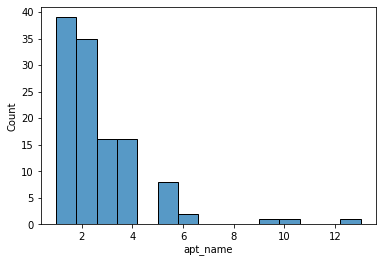

In [331]:
#view number of struggles per student
sns.histplot(data = struggling_count_fa21, x = "apt_name")

In [332]:
only_fail_fa21=df_fa21

only_fail_fa21=df_fa21
only_fail_fa21.replace('wrongclass', 0.0)
only_fail_fa21.replace('nocompile', 0.0)
only_fail_fa21['score'] = pd.to_numeric(only_fail_fa21['score'], errors='coerce')

only_fail_fa21 = only_fail_fa21[only_fail_fa21['score'] < 1.000]




#only_fail = only_fail[only_fail['score'] == True] 
only_fail_fa21.head()

,anonid,timestamp,apt_name,score,item,apt_set,semester,concept,type,mapping,assign_date,due_date,late_due,required,notes,other
0,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,2021-10-08 12:36:05+00:00,bodymassindex,0.00000,APTQuiz1,1,fa21,"list concepts, math",summative,"intro, gravity, bogsquare, cone, grayscale, la...",2021-10-08 00:00:00-04:00,2021-10-11 23:59:59-04:00,2021-10-11 23:59:59-04:00,1.0,NaN,NaN
2,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,2021-10-08 12:40:54+00:00,stringsearch,0.85000,APTQuiz1,1,fa21,"string concepts, string methods, for loops",summative,"portmanteau, sentencesearch, acronym, emphasiz...",2021-10-08 00:00:00-04:00,2021-10-11 23:59:59-04:00,2021-10-11 23:59:59-04:00,1.0,NaN,NaN
3,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,2021-10-08 12:41:58+00:00,stringsearch,0.95000,APTQuiz1,1,fa21,"string concepts, string methods, for loops",summative,"portmanteau, sentencesearch, acronym, emphasiz...",2021-10-08 00:00:00-04:00,2021-10-11 23:59:59-04:00,2021-10-11 23:59:59-04:00,1.0,NaN,NaN
7,7704fd43fd728098377aa54b6255961d8a6c81ad,2021-10-08 13:15:28+00:00,bodymassindex,0.00000,APTQuiz1,1,fa21,"list concepts, math",summative,"intro, gravity, bogsquare, cone, grayscale, la...",2021-10-08 00:00:00-04:00,2021-10-11 23:59:59-04:00,2021-10-11 23:59:59-04:00,1.0,NaN,NaN
11,f4df2c3e523b74dd1aaf9ec3b58210d71e027741,2021-10-08 13:21:38+00:00,parkingviolations,0.14286,APTQuiz1,1,fa21,math,summative,"intro, gravity, bogsquare, cone, grayscale, la...",2021-10-08 00:00:00-04:00,2021-10-11 23:59:59-04:00,2021-10-11 23:59:59-04:00,1.0,NaN,NaN


In [333]:
only_fail_fa21.dtypes

anonid                             object
timestamp             datetime64[ns, UTC]
apt_name                           object
score                             float64
item                               object
apt_set                            object
semester                           object
concept                            object
type                               object
mapping                            object
assign_date    datetime64[ns, US/Eastern]
due_date       datetime64[ns, US/Eastern]
late_due       datetime64[ns, US/Eastern]
required                          float64
notes                              object
other                              object
dtype: object

In [334]:
redefine_fa21=df_fa21.groupby( [ "anonid", "apt_name", "apt_set"]).count()
redefine_fa21 = redefine_fa21[redefine_fa21.columns[~redefine_fa21.columns.isin(['score', 'semester', 'concept', 'type', 'mapping', 'assign_date', 'due_date', 'late_due', 'required', 'notes', 'other'])]]
redefine_fa21 = redefine_fa21.rename(columns={'timestamp': 'num_submissions'})
redefine_fa21['struggling']=redefine_fa21['num_submissions']>=3
redefine_fa21.head()

num_submissions  \
anonid                                   apt_name      apt_set                    
00708963e5401c2946cb915948d72d59cd4d5e3e acronym       3                      1   
                                         bagels        3                      1   
                                         bagfitter     5                      2   
                                         bodymassindex 1                      1   
                                         bogsquare     1                      2   

                                                                item  \
anonid                                   apt_name      apt_set         
00708963e5401c2946cb915948d72d59cd4d5e3e acronym       3           1   
                                         bagels        3           1   
                                         bagfitter     5           2   
                                         bodymassindex 1           1   
                                         bogsquare     1           2   

                                                                struggling  
anonid                                   apt_name      apt_set              
00708963e5401c2946cb915948d72d59cd4d5e3e acronym       3             False  
                                         bagels        3             False  
                                         bagfitter     5             False  
                                         bodymassindex 1             False  
                                         bogsquare     1             False

2.0
138
3.1925281022702228


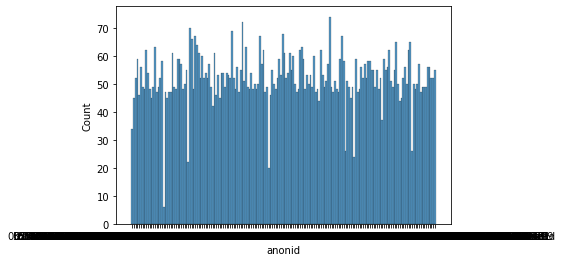

In [335]:
redefine_fa21=redefine_fa21.sort_values(by=['num_submissions'])
sns.histplot(data = redefine_fa21, x = "anonid")
median_submissions_fa21=redefine_fa21["num_submissions"].median()
max_submissions_fa21=redefine_fa21['num_submissions'].max()
mean_submissions_fa21=redefine_fa21['num_submissions'].mean()
print(median_submissions_fa21)
print(max_submissions_fa21)
print(mean_submissions_fa21)

# GRADESCOPE Fall 2020

### Parsing Gradescope data Fa20

In [287]:
#import data for fall 2020
fa20_hw1 = pd.read_csv("cs101fa20-hw1.csv")
fa20_hw2 = pd.read_csv("cs101fa20-hw2.csv")
fa20_hw3 = pd.read_csv("cs101fa20-hw3.csv")
fa20_hw4 = pd.read_csv("cs101fa20-hw4.csv")
fa20_hw5 = pd.read_csv("cs101fa20-hw5.csv")
fa20_hw6 = pd.read_csv("cs101fa20-hw6.csv")


In [288]:
#clean columns for fall 2020
fa20_hw1 = fa20_hw1[[':anonid', 'autograder_score', 'autograder_max', ":created_at"]].rename(columns = {':anonid':'anonid', ':created_at':'timestamp'})
fa20_hw2 = fa20_hw2[[':anonid', 'autograder_score', 'autograder_max', ":created_at"]].rename(columns = {':anonid':'anonid', ':created_at':'timestamp'})
fa20_hw3 = fa20_hw3[[':anonid', 'autograder_score', 'autograder_max', ":created_at"]].rename(columns = {':anonid':'anonid', ':created_at':'timestamp'})
fa20_hw4 = fa20_hw4[[':anonid', 'autograder_score', 'autograder_max', ":created_at"]].rename(columns = {':anonid':'anonid', ':created_at':'timestamp'})
fa20_hw5 = fa20_hw5[[':anonid', 'autograder_score', 'autograder_max', ":created_at"]].rename(columns = {':anonid':'anonid', ':created_at':'timestamp'})
fa20_hw6 = fa20_hw6[[':anonid', 'autograder_score', 'autograder_max', ":created_at"]].rename(columns = {':anonid':'anonid', ':created_at':'timestamp'})

fa20_hw5.head()

,anonid,autograder_score,autograder_max,timestamp
0,0a7d9ec15bc173d324248983059d4d863ed0e8c7,19.493,41.000,2020-10-16 04:12:12.617021+00:00
1,0a7d9ec15bc173d324248983059d4d863ed0e8c7,27.129,41.000,2020-10-16 04:22:34.847050+00:00
2,0a7d9ec15bc173d324248983059d4d863ed0e8c7,41.000,41.000,2020-10-16 08:03:16.916512+00:00
3,0a7d9ec15bc173d324248983059d4d863ed0e8c7,41.000,41.000,2020-10-16 08:09:19.432415+00:00
4,4113ca34fe6662a574696c6763b0d7de5dcb6a0b,0.000,41.001,2020-10-16 11:21:04.115832+00:00


In [289]:
#find median number of submissions per student for each homework
fa20_hw1_num_submissions=fa20_hw1.groupby( [ "anonid"]).count()
fa20_hw1_med_submissions=fa20_hw1_num_submissions["autograder_score"].median()

fa20_hw2_num_submissions=fa20_hw2.groupby( [ "anonid"]).count()
fa20_hw2_med_submissions=fa20_hw2_num_submissions["autograder_score"].median()

fa20_hw3_num_submissions=fa20_hw3.groupby( [ "anonid"]).count()
fa20_hw3_med_submissions=fa20_hw3_num_submissions["autograder_score"].median()

fa20_hw4_num_submissions=fa20_hw4.groupby( [ "anonid"]).count()
fa20_hw4_med_submissions=fa20_hw4_num_submissions["autograder_score"].median()

fa20_hw5_num_submissions=fa20_hw5.groupby( [ "anonid"]).count()
fa20_hw5_med_submissions=fa20_hw5_num_submissions["autograder_score"].median()

fa20_hw6_num_submissions=fa20_hw6.groupby( [ "anonid"]).count()
fa20_hw6_med_submissions=fa20_hw6_num_submissions["autograder_score"].median()


print(fa20_hw1_num_submissions.head())

print('Fa20 HW1 Median Submissions:')
print(fa20_hw1_med_submissions)

print('Fa20 HW2 Median Submissions:')
print(fa20_hw2_med_submissions)

print('Fa20 HW3 Median Submissions:')
print(fa20_hw3_med_submissions)

print('Fa20 HW4 Median Submissions:')
print(fa20_hw4_med_submissions)

print('Fa20 HW5 Median Submissions:')
print(fa20_hw5_med_submissions)

print('Fa20 HW6 Median Submissions:')
print(fa20_hw6_med_submissions)

                                          autograder_score  autograder_max  \
anonid                                                                       
02c4aeea9d4df4bf789a005e0f189e909f390a07                 3               3   
0684bcb95dbfda587909c05fc1cea8e2cad4b429                 7               7   
070fe7c25c4f7292e0bc8da465e39b29d9505376                 2               2   
079beb2be2ab0c7423891728ea9ed2b8994ee335                 8               8   
07ea200f551279156d1925d5b34bdbd3b4e7a060                 3               3   

                                          timestamp  
anonid                                               
02c4aeea9d4df4bf789a005e0f189e909f390a07          3  
0684bcb95dbfda587909c05fc1cea8e2cad4b429          7  
070fe7c25c4f7292e0bc8da465e39b29d9505376          2  
079beb2be2ab0c7423891728ea9ed2b8994ee335          8  
07ea200f551279156d1925d5b34bdbd3b4e7a060          3  
Fa20 HW1 Median Submissions:
4.0
Fa20 HW2 Median Submissions:
3.0
Fa20 HW3 

In [290]:
#getting only struggling students for each homework using respective medians
#top number in output is total students that submitted and bottom number is only the strugglers

print('hw1 Fa20')
fa20_hw1_num_submissions['struggling']=fa20_hw1_num_submissions['autograder_score']>=4
print(len(fa20_hw1_num_submissions)) #total students
fa20_hw1_strugglers=fa20_hw1_num_submissions[fa20_hw1_num_submissions['struggling'] == True] 
print(len(fa20_hw1_strugglers)) #struggling students

print('hw2 Fa20')
fa20_hw2_num_submissions['struggling']=fa20_hw2_num_submissions['autograder_score']>=3
print(len(fa20_hw2_num_submissions)) #total students
fa20_hw2_strugglers=fa20_hw2_num_submissions[fa20_hw2_num_submissions['struggling'] == True] 
print(len(fa20_hw2_strugglers)) #struggling students

print('hw3 Fa20')
fa20_hw3_num_submissions['struggling']=fa20_hw3_num_submissions['autograder_score']>=4
print(len(fa20_hw3_num_submissions)) #total students
fa20_hw3_strugglers=fa20_hw3_num_submissions[fa20_hw3_num_submissions['struggling'] == True] 
print(len(fa20_hw3_strugglers)) #struggling students

print('hw4 Fa20')
fa20_hw4_num_submissions['struggling']=fa20_hw4_num_submissions['autograder_score']>=4
print(len(fa20_hw4_num_submissions)) #total students
fa20_hw4_strugglers=fa20_hw4_num_submissions[fa20_hw4_num_submissions['struggling'] == True] 
print(len(fa20_hw4_strugglers)) #struggling students

print('hw5 Fa20')
fa20_hw5_num_submissions['struggling']=fa20_hw5_num_submissions['autograder_score']>=5
print(len(fa20_hw5_num_submissions)) #total students
fa20_hw5_strugglers=fa20_hw5_num_submissions[fa20_hw5_num_submissions['struggling'] == True] 
print(len(fa20_hw5_strugglers)) #struggling students

print('hw6 Fa20')
fa20_hw6_num_submissions['struggling']=fa20_hw6_num_submissions['autograder_score']>=10
print(len(fa20_hw6_num_submissions)) #total students
fa20_hw6_strugglers=fa20_hw6_num_submissions[fa20_hw6_num_submissions['struggling'] == True] 
print(len(fa20_hw6_strugglers)) #struggling students

hw1 Fa20
149
77
hw2 Fa20
148
76
hw3 Fa20
148
90
hw4 Fa20
147
76
hw5 Fa20
145
86
hw6 Fa20
144
80


In [291]:
#get complete dataset with ony struggling students for each hw
print('fa20 hw1')
print(len(fa20_hw1))
fa20_hw1_strugglers=fa20_hw1_strugglers.reset_index()
fa20_hw1_strugglers.head()
fa20_hw1_struggling_students=fa20_hw1[fa20_hw1["anonid"].isin(fa20_hw1_strugglers["anonid"])]
print(len(fa20_hw1_struggling_students))

print('fa20 hw2')
print(len(fa20_hw2))
fa20_hw2_strugglers=fa20_hw2_strugglers.reset_index()
fa20_hw2_strugglers.head()
fa20_hw2_struggling_students=fa20_hw2[fa20_hw2["anonid"].isin(fa20_hw2_strugglers["anonid"])]
print(len(fa20_hw2_struggling_students))

print('fa20 hw3')
print(len(fa20_hw3))
fa20_hw3_strugglers=fa20_hw3_strugglers.reset_index()
fa20_hw3_strugglers.head()
fa20_hw3_struggling_students=fa20_hw3[fa20_hw3["anonid"].isin(fa20_hw3_strugglers["anonid"])]
print(len(fa20_hw3_struggling_students))

print('fa20 hw4')
print(len(fa20_hw4))
fa20_hw4_strugglers=fa20_hw4_strugglers.reset_index()
fa20_hw4_strugglers.head()
fa20_hw4_struggling_students=fa20_hw4[fa20_hw4["anonid"].isin(fa20_hw4_strugglers["anonid"])]
print(len(fa20_hw4_struggling_students))

print('fa20 hw5')
print(len(fa20_hw5))
fa20_hw5_strugglers=fa20_hw5_strugglers.reset_index()
fa20_hw5_strugglers.head()
fa20_hw5_struggling_students=fa20_hw5[fa20_hw5["anonid"].isin(fa20_hw5_strugglers["anonid"])]
print(len(fa20_hw5_struggling_students))

print('fa20 hw6')
print(len(fa20_hw6))
fa20_hw6_strugglers=fa20_hw6_strugglers.reset_index()
fa20_hw6_strugglers.head()
fa20_hw6_struggling_students=fa20_hw6[fa20_hw6["anonid"].isin(fa20_hw6_strugglers["anonid"])]
print(len(fa20_hw6_struggling_students))

fa20 hw1
697
529
fa20 hw2
634
531
fa20 hw3
950
818
fa20 hw4
769
635
fa20 hw5
1146
975
fa20 hw6
1615
1292


In [292]:
#check to make sure correct number of students are included in struggling dataset (should match # of struggling students)
print(len(fa20_hw1_struggling_students.groupby("anonid")))
print(len(fa20_hw2_struggling_students.groupby("anonid")))
print(len(fa20_hw3_struggling_students.groupby("anonid")))
print(len(fa20_hw4_struggling_students.groupby("anonid")))
print(len(fa20_hw5_struggling_students.groupby("anonid")))
print(len(fa20_hw6_struggling_students.groupby("anonid")))

77
76
90
76
86
80


### Office Hours data for Fa20 (in terms of gradescope)

In [293]:
#create dataset of OH visits for each particular 
#find number of visits per homework

oh_hw1_fa20 = office_hours_fa20[office_hours_fa20['Assignment 1: Totem'] == "True"] 
oh_hw2_fa20 = office_hours_fa20[office_hours_fa20['Assignment 2: Turtles'] == "True"] 
oh_hw3_fa20 = office_hours_fa20[office_hours_fa20['Assignment 3: Transform'] == "True"] 
oh_hw4_fa20 = office_hours_fa20[office_hours_fa20['Assignment 4: Hangman'] == "True"] 
oh_hw5_fa20 = office_hours_fa20[office_hours_fa20['Assignment 5: Clever Hangman'] == "True"] 
oh_hw6_fa20 = office_hours_fa20[office_hours_fa20['Assignment 6: Recommender'] == "True"] 


print(len(oh_hw1_fa20))
print(len(oh_hw2_fa20))
print(len(oh_hw3_fa20))
print(len(oh_hw4_fa20))
print(len(oh_hw5_fa20))
print(len(oh_hw6_fa20))

39
73
72
57
89
27


In [294]:
oh_hw1_fa20.dtypes

ticketId                                                                             object
isFollowup                                                                           object
parentId                                                                             object
requestedAt                                                                          object
startedAt                                                                            object
completedAt                                                                          object
studentLeftFeedback                                                                  object
Assignment 6: Recommender                                                            object
APT8                                                                                 object
APT 6                                                                                object
APT7                                                                            

In [295]:
#convert time values to UTC timestamps
oh_hw1_fa20['startedAt'] = pd.to_datetime(oh_hw1_fa20.startedAt).dt.tz_convert('utc')
oh_hw1_fa20['requestedAt'] = pd.to_datetime(oh_hw1_fa20.startedAt).dt.tz_convert('utc')
oh_hw1_fa20['completedAt'] = pd.to_datetime(oh_hw1_fa20.startedAt).dt.tz_convert('utc')

/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [296]:
#convert time values to UTC timestamps

oh_hw2_fa20['startedAt'] = pd.to_datetime(oh_hw2_fa20.startedAt).dt.tz_convert('utc')
oh_hw2_fa20['requestedAt'] = pd.to_datetime(oh_hw2_fa20.startedAt).dt.tz_convert('utc')
oh_hw2_fa20['completedAt'] = pd.to_datetime(oh_hw2_fa20.startedAt).dt.tz_convert('utc')

oh_hw3_fa20['startedAt'] = pd.to_datetime(oh_hw3_fa20.startedAt).dt.tz_convert('utc')
oh_hw3_fa20['requestedAt'] = pd.to_datetime(oh_hw3_fa20.startedAt).dt.tz_convert('utc')
oh_hw3_fa20['completedAt'] = pd.to_datetime(oh_hw3_fa20.startedAt).dt.tz_convert('utc')

oh_hw4_fa20['startedAt'] = pd.to_datetime(oh_hw4_fa20.startedAt).dt.tz_convert('utc')
oh_hw4_fa20['requestedAt'] = pd.to_datetime(oh_hw4_fa20.startedAt).dt.tz_convert('utc')
oh_hw4_fa20['completedAt'] = pd.to_datetime(oh_hw4_fa20.startedAt).dt.tz_convert('utc')

oh_hw5_fa20['startedAt'] = pd.to_datetime(oh_hw5_fa20.startedAt).dt.tz_convert('utc')
oh_hw5_fa20['requestedAt'] = pd.to_datetime(oh_hw5_fa20.startedAt).dt.tz_convert('utc')
oh_hw5_fa20['completedAt'] = pd.to_datetime(oh_hw5_fa20.startedAt).dt.tz_convert('utc')

oh_hw6_fa20['startedAt'] = pd.to_datetime(oh_hw6_fa20.startedAt).dt.tz_convert('utc')
oh_hw6_fa20['requestedAt'] = pd.to_datetime(oh_hw6_fa20.startedAt).dt.tz_convert('utc')
oh_hw6_fa20['completedAt'] = pd.to_datetime(oh_hw6_fa20.startedAt).dt.tz_convert('utc')

/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/rheatejwani/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to 

In [297]:
#include only students struggling on that particular homework in the OH dataset
fa20_hw1_oh_only_struggling=oh_hw1_fa20[oh_hw1_fa20["anonStudent"].isin(fa20_hw1_struggling_students["anonid"])]
print(len(fa20_hw1_oh_only_struggling))

fa20_hw2_oh_only_struggling=oh_hw2_fa20[oh_hw2_fa20["anonStudent"].isin(fa20_hw2_struggling_students["anonid"])]
print(len(fa20_hw2_oh_only_struggling))

fa20_hw3_oh_only_struggling=oh_hw3_fa20[oh_hw3_fa20["anonStudent"].isin(fa20_hw3_struggling_students["anonid"])]
print(len(fa20_hw3_oh_only_struggling))

fa20_hw4_oh_only_struggling=oh_hw4_fa20[oh_hw4_fa20["anonStudent"].isin(fa20_hw4_struggling_students["anonid"])]
print(len(fa20_hw4_oh_only_struggling))

fa20_hw5_oh_only_struggling=oh_hw5_fa20[oh_hw5_fa20["anonStudent"].isin(fa20_hw5_struggling_students["anonid"])]
print(len(fa20_hw5_oh_only_struggling))

fa20_hw6_oh_only_struggling=oh_hw6_fa20[oh_hw6_fa20["anonStudent"].isin(fa20_hw6_struggling_students["anonid"])]
print(len(fa20_hw6_oh_only_struggling))

25
49
66
43
81
18


In [298]:
fa20_hw1_oh_only_struggling=fa20_hw1_oh_only_struggling.rename(columns={"anonStudent": "anonid"})
fa20_hw2_oh_only_struggling=fa20_hw2_oh_only_struggling.rename(columns={"anonStudent": "anonid"})
fa20_hw3_oh_only_struggling=fa20_hw3_oh_only_struggling.rename(columns={"anonStudent": "anonid"})
fa20_hw4_oh_only_struggling=fa20_hw4_oh_only_struggling.rename(columns={"anonStudent": "anonid"})
fa20_hw5_oh_only_struggling=fa20_hw5_oh_only_struggling.rename(columns={"anonStudent": "anonid"})
fa20_hw6_oh_only_struggling=fa20_hw6_oh_only_struggling.rename(columns={"anonStudent": "anonid"})

In [299]:
fa20_hw1_gscope_oh=pd.merge(fa20_hw1_oh_only_struggling, fa20_hw1_struggling_students, on=['anonid'])
fa20_hw2_gscope_oh=pd.merge(fa20_hw2_oh_only_struggling, fa20_hw2_struggling_students, on=['anonid'])
fa20_hw3_gscope_oh=pd.merge(fa20_hw3_oh_only_struggling, fa20_hw3_struggling_students, on=['anonid'])
fa20_hw4_gscope_oh=pd.merge(fa20_hw4_oh_only_struggling, fa20_hw4_struggling_students, on=['anonid'])
fa20_hw5_gscope_oh=pd.merge(fa20_hw5_oh_only_struggling, fa20_hw5_struggling_students, on=['anonid'])
fa20_hw6_gscope_oh=pd.merge(fa20_hw6_oh_only_struggling, fa20_hw6_struggling_students, on=['anonid'])


In [300]:
fa20_hw1_gscope_oh['timestamp'] = pd.to_datetime(fa20_hw1_gscope_oh.timestamp).dt.tz_convert('utc')
fa20_hw2_gscope_oh['timestamp'] = pd.to_datetime(fa20_hw2_gscope_oh.timestamp).dt.tz_convert('utc')
fa20_hw3_gscope_oh['timestamp'] = pd.to_datetime(fa20_hw3_gscope_oh.timestamp).dt.tz_convert('utc')
fa20_hw4_gscope_oh['timestamp'] = pd.to_datetime(fa20_hw4_gscope_oh.timestamp).dt.tz_convert('utc')
fa20_hw5_gscope_oh['timestamp'] = pd.to_datetime(fa20_hw5_gscope_oh.timestamp).dt.tz_convert('utc')
fa20_hw6_gscope_oh['timestamp'] = pd.to_datetime(fa20_hw6_gscope_oh.timestamp).dt.tz_convert('utc')

In [301]:
duringoh_gradescope_fa20_hw1=fa20_hw1_gscope_oh[(fa20_hw1_gscope_oh['timestamp'] >= fa20_hw1_gscope_oh['startedAt'])& (fa20_hw1_gscope_oh['timestamp'] <= fa20_hw1_gscope_oh['completedAt'])]
print(len(duringoh_gradescope_fa20_hw1))

duringoh_gradescope_fa20_hw2=fa20_hw2_gscope_oh[(fa20_hw2_gscope_oh['timestamp'] >= fa20_hw2_gscope_oh['startedAt'])& (fa20_hw2_gscope_oh['timestamp'] <= fa20_hw2_gscope_oh['completedAt'])]
print(len(duringoh_gradescope_fa20_hw2))

duringoh_gradescope_fa20_hw3=fa20_hw3_gscope_oh[(fa20_hw3_gscope_oh['timestamp'] >= fa20_hw3_gscope_oh['startedAt'])& (fa20_hw3_gscope_oh['timestamp'] <= fa20_hw3_gscope_oh['completedAt'])]
print(len(duringoh_gradescope_fa20_hw3))

duringoh_gradescope_fa20_hw4=fa20_hw4_gscope_oh[(fa20_hw4_gscope_oh['timestamp'] >= fa20_hw4_gscope_oh['startedAt'])& (fa20_hw4_gscope_oh['timestamp'] <= fa20_hw4_gscope_oh['completedAt'])]
print(len(duringoh_gradescope_fa20_hw4))

duringoh_gradescope_fa20_hw5=fa20_hw5_gscope_oh[(fa20_hw5_gscope_oh['timestamp'] >= fa20_hw5_gscope_oh['startedAt'])& (fa20_hw5_gscope_oh['timestamp'] <= fa20_hw5_gscope_oh['completedAt'])]
print(len(duringoh_gradescope_fa20_hw5))

duringoh_gradescope_fa20_hw6=fa20_hw6_gscope_oh[(fa20_hw6_gscope_oh['timestamp'] >= fa20_hw6_gscope_oh['startedAt'])& (fa20_hw6_gscope_oh['timestamp'] <= fa20_hw6_gscope_oh['completedAt'])]
print(len(duringoh_gradescope_fa20_hw6))


0
0
0
0
0
0
